In [15]:
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt
import numpy as np
from ast import literal_eval
from transformers import AutoTokenizer
import os
import shutil
from pathlib import Path
import re

plt.style.use('ggplot')

In [2]:
tokenize = AutoTokenizer.from_pretrained("distilbert-base-multilingual-cased")


In [3]:
tokenize('Er ging nach Hauseingang',add_special_tokens=False, return_length=True)['length'][0]

6

In [4]:
lextreme_datasets = ['brazilian_court_decisions_judgment', 'brazilian_court_decisions_unanimity', 
                     'swiss_judgment_prediction', 'german_argument_mining', 'greek_legal_code_volume', 
                     'greek_legal_code_chapter', 'greek_legal_code_subject', 
                     'online_terms_of_service_unfairness_levels', 'online_terms_of_service_clause_topics', 
                     'covid19_emergency_event', 'multi_eurlex_level_1', 'lener_br', 'legalnero', 
                     'greek_legal_ner', 'mapa_coarse', 'mapa_fine']

In [27]:
def split_into_languages(dataset):
    dataset_new = list()
    
    dataset_df = pd.DataFrame(dataset)
    
    for item in dataset_df.to_dict(orient='records'):
        labels = item['label']
        for language, document in literal_eval(item['input']).items():
            if document is not None:
                item_new = dict()
                item_new['language']=language
                item_new['input']=str(document)
                item_new['label']=labels
                dataset_new.append(item_new)
    
    dataset_new = pd.DataFrame(dataset_new)
    
    
    return  dataset_new


def generate_historgram(dataset_name, dataframe,language=None):
    
    if language is None:
        all_data_as_df_filtered = dataframe
    else:
        all_data_as_df_filtered = dataframe[dataframe.language==language]


 
    all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
    
    all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))

    plt.figure(figsize=(20,10))
    ax = all_data_as_df_filtered.input_split_length.plot.hist(grid=True, bins=200)
    if dataset_name=='multi_eurlex_level_1':
        ax.set_xlim([0, 24700])
    elif dataset_name.startswith('greek_legal_code'):
        ax.set_xlim(0,16000)


    start, end = ax.get_xlim()

    ax.xaxis.set_ticks(np.arange(0, end, round(end/20,0)))
    
    if language is None:
        plt.xlabel('Length of input', fontsize=16)
    else:
        plt.xlabel('Length of input for language '+language, fontsize=16)
    plt.ylabel('Frequency of length value', fontsize=16)
    plt.title(dataset_name, fontsize=16)
    
    if language is None:
        plt.savefig('../figures/'+dataset_name+'/histogram_'+'_'.join(dataset_name.split())+'.jpg')
        
    else:
        plt.savefig('../figures/'+dataset_name+'/histogram_'+'_'.join(dataset_name.split())+'__'+language+'.jpg')
    


def create_histograms(dataset_name, language='all'):
    
    if Path('../figures/'+dataset_name).exists():
        shutil.rmtree('../figures/'+dataset_name)
        os.mkdir('../figures/'+dataset_name)
    else:
        os.mkdir('../figures/'+dataset_name)
        
    
    dataset = load_dataset("joelito/lextreme",dataset_name)

    all_data_as_df = list()

    for split in ['train','validation','test']:
        df = pd.DataFrame(dataset[split])
        all_data_as_df.append(df)
        

    all_data_as_df = pd.concat(all_data_as_df)
    
    if dataset_name.startswith('multi_eurlex'):
        all_data_as_df = split_into_languages(all_data_as_df)
            
    
    if language == 'all':
        
        if 'language' in all_data_as_df.columns.tolist():
            
            for lang in all_data_as_df.language.unique():
            
                generate_historgram(dataset_name,all_data_as_df,lang)
        
        if len(all_data_as_df.language.unique())>1:
            
            generate_historgram(dataset_name,all_data_as_df)
            
    else:
        generate_historgram(dataset_name,all_data_as_df,language)
        
        
        


Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/brazilian_court_decisions_judgment/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

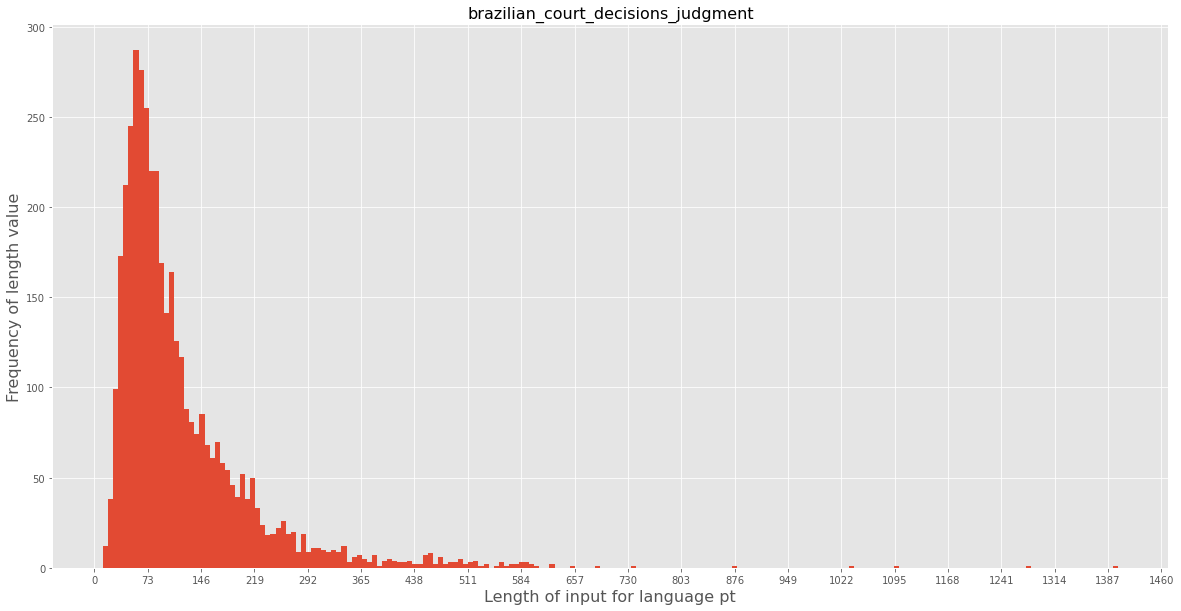

In [28]:
create_histograms('brazilian_court_decisions_judgment')

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/brazilian_court_decisions_judgment/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/brazilian_court_decisions_unanimity/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/swiss_judgment_prediction/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/greek_legal_code_volume/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/greek_legal_code_chapter/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/greek_legal_code_subject/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/online_terms_of_service_unfairness_levels/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/multi_eurlex_level_1/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/legalnero/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/greek_legal_ner/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/mapa_coarse/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/mapa_fine/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split']=all_data_as_df_filtered.input.apply(lambda x:str(x).split())
<ipython-input-27-be5d369bea9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_as_df_filtered['input_split_length']=all_data_as_df_filtered.input_split.apply(lambda x:len(x))
<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matpl

<ipython-input-27-be5d369bea9c>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


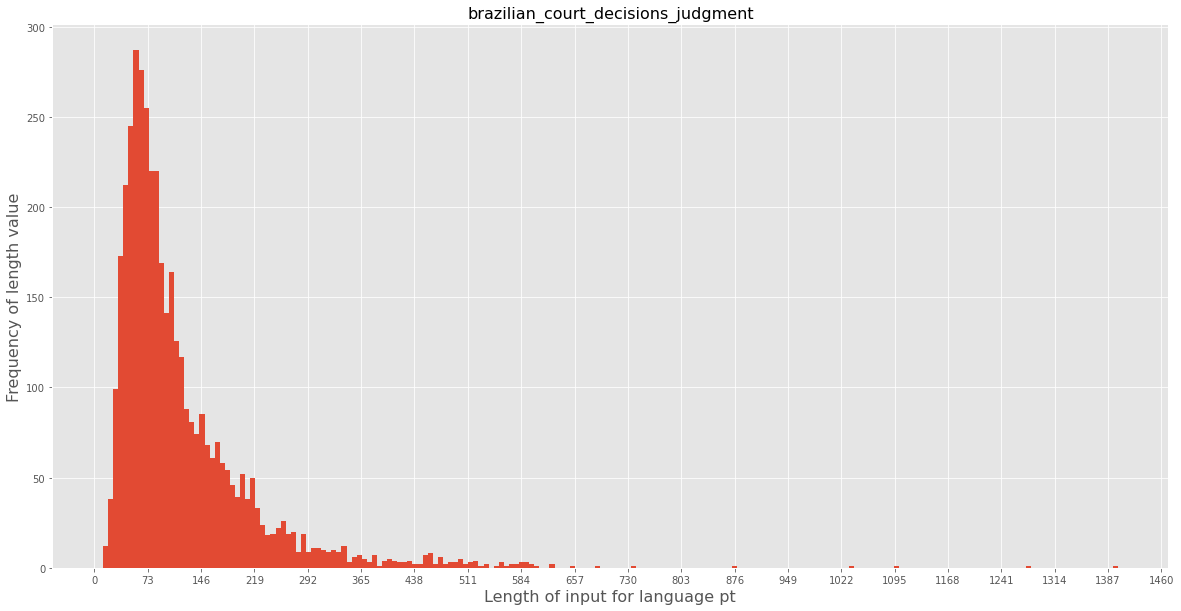

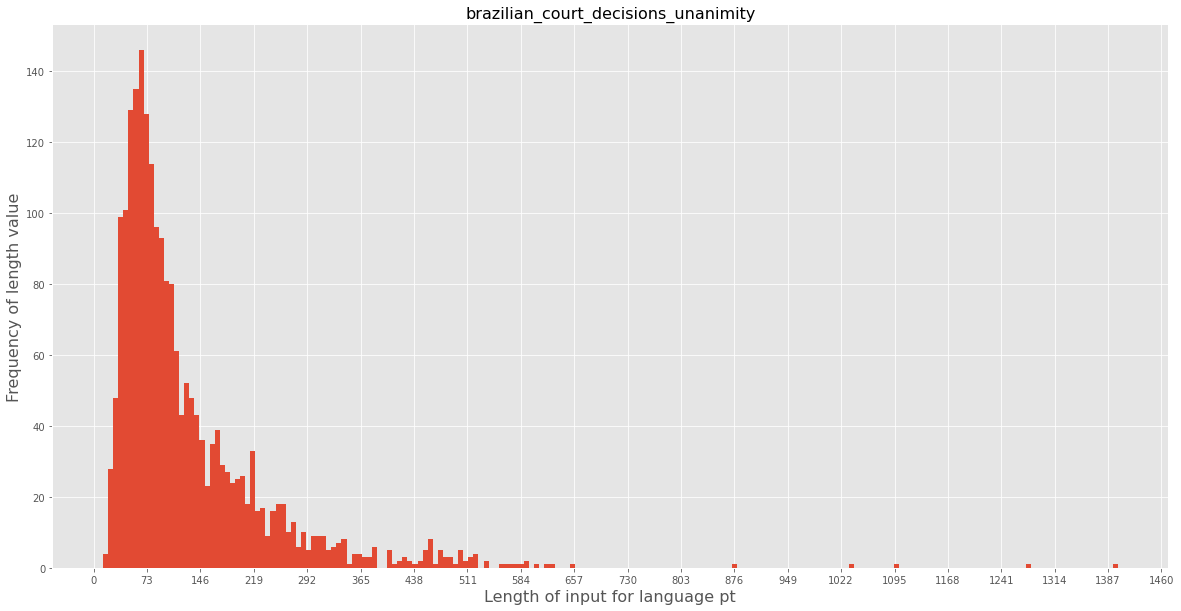

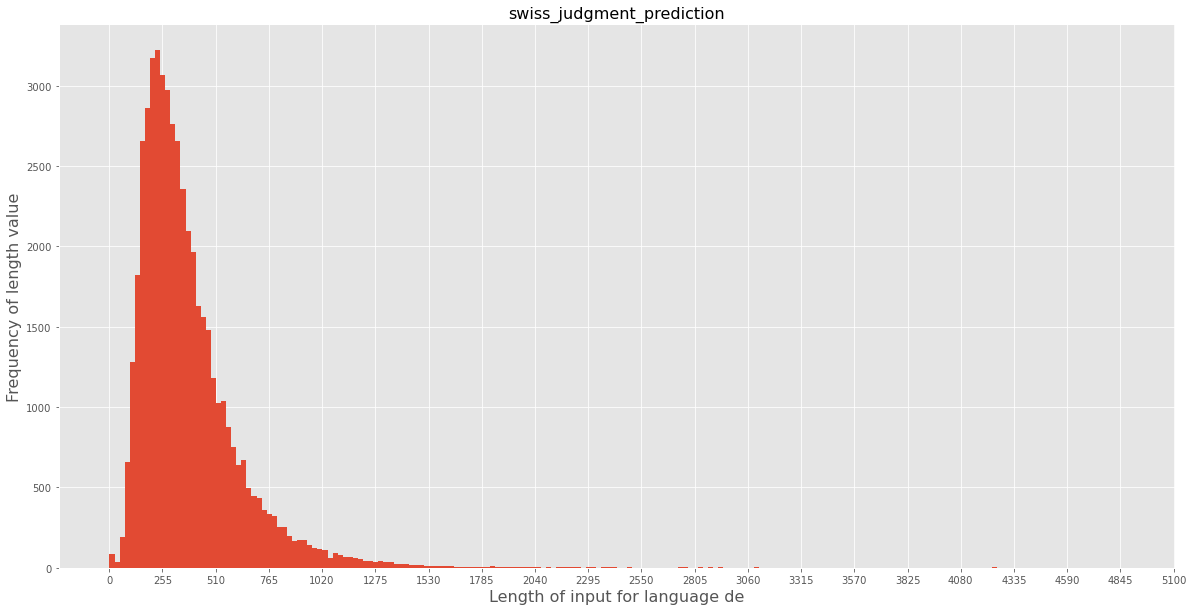

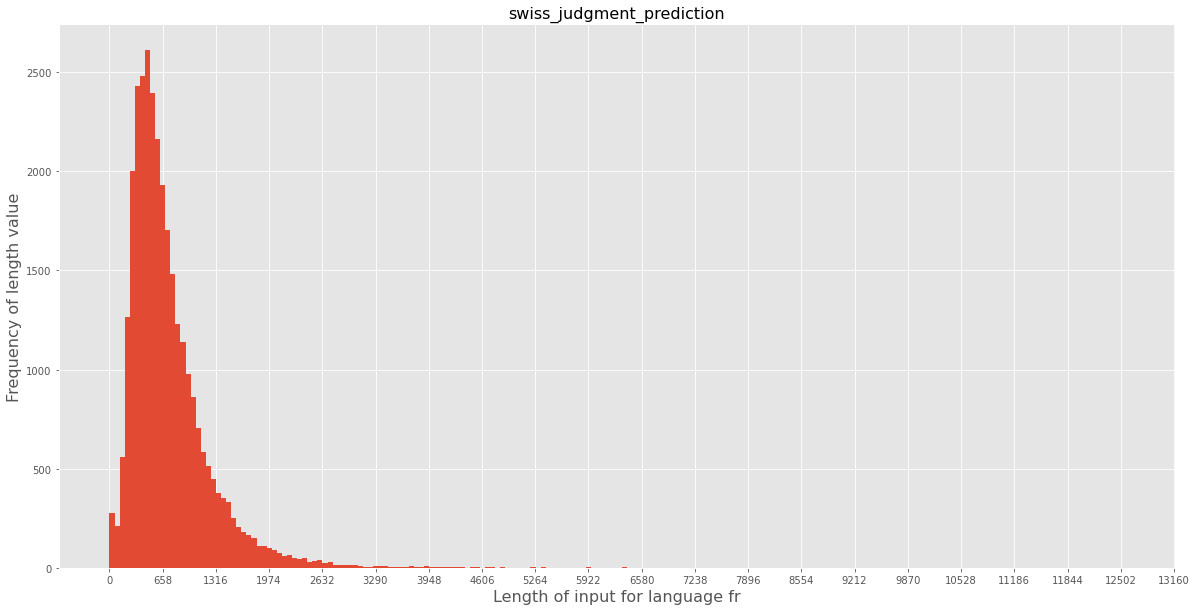

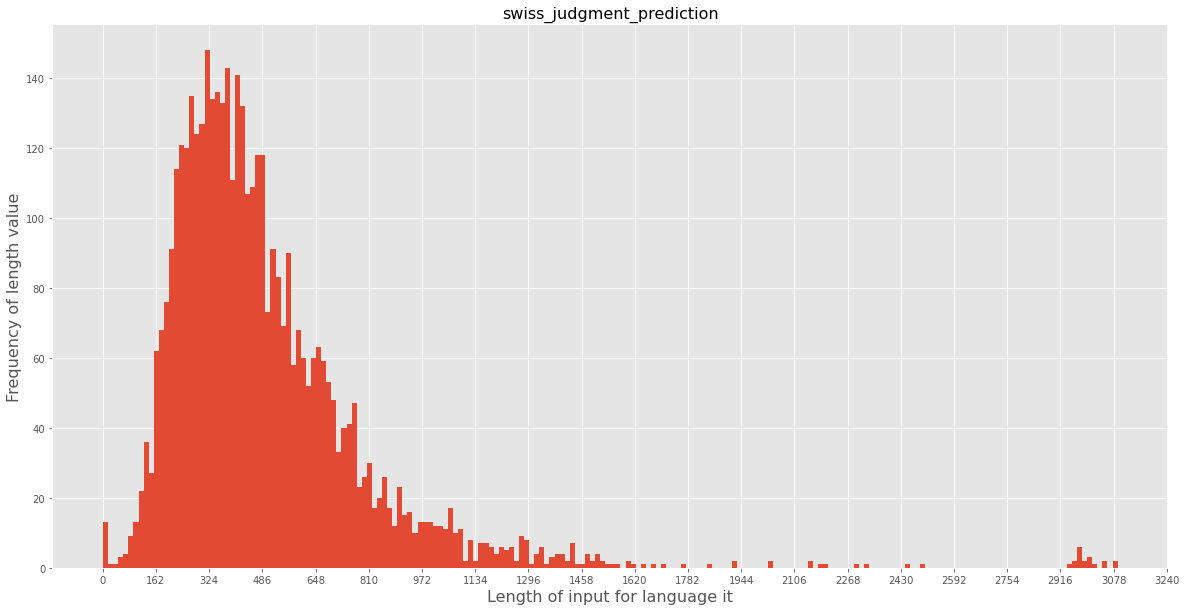

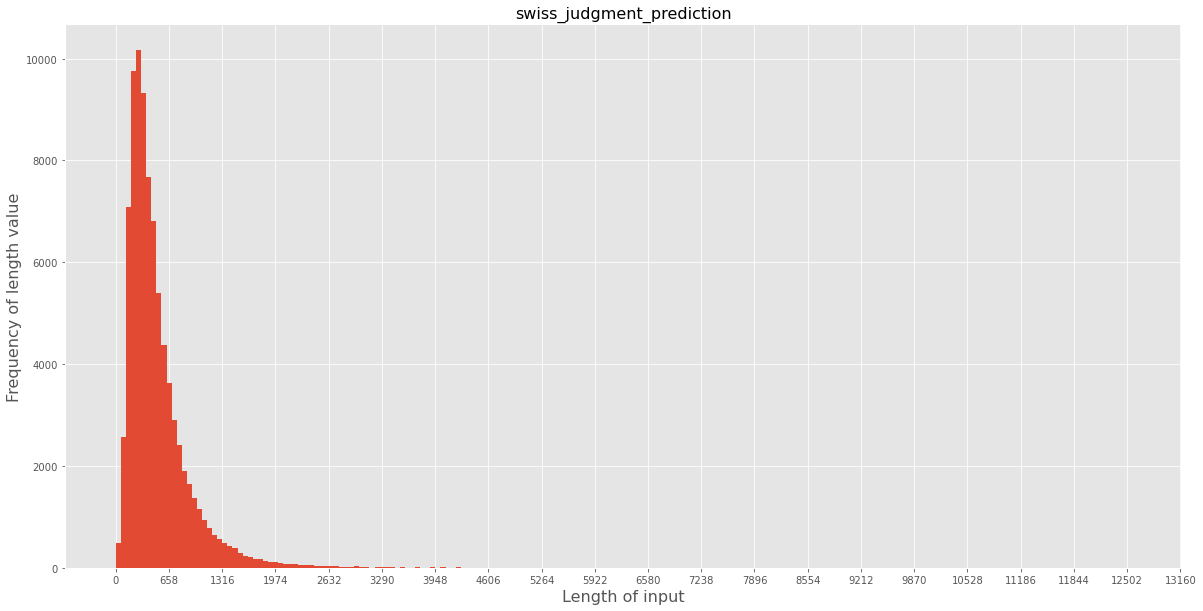

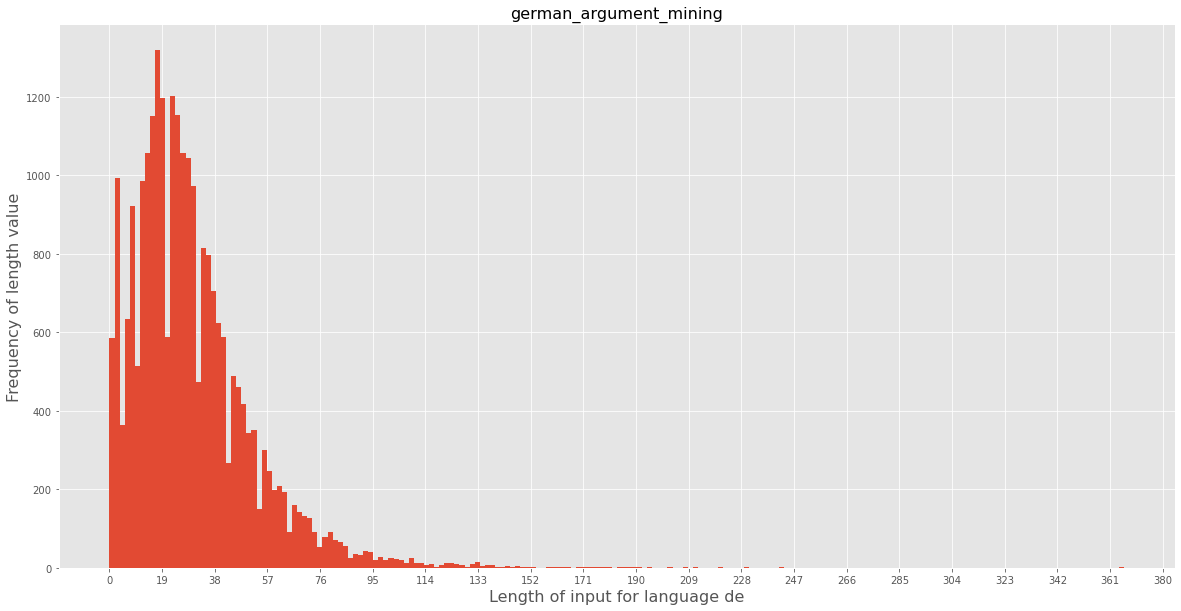

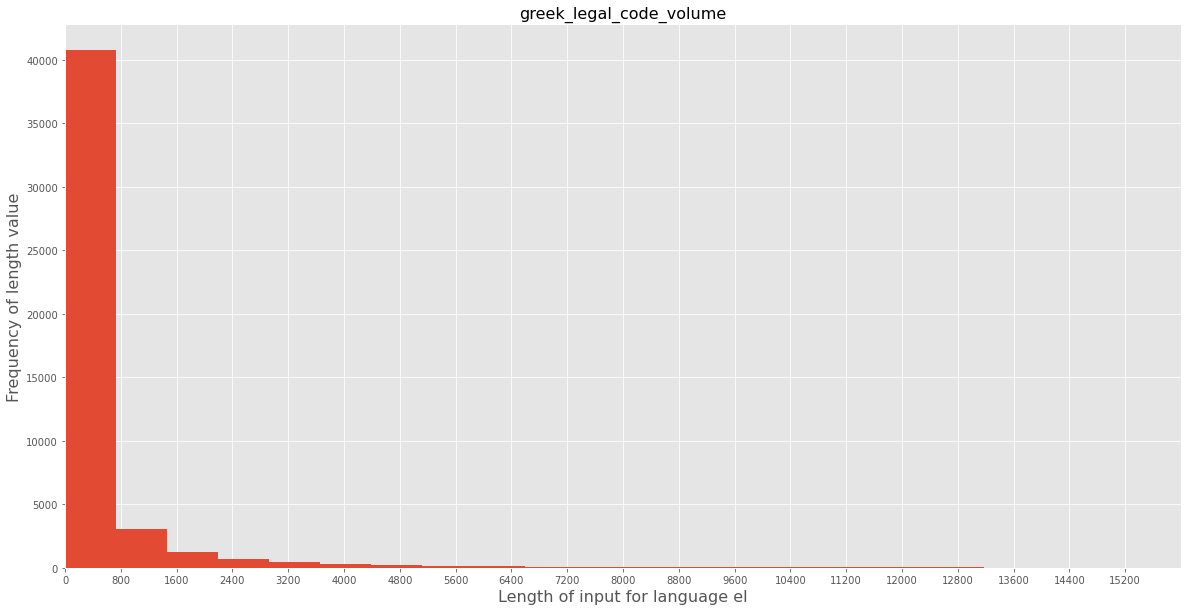

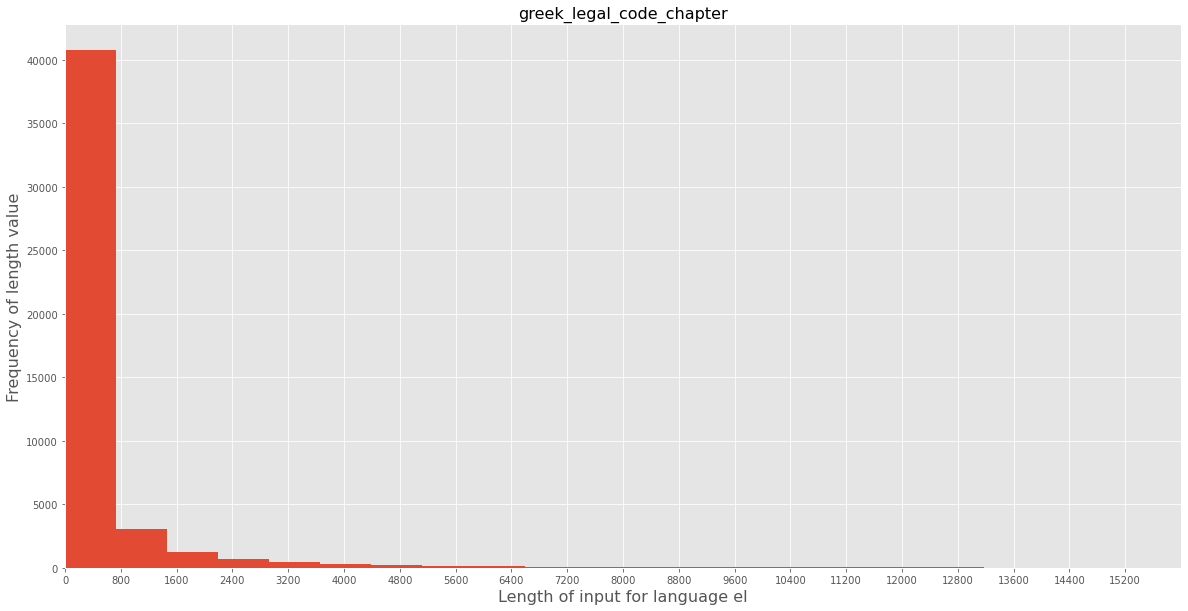

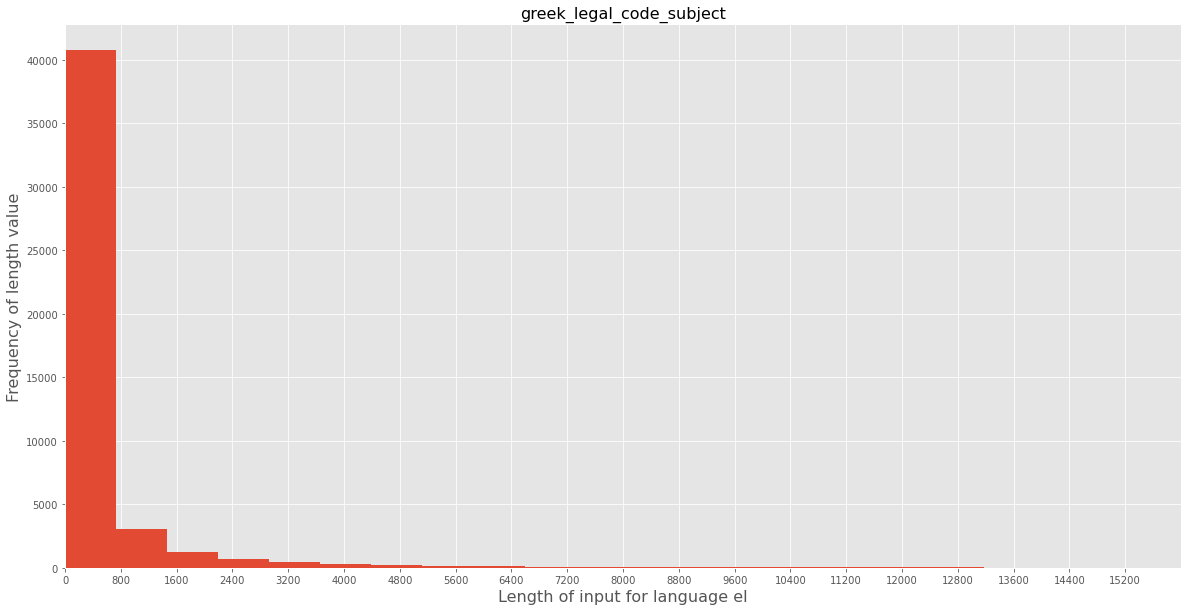

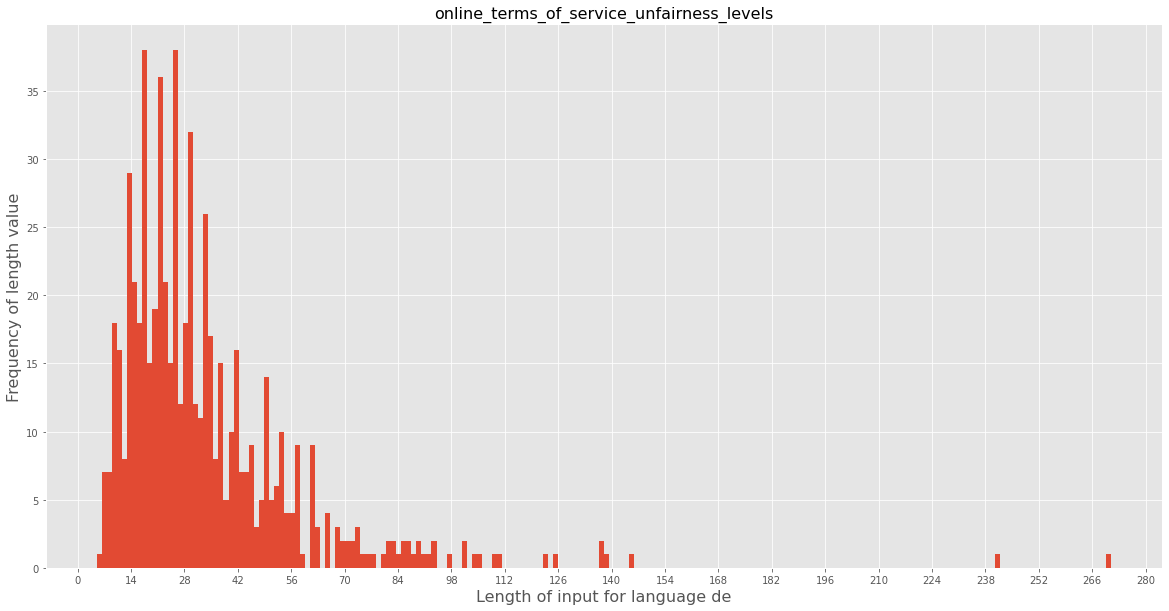

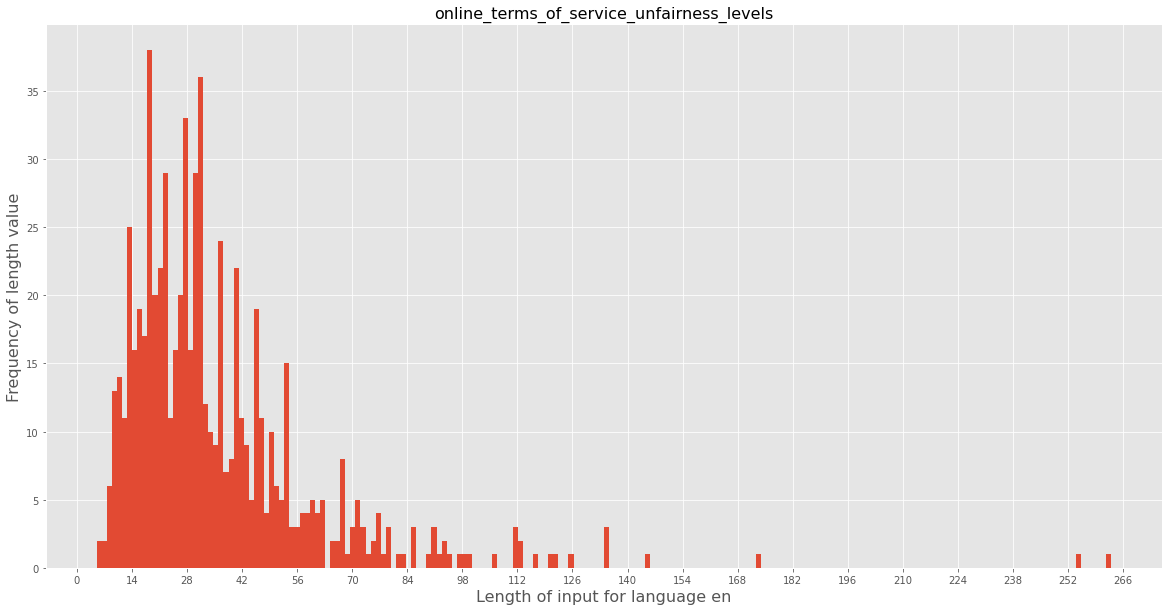

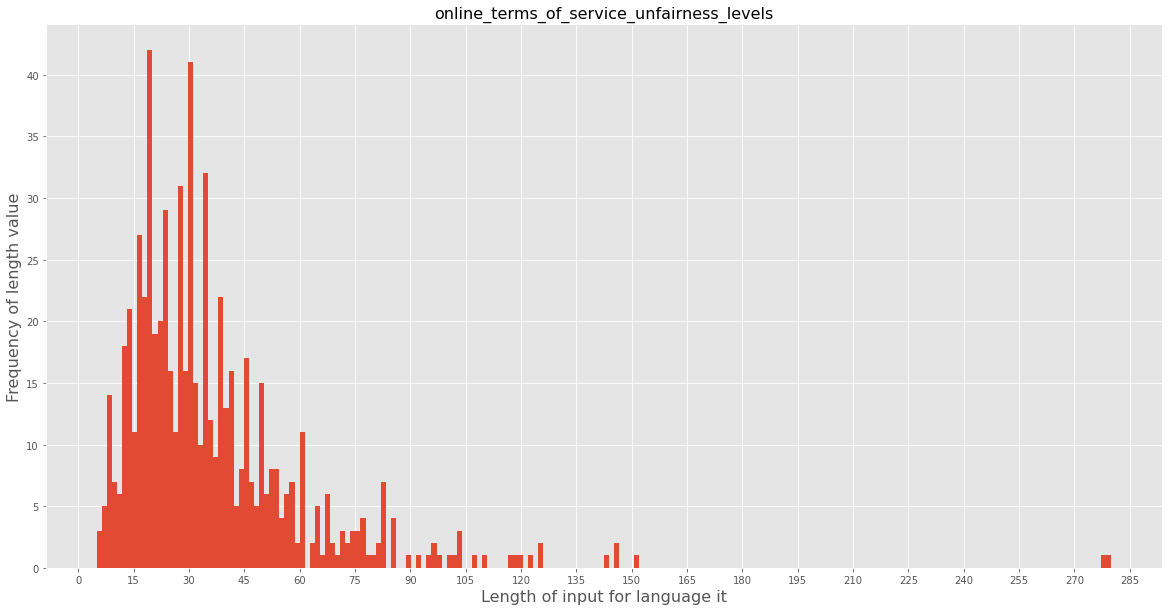

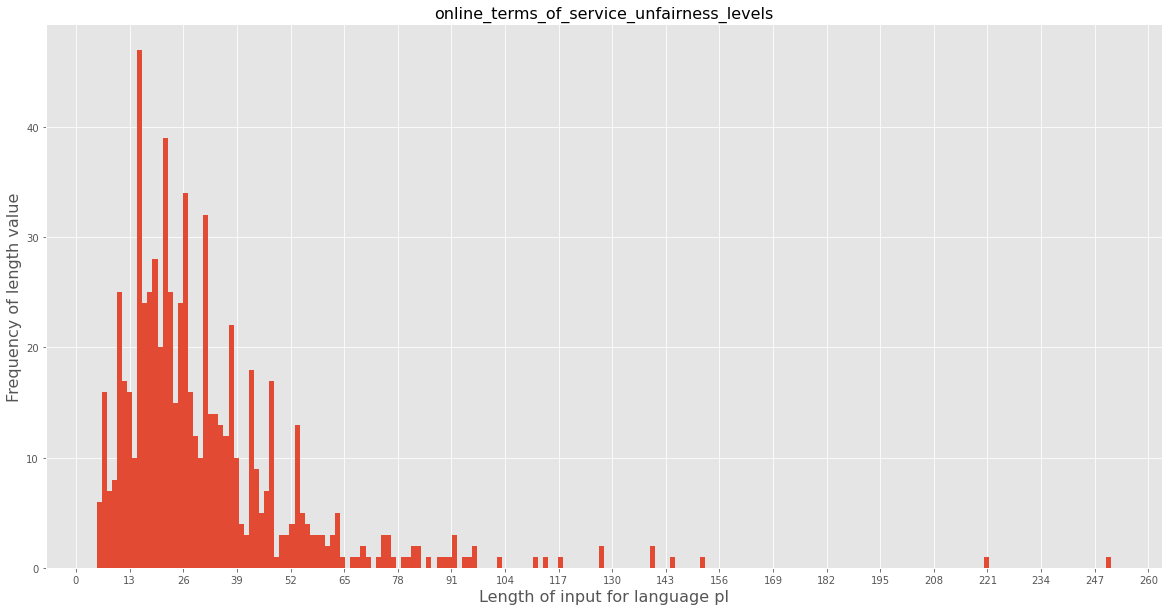

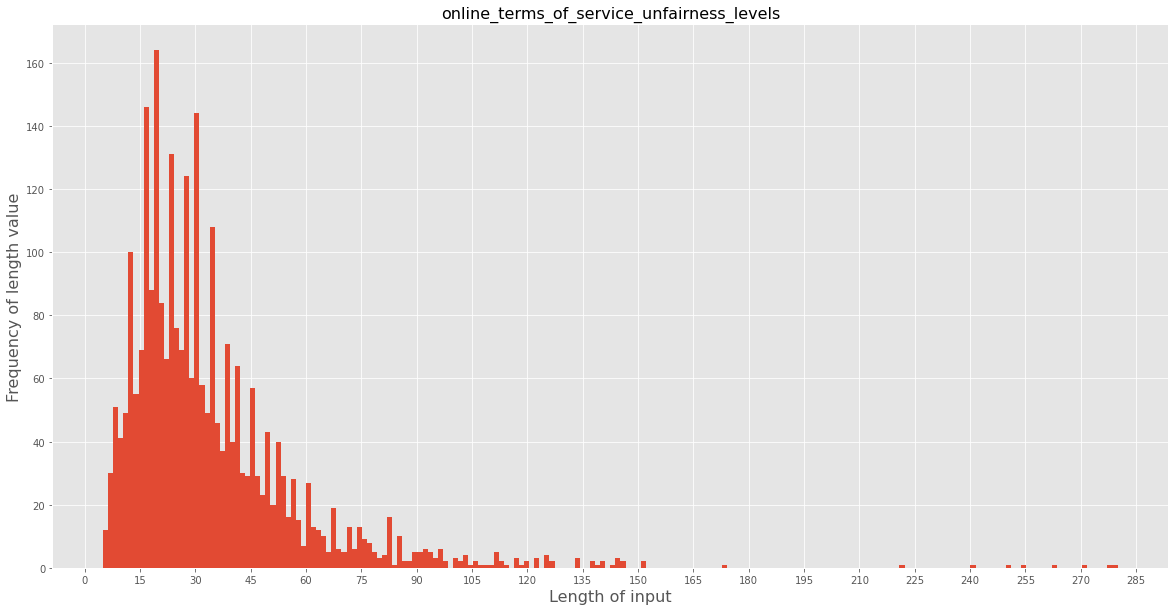

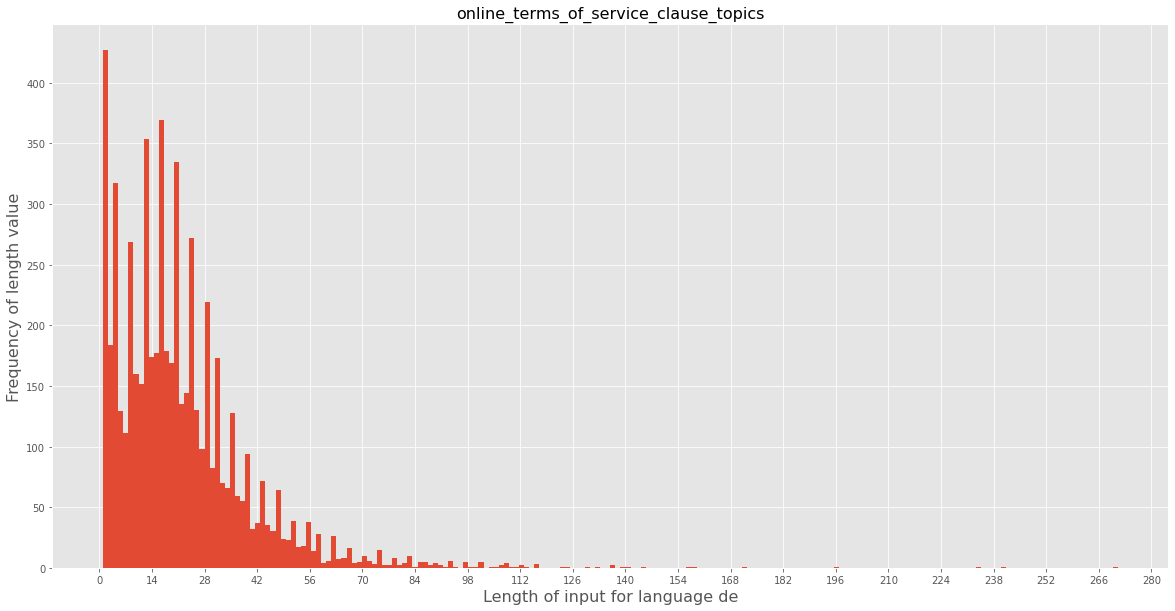

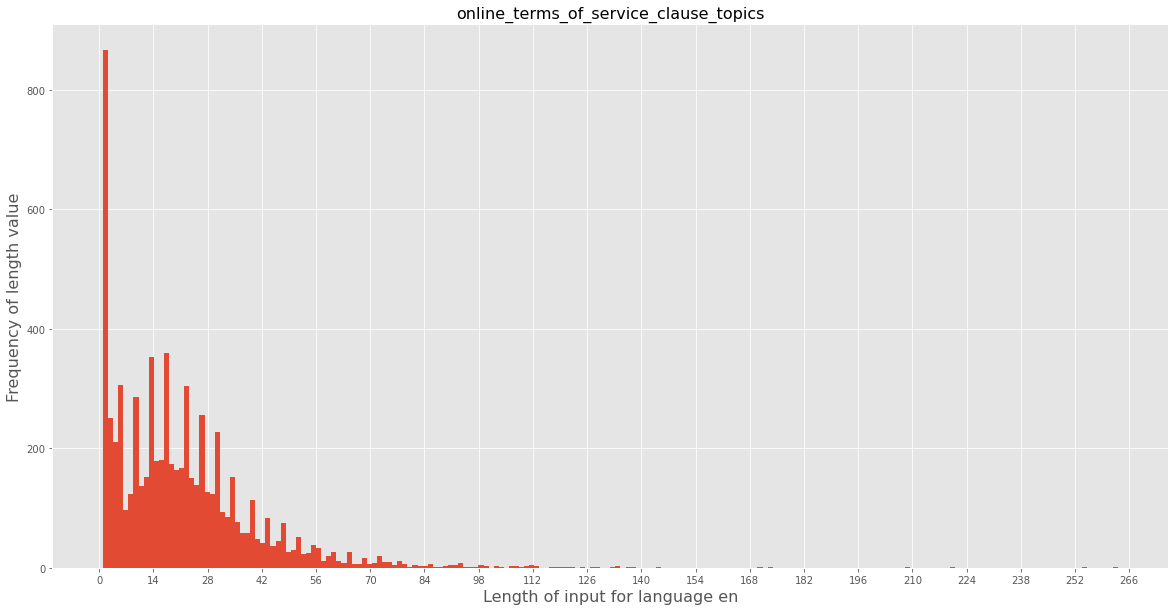

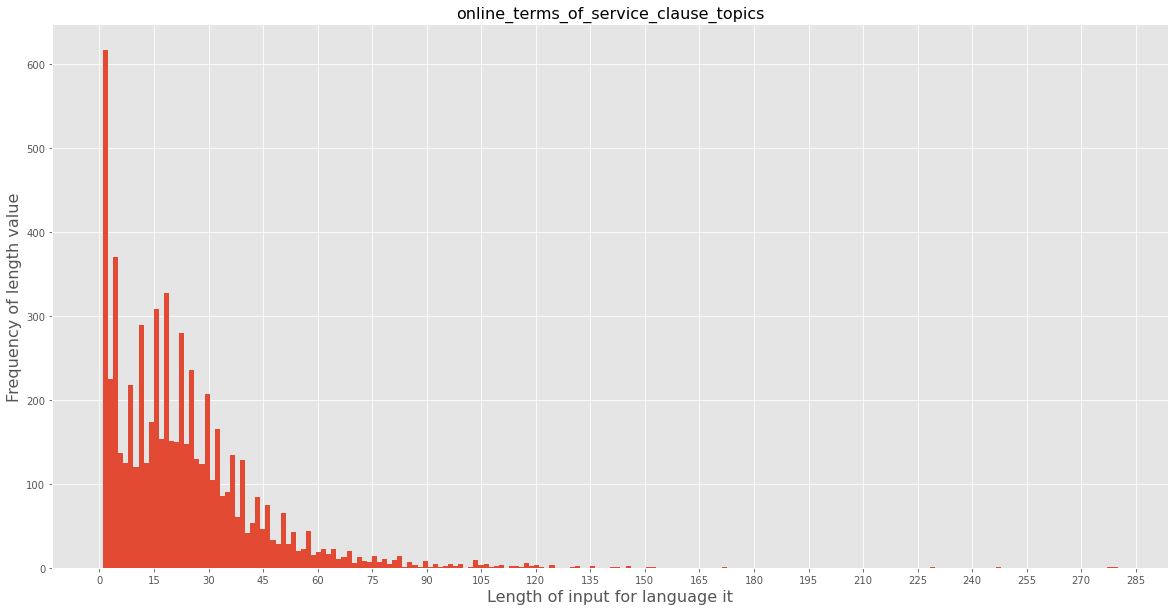

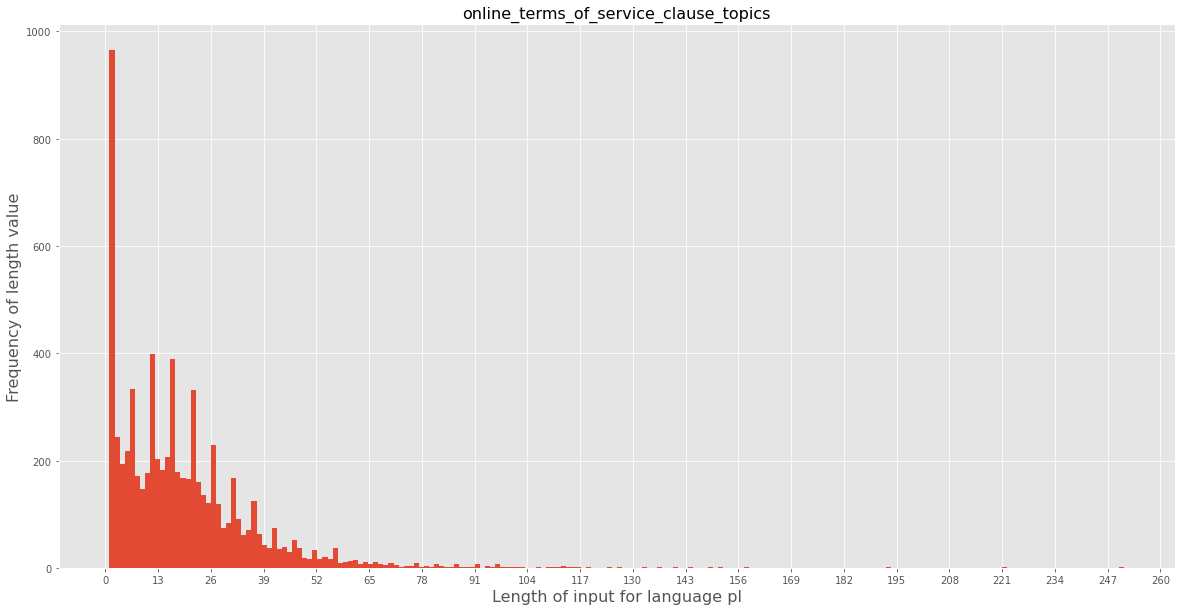

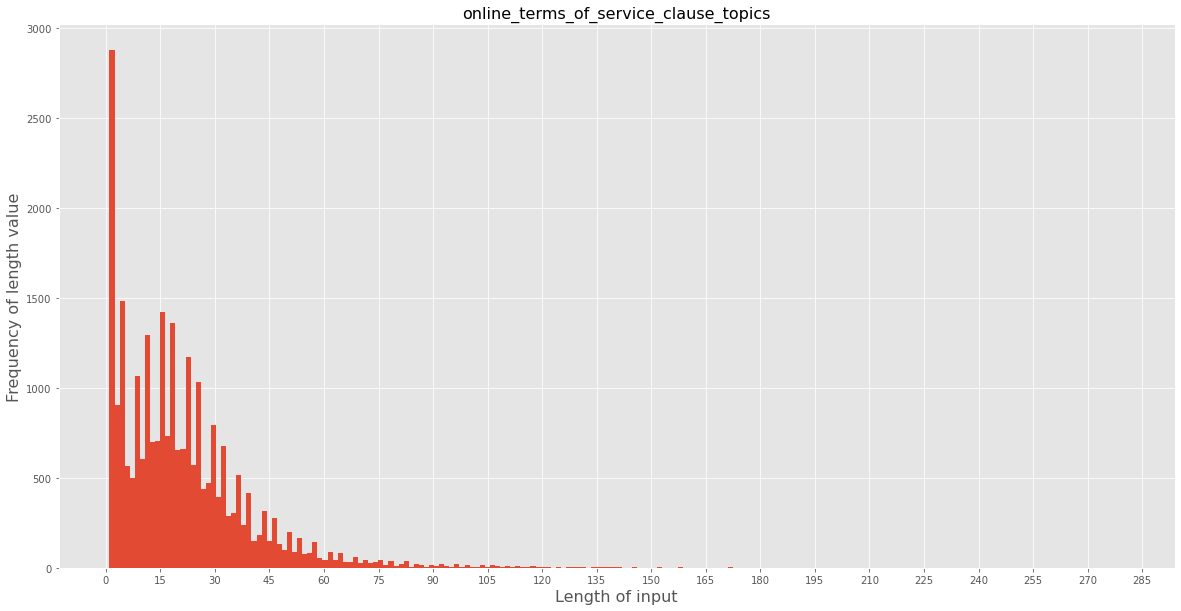

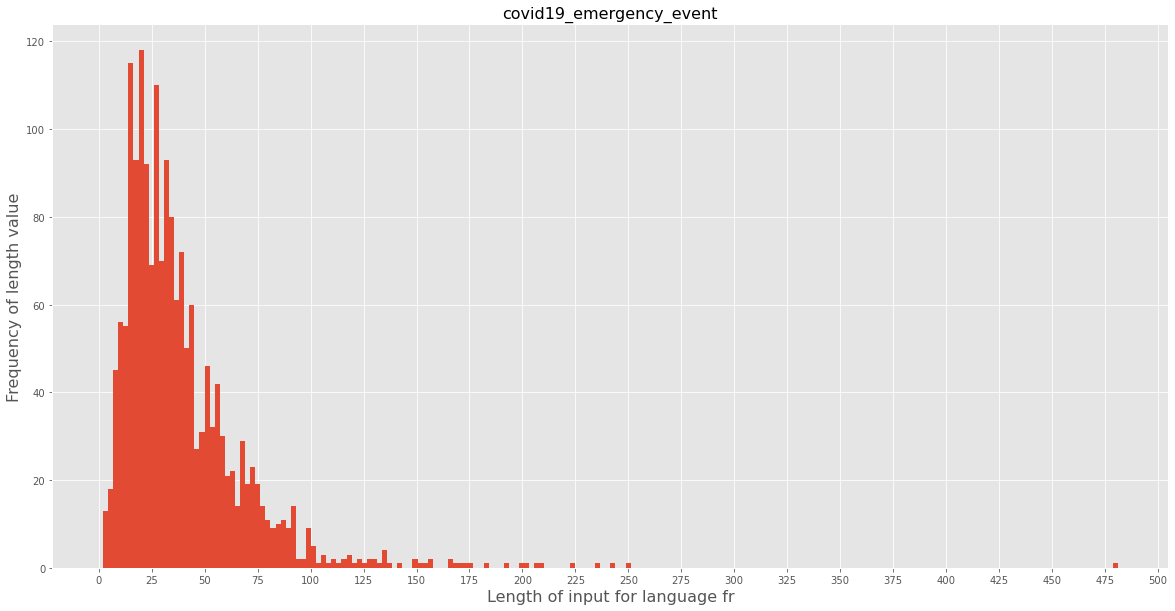

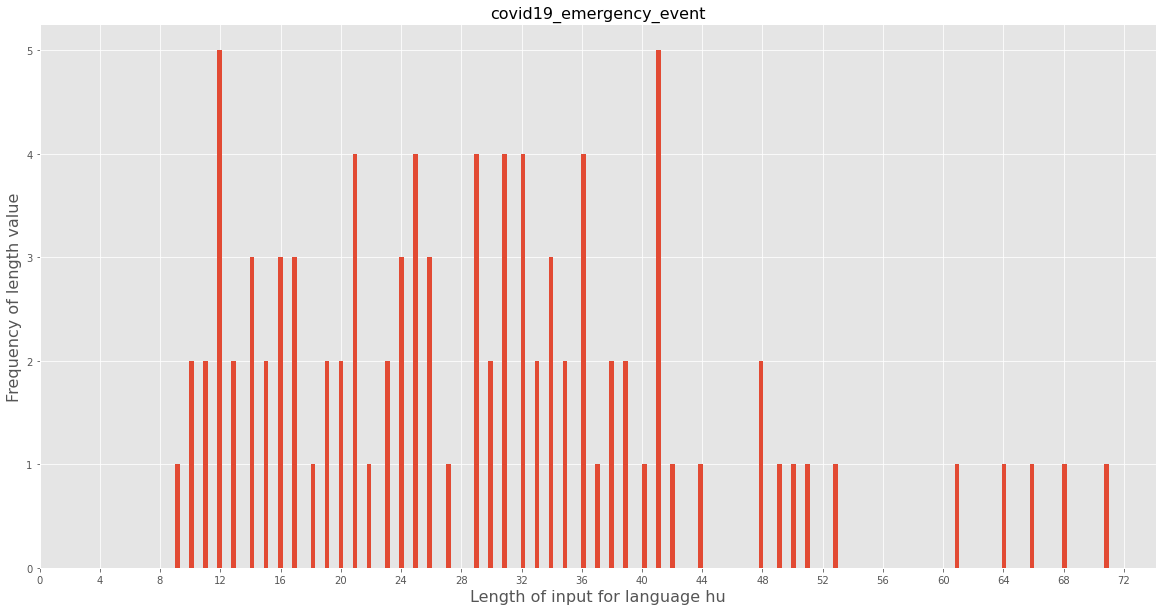

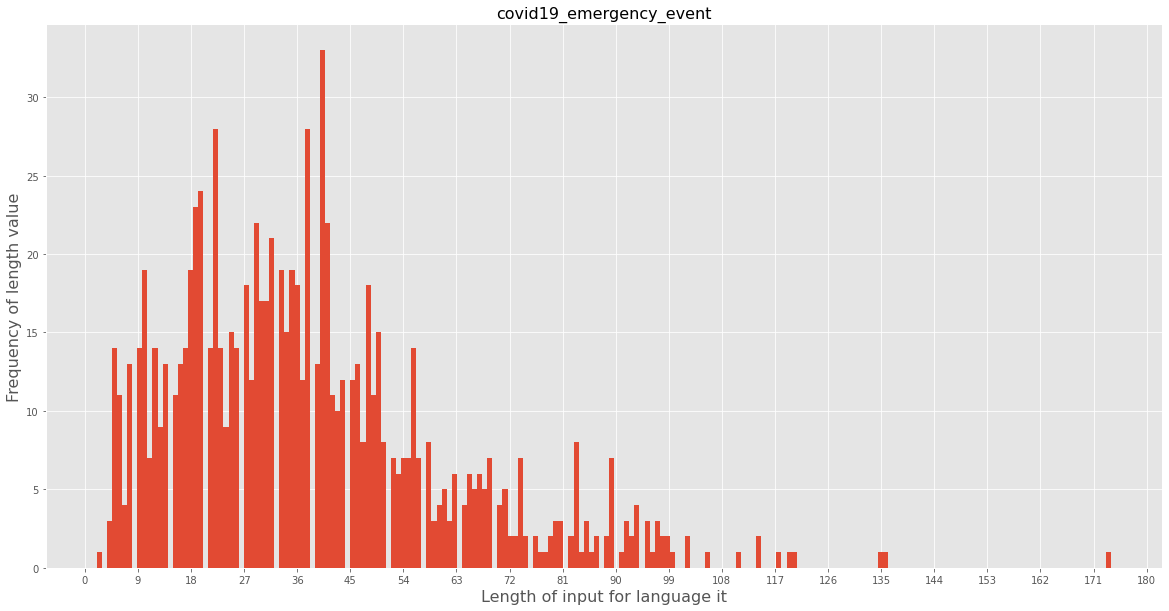

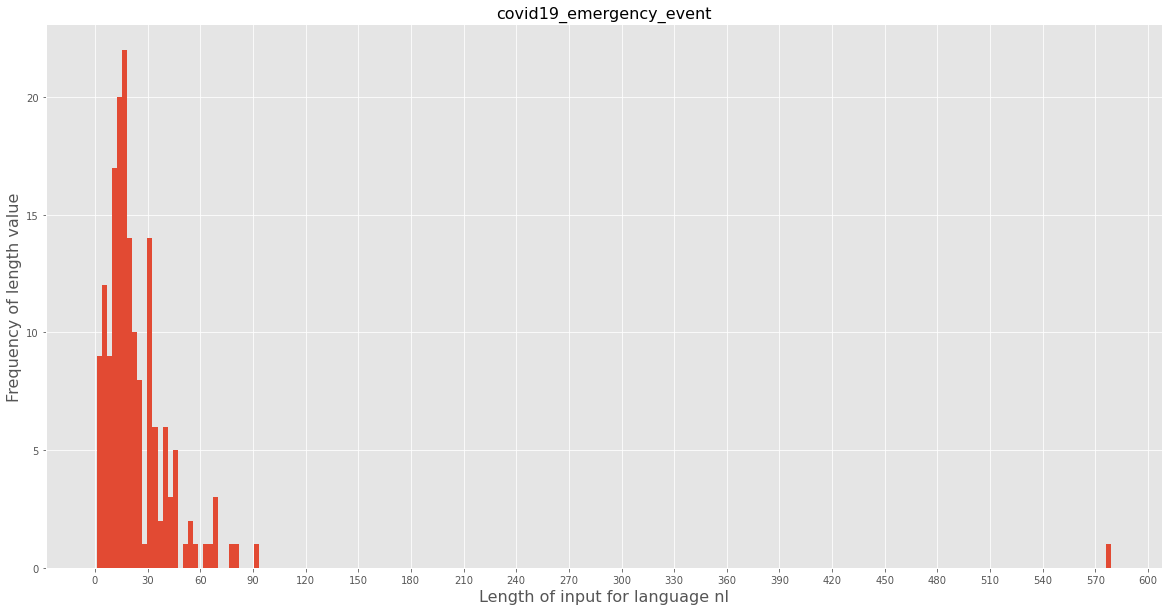

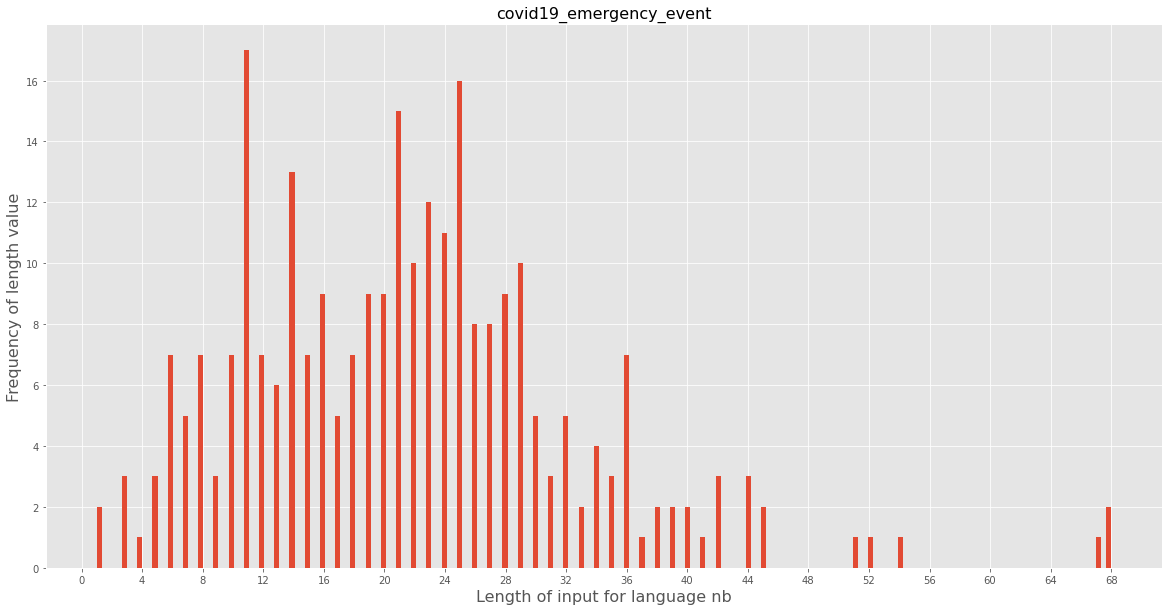

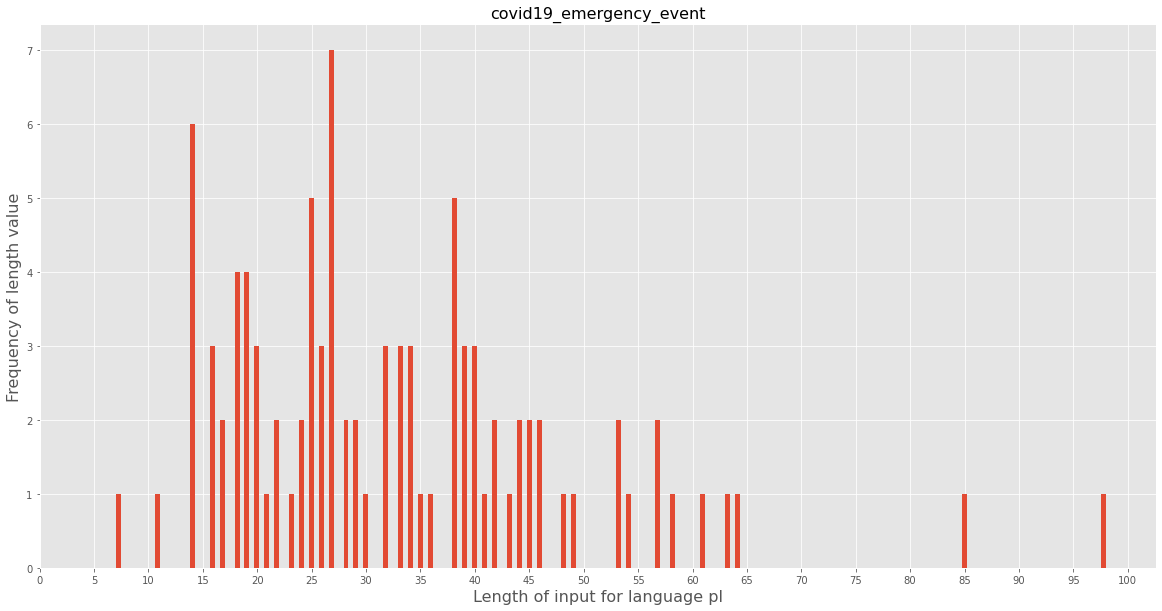

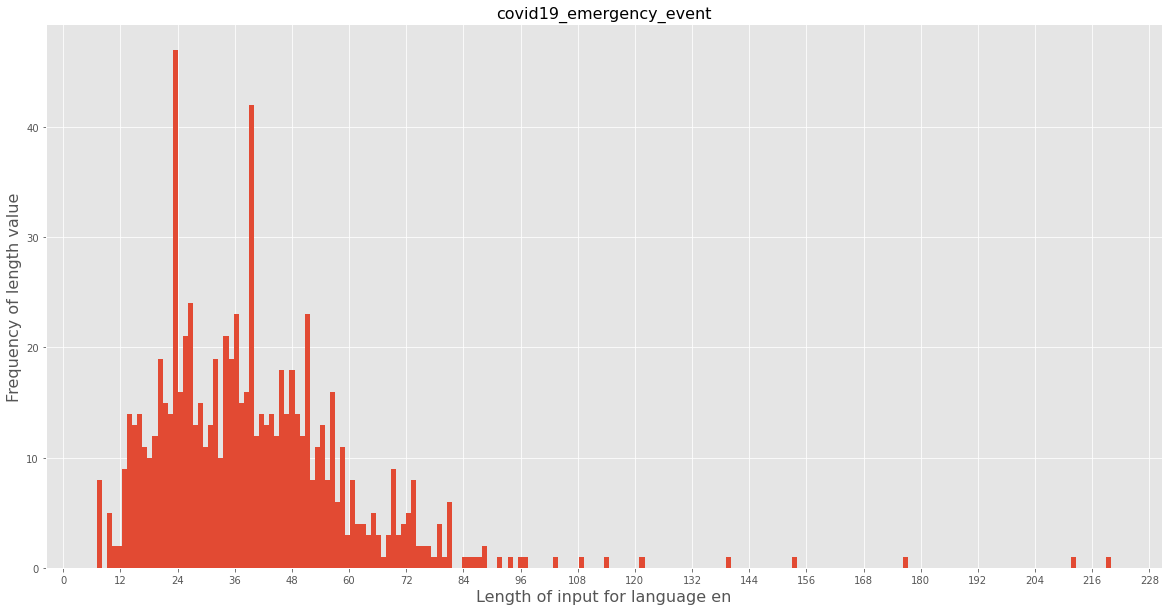

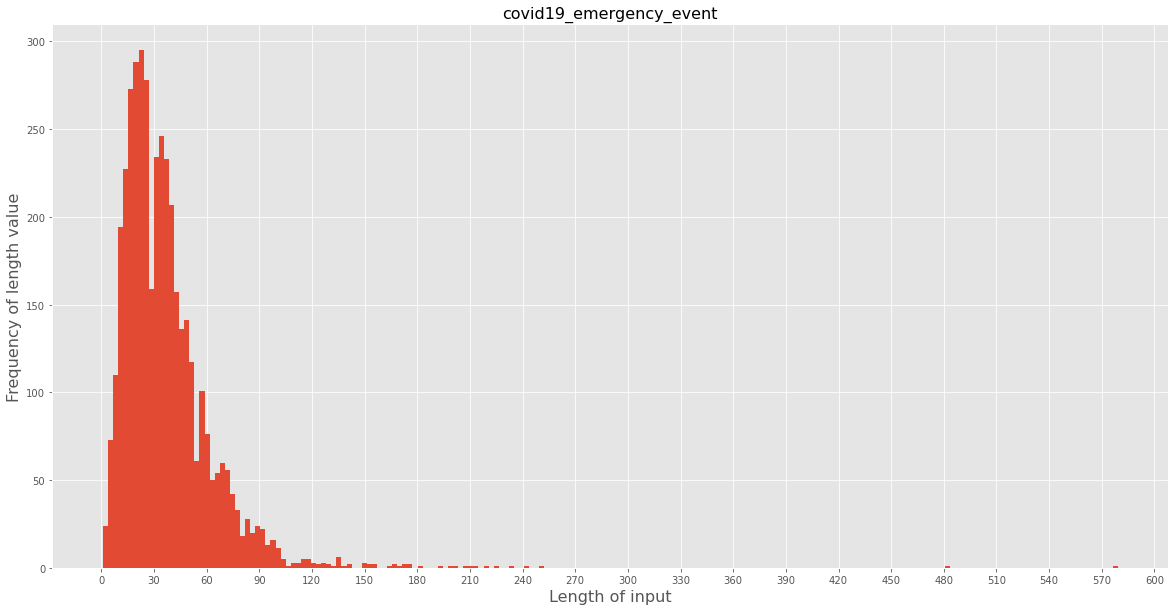

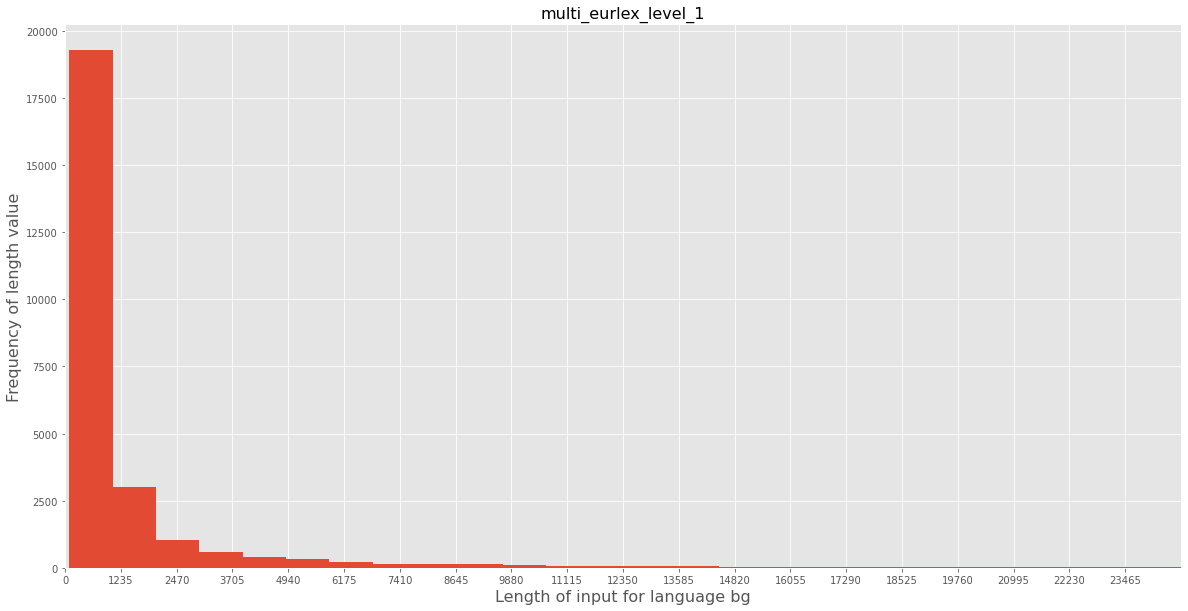

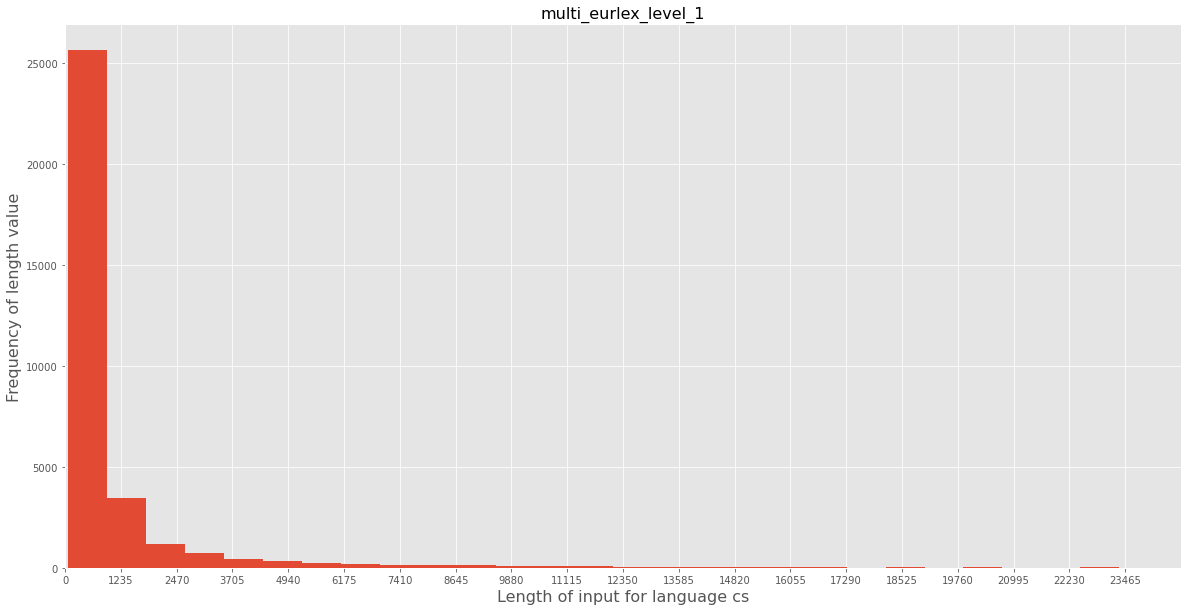

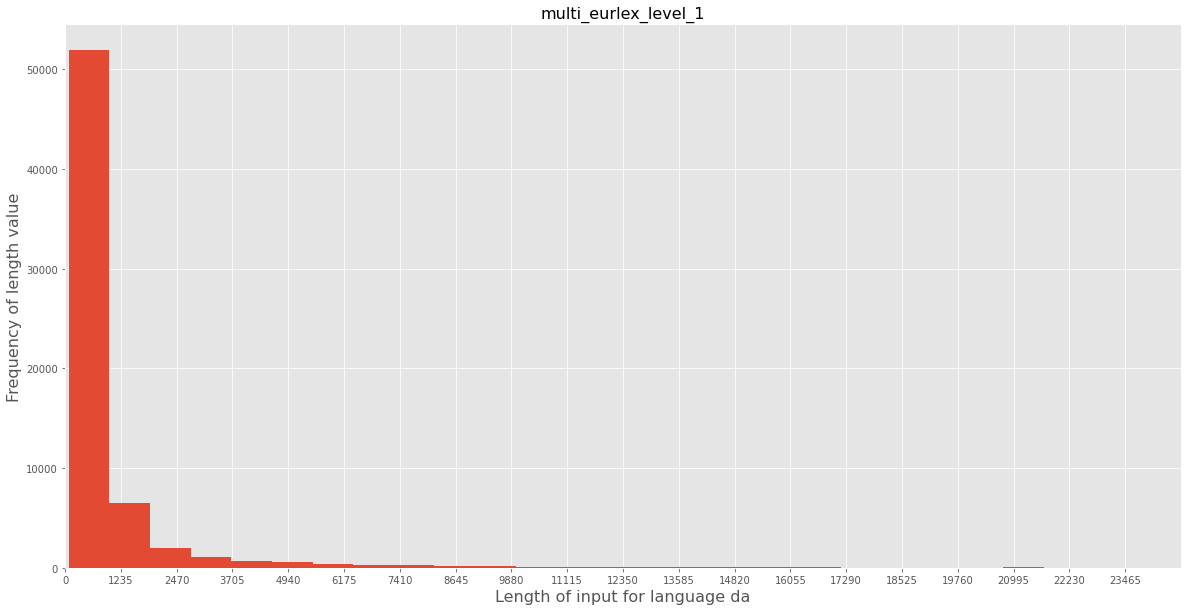

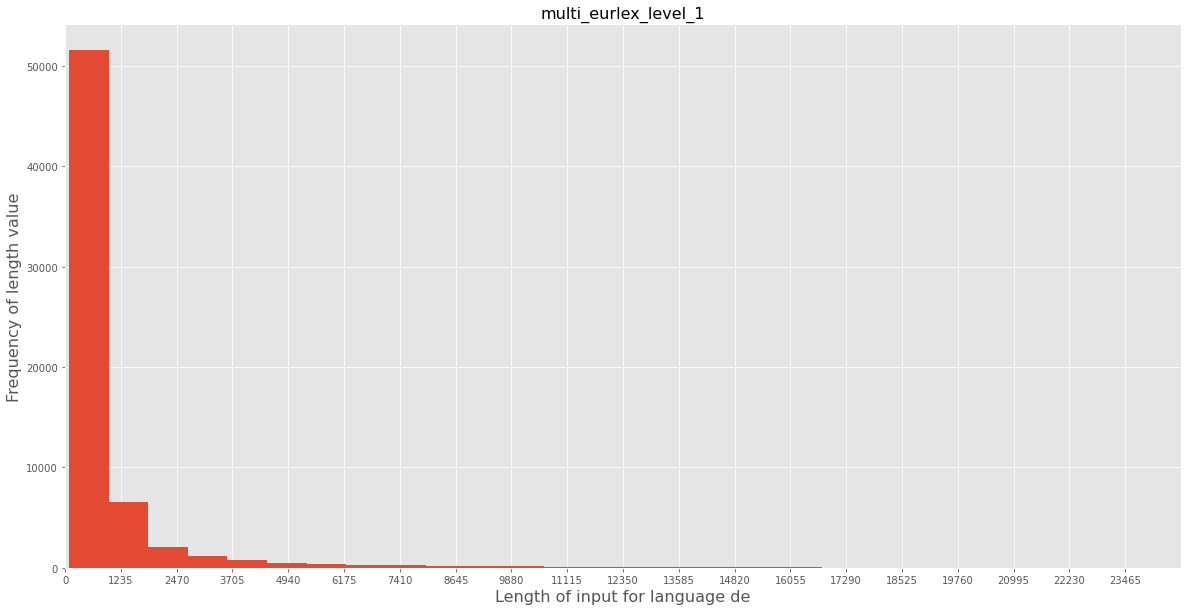

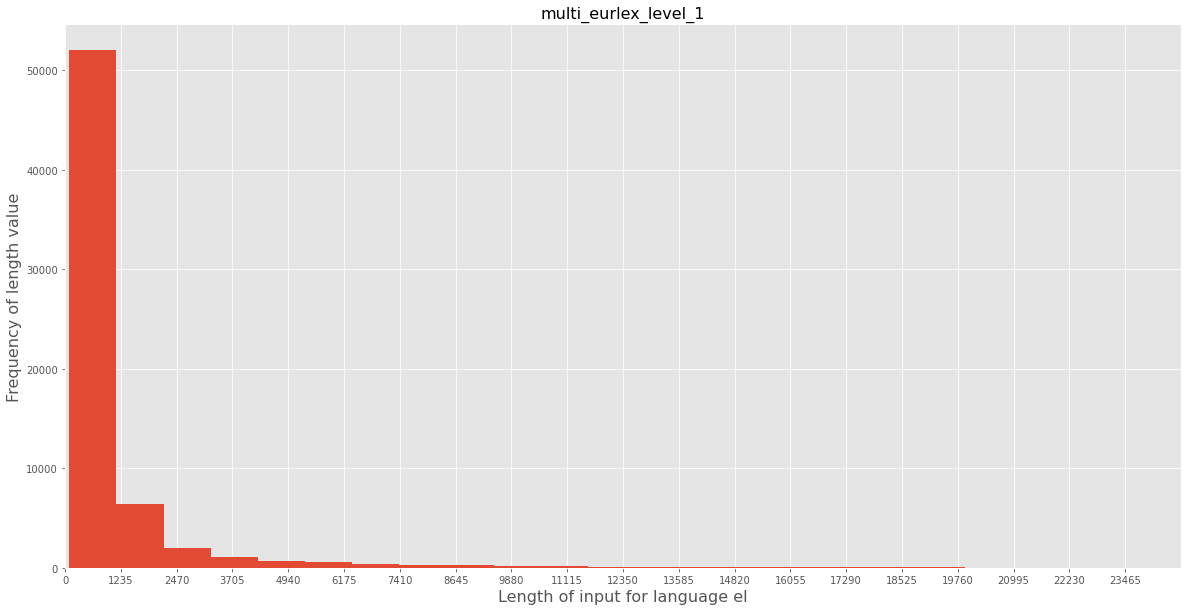

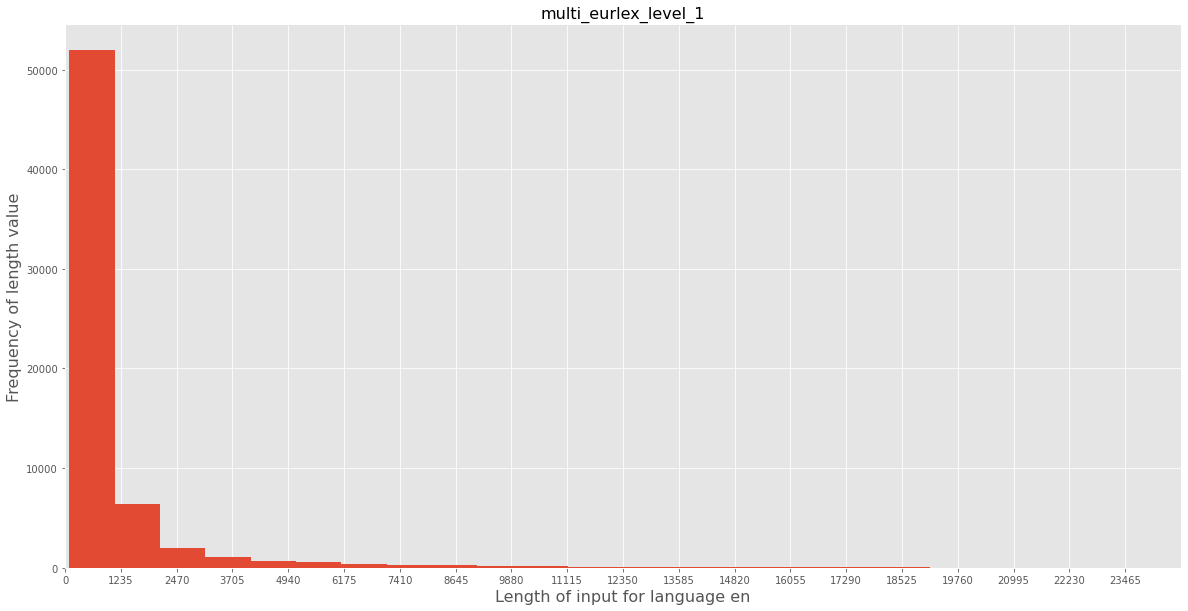

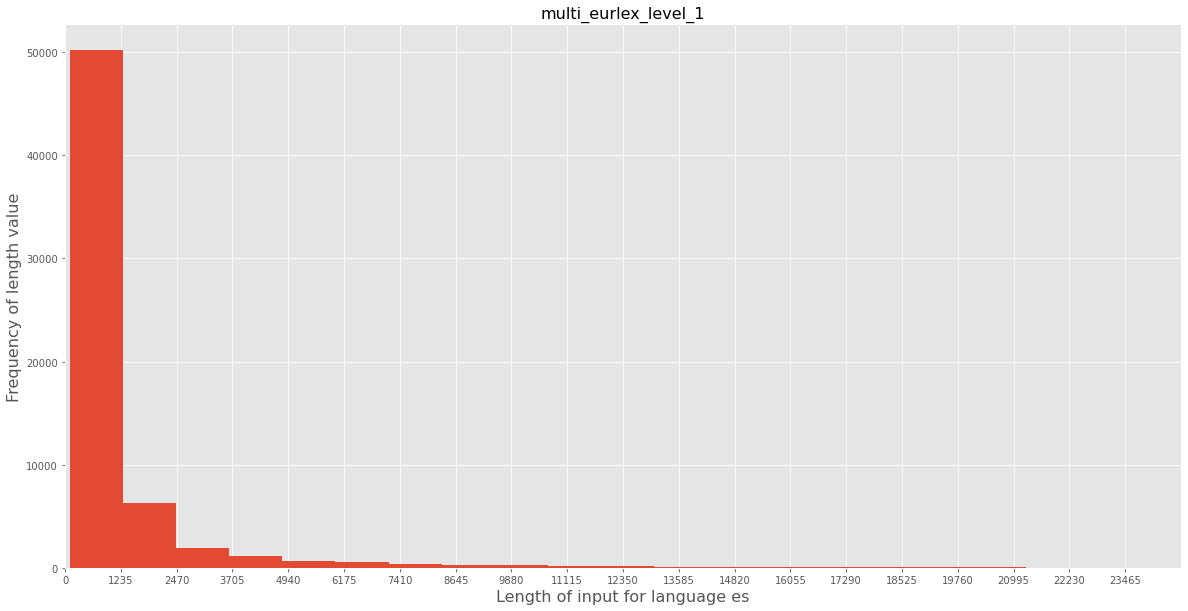

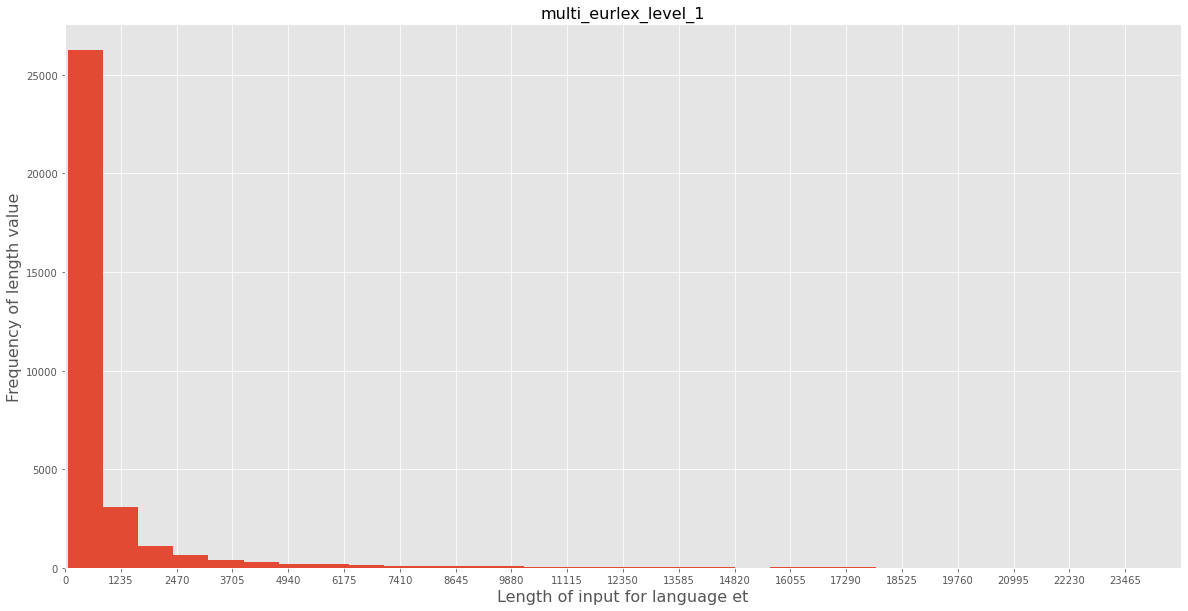

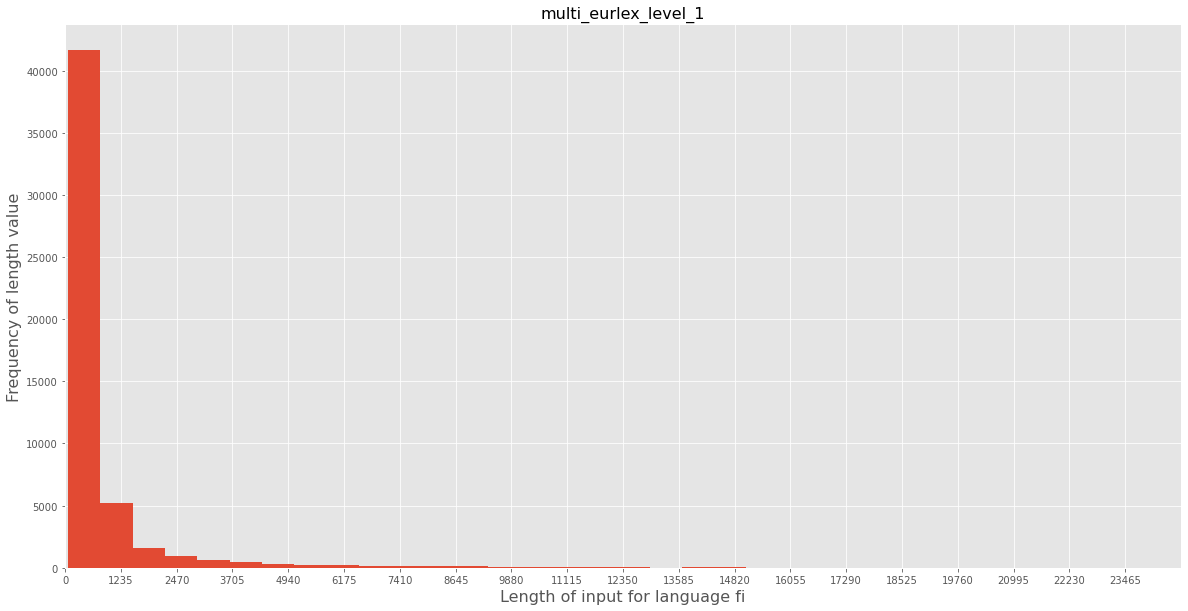

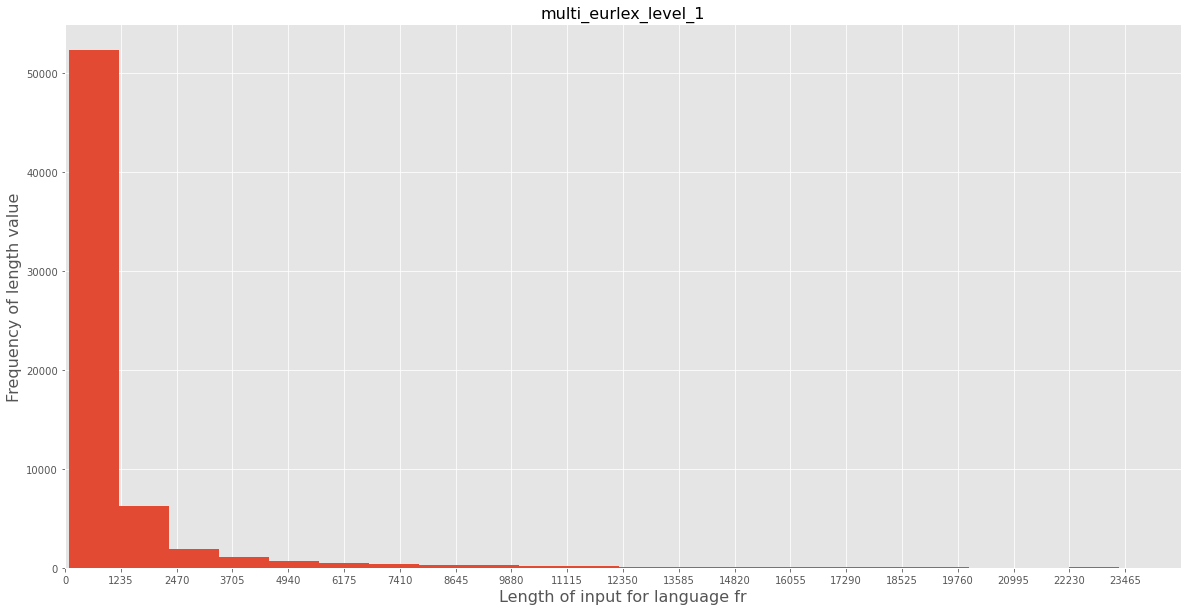

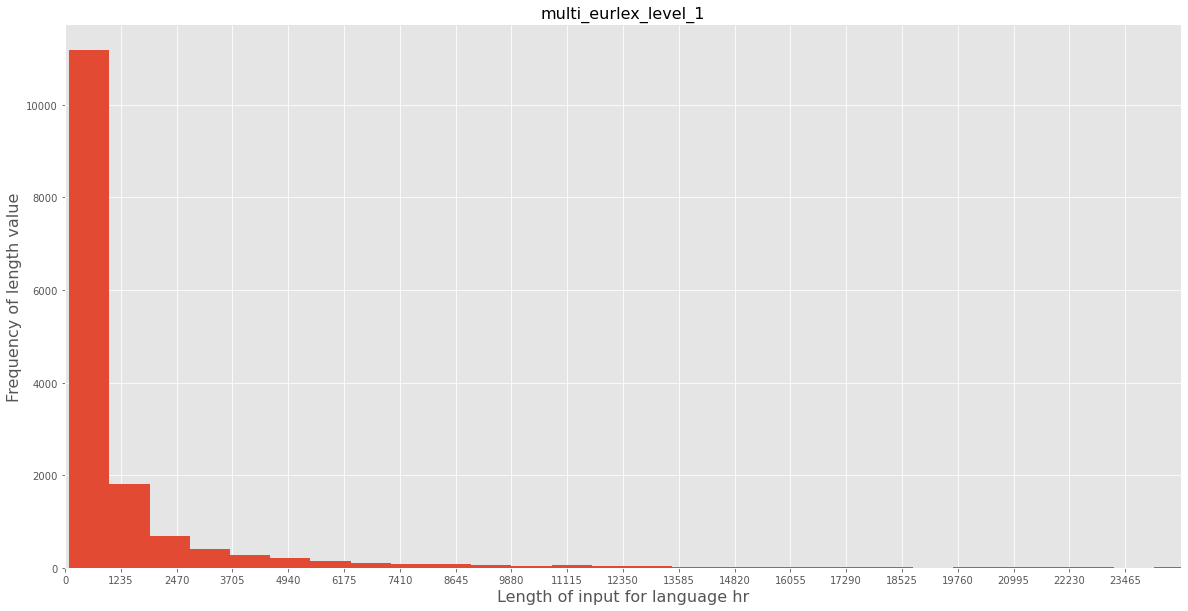

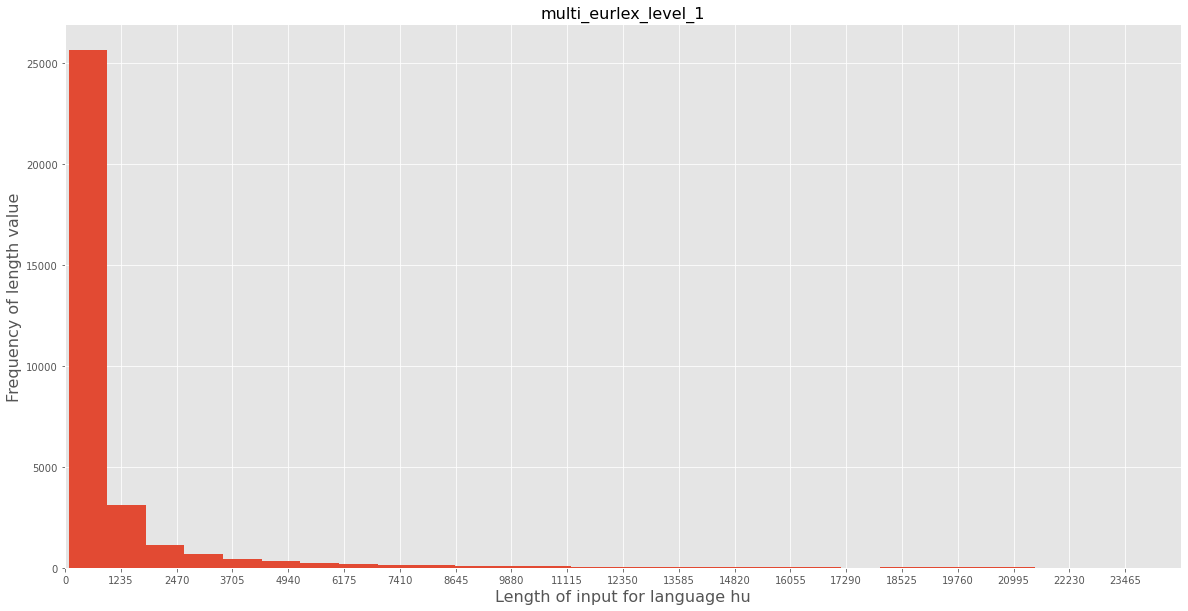

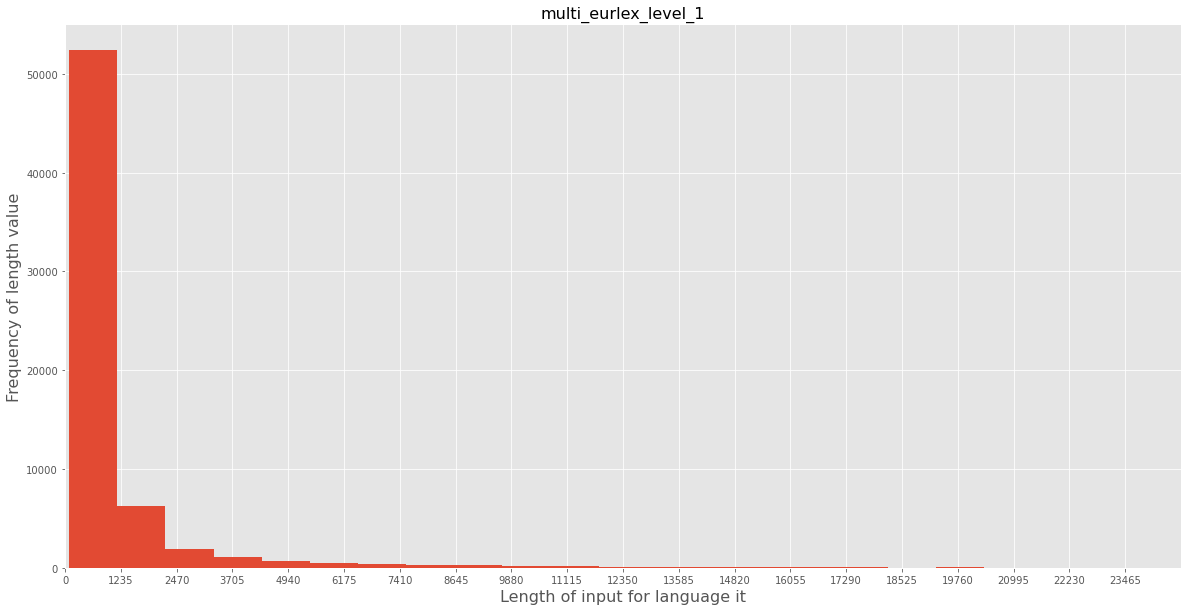

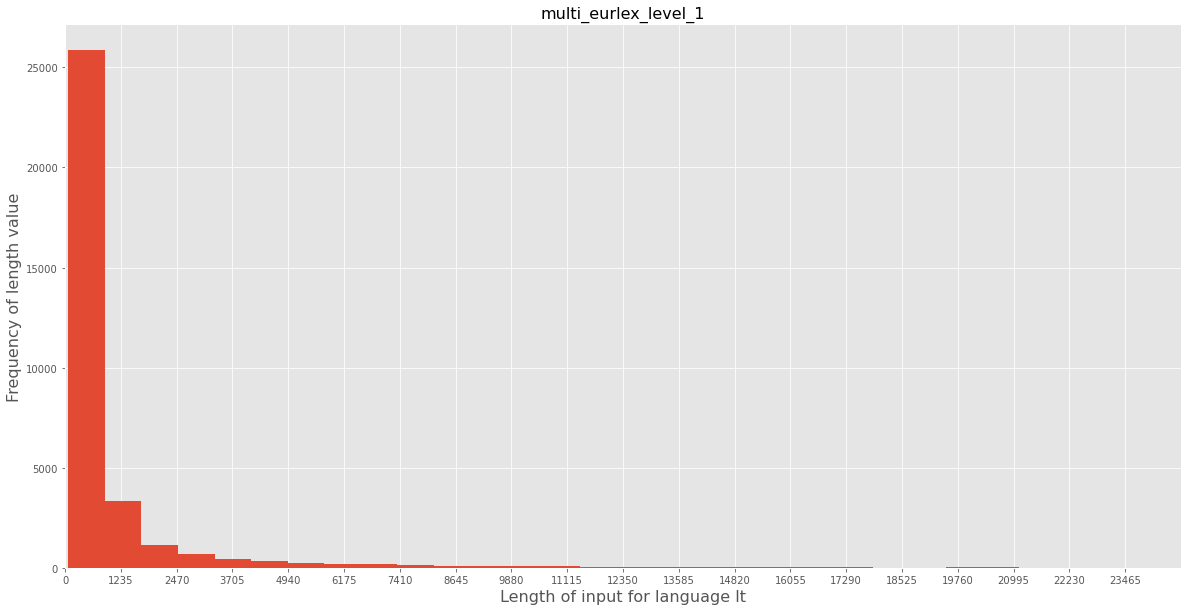

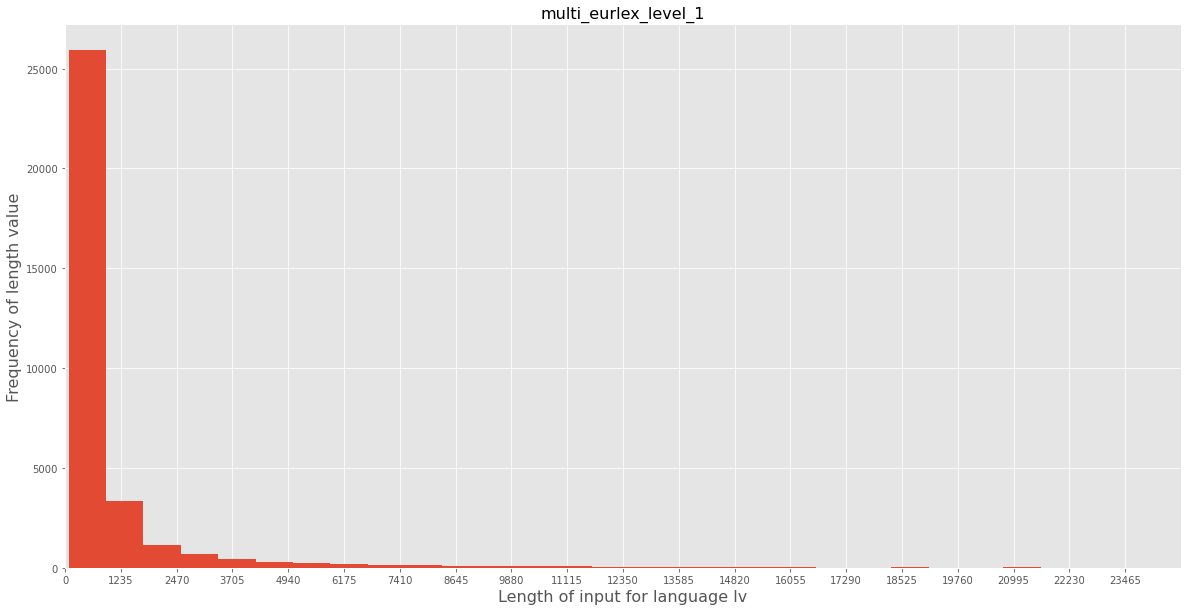

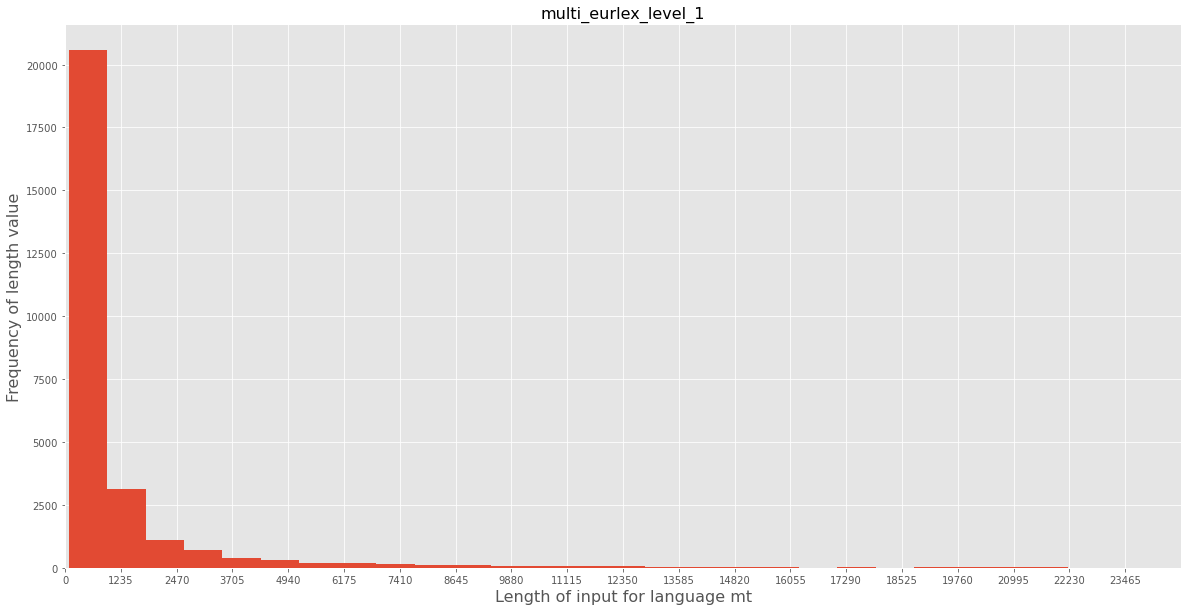

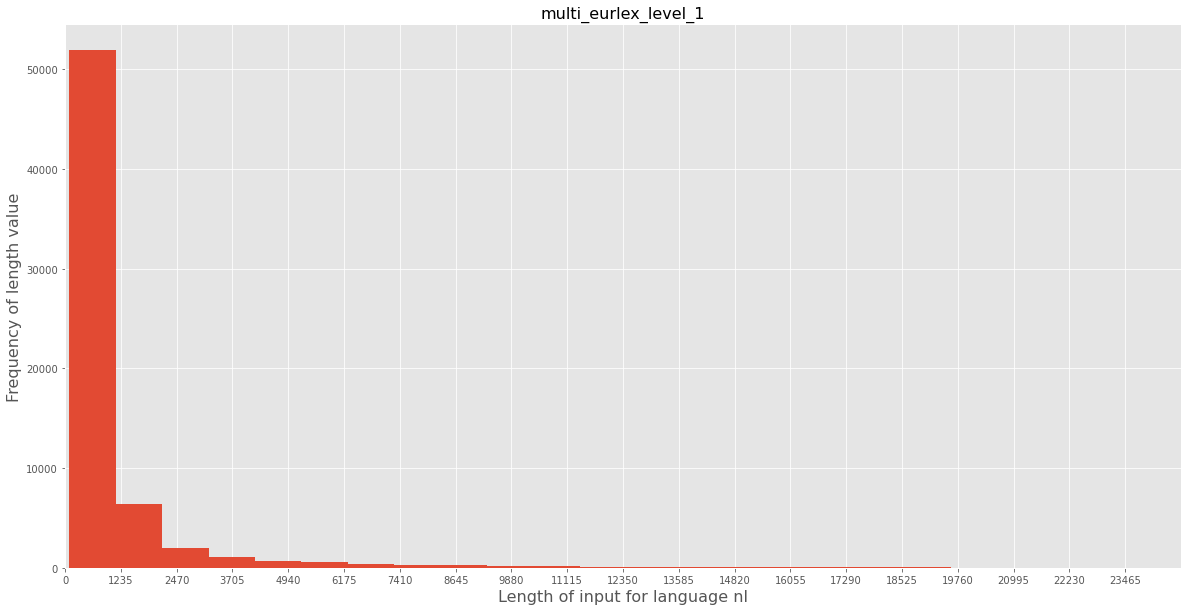

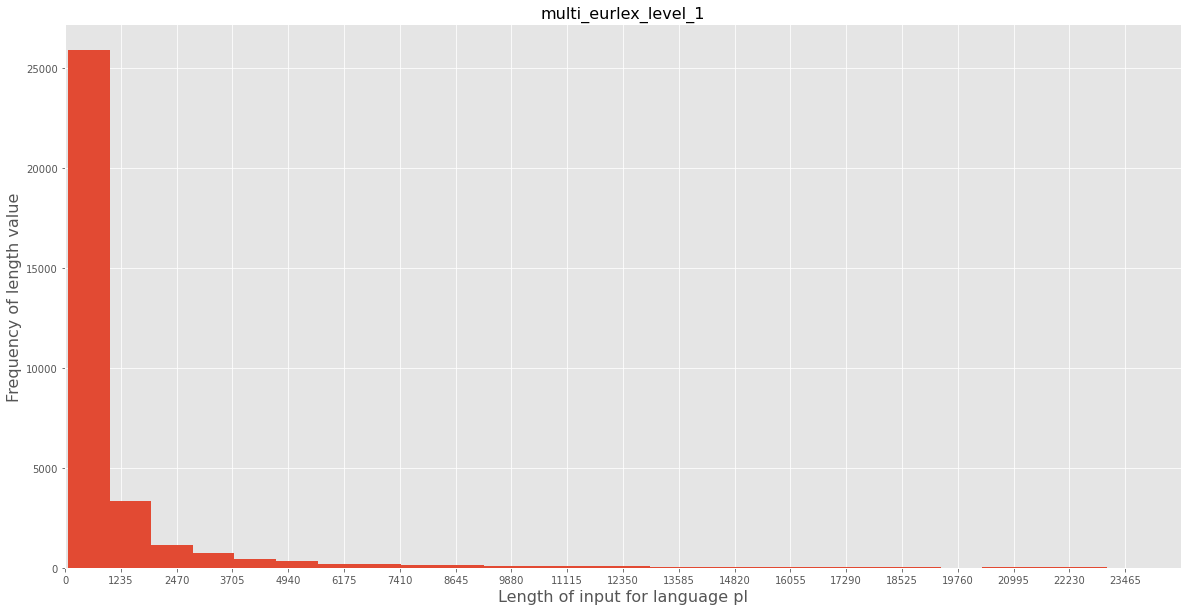

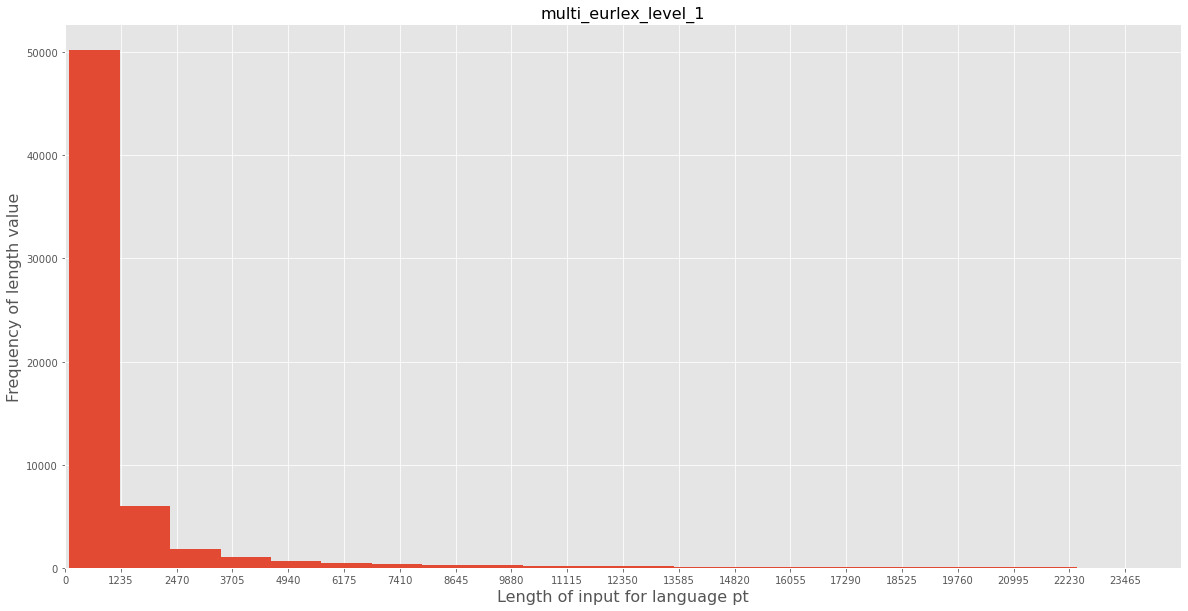

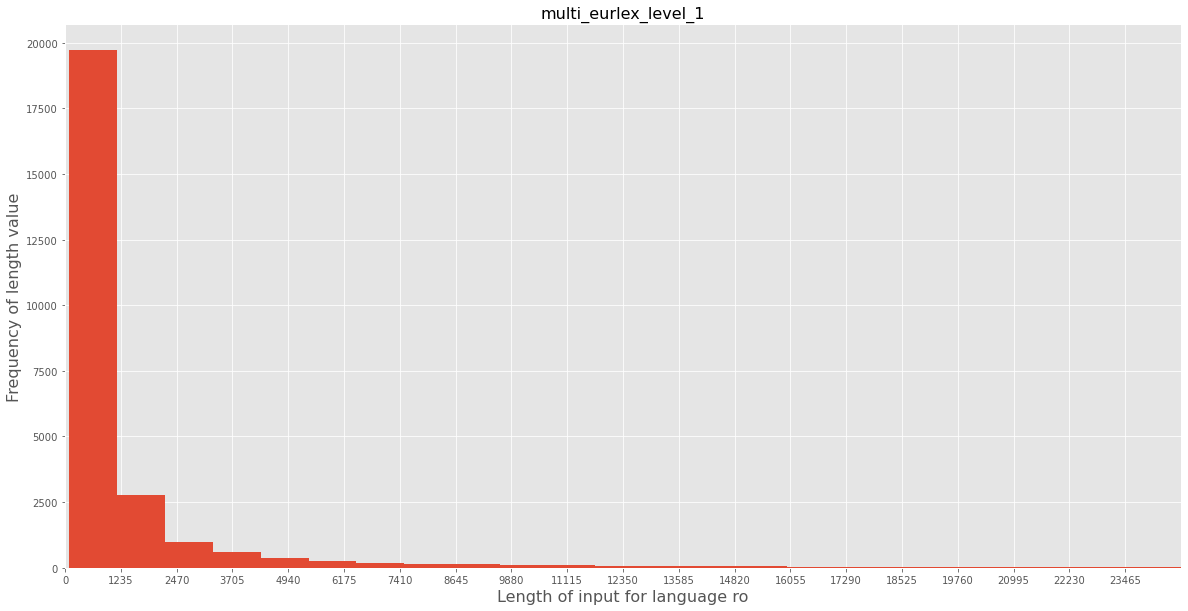

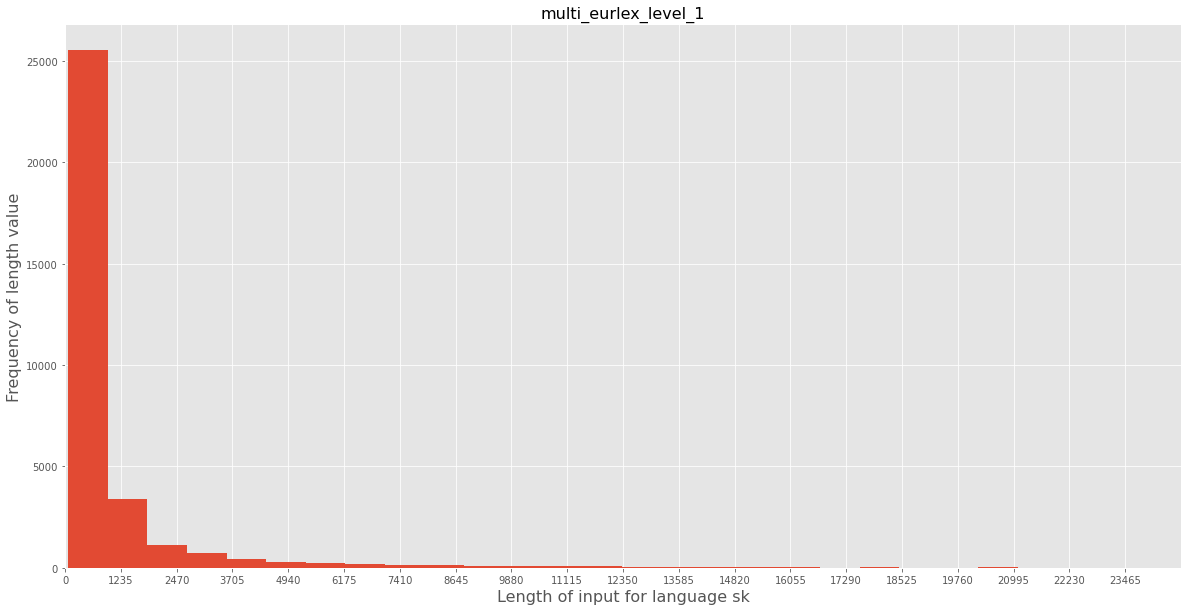

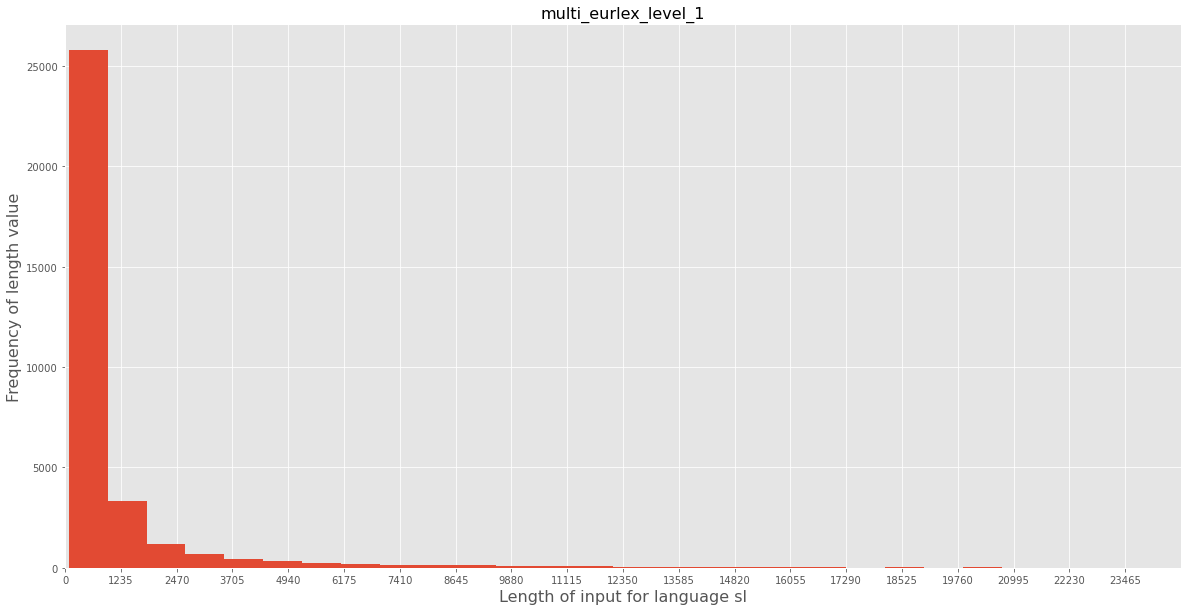

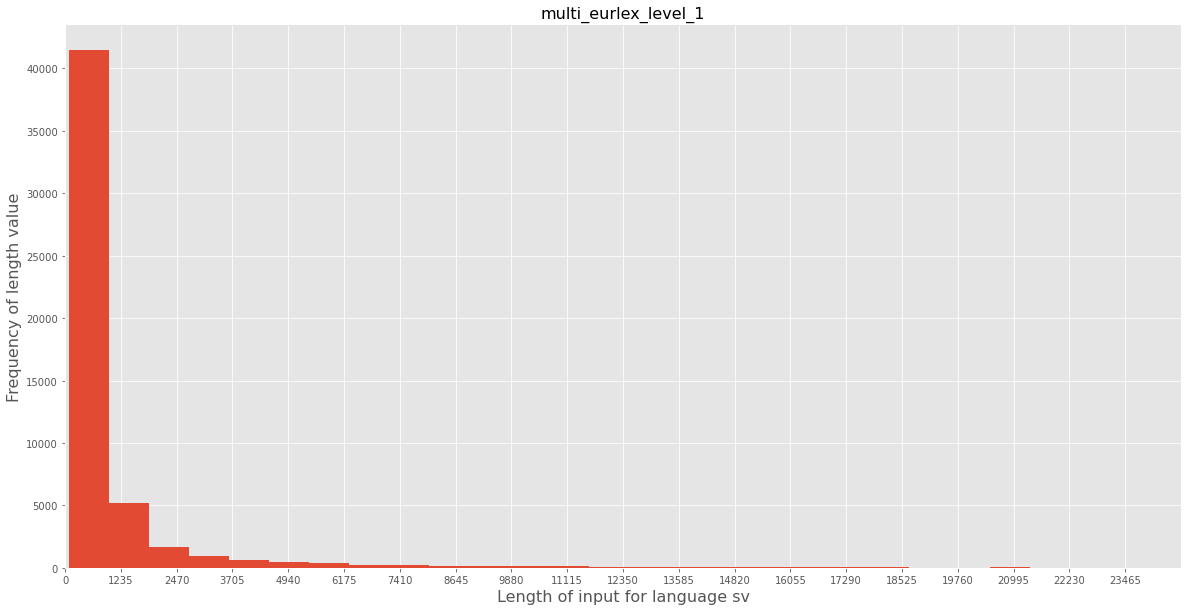

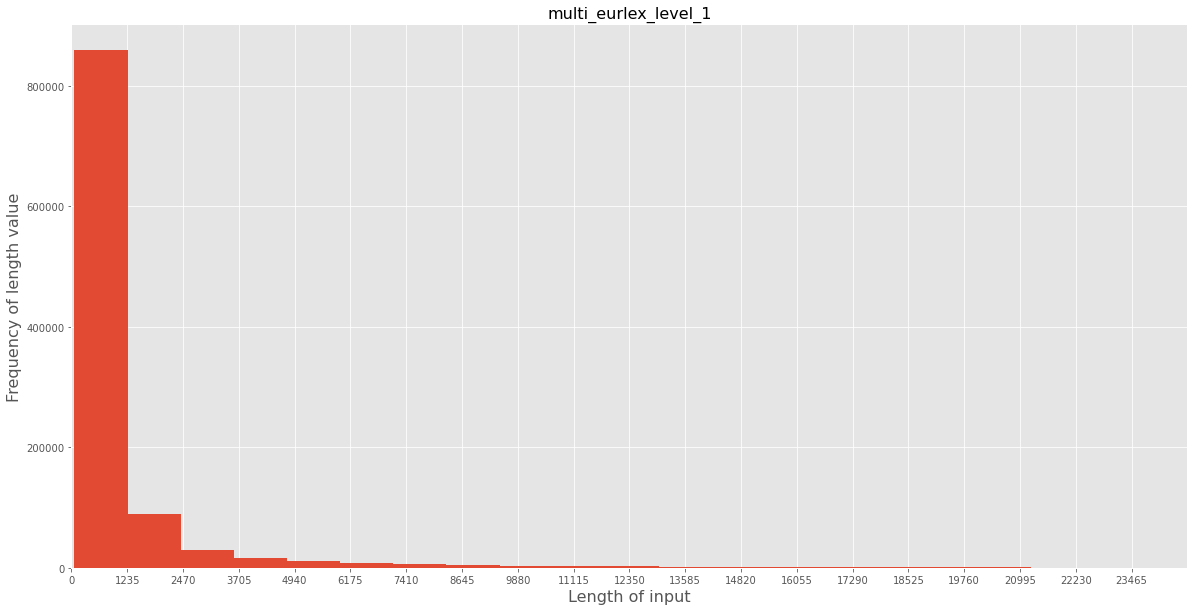

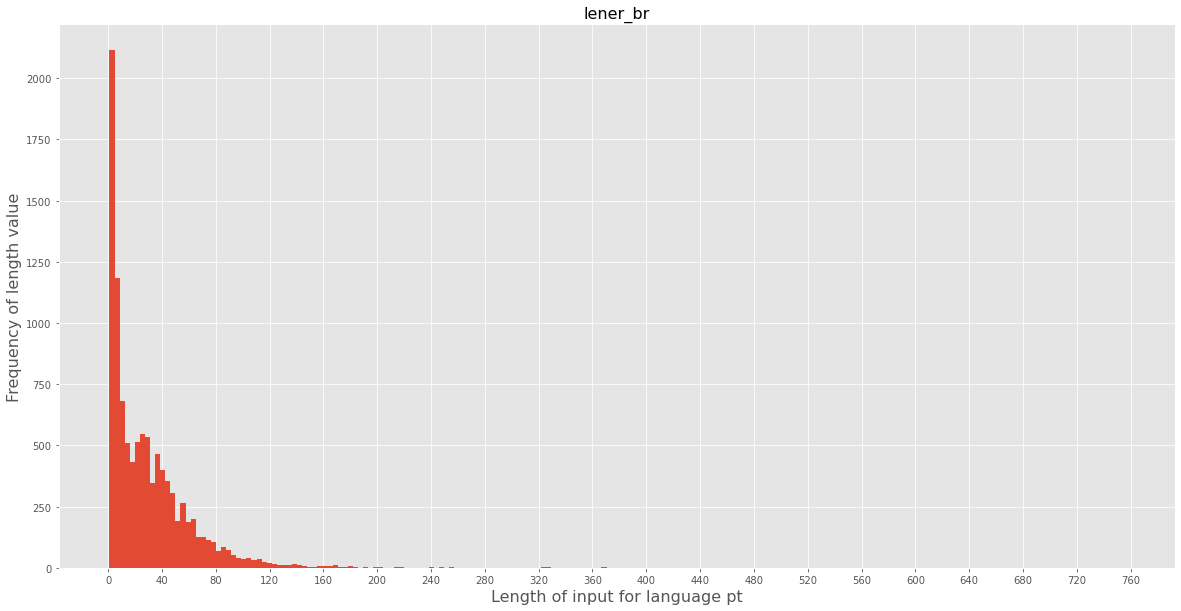

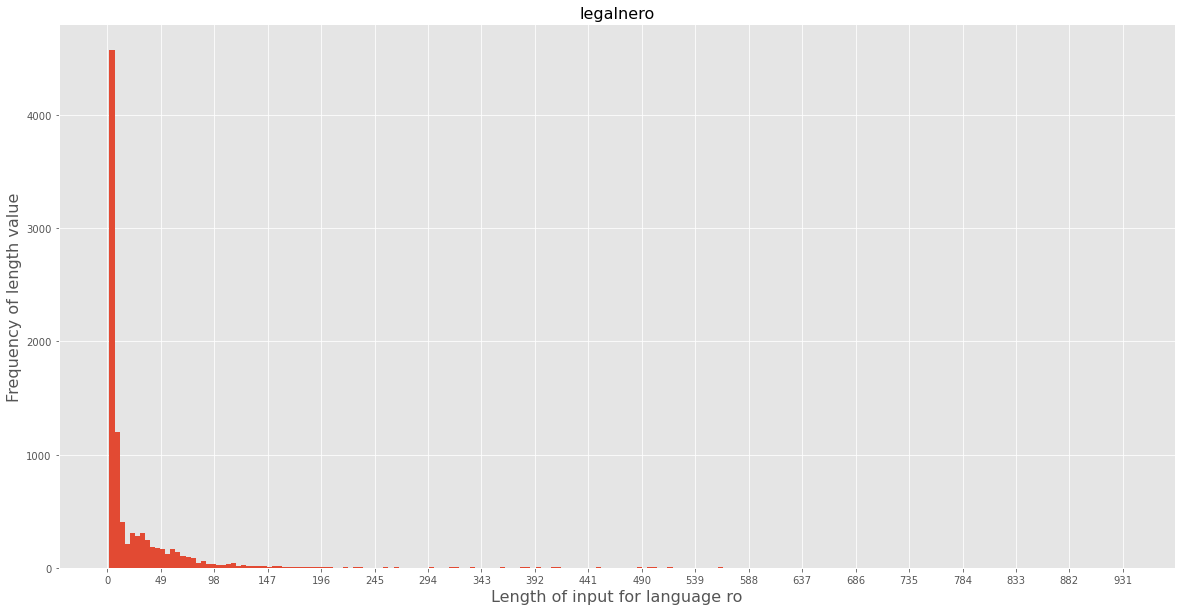

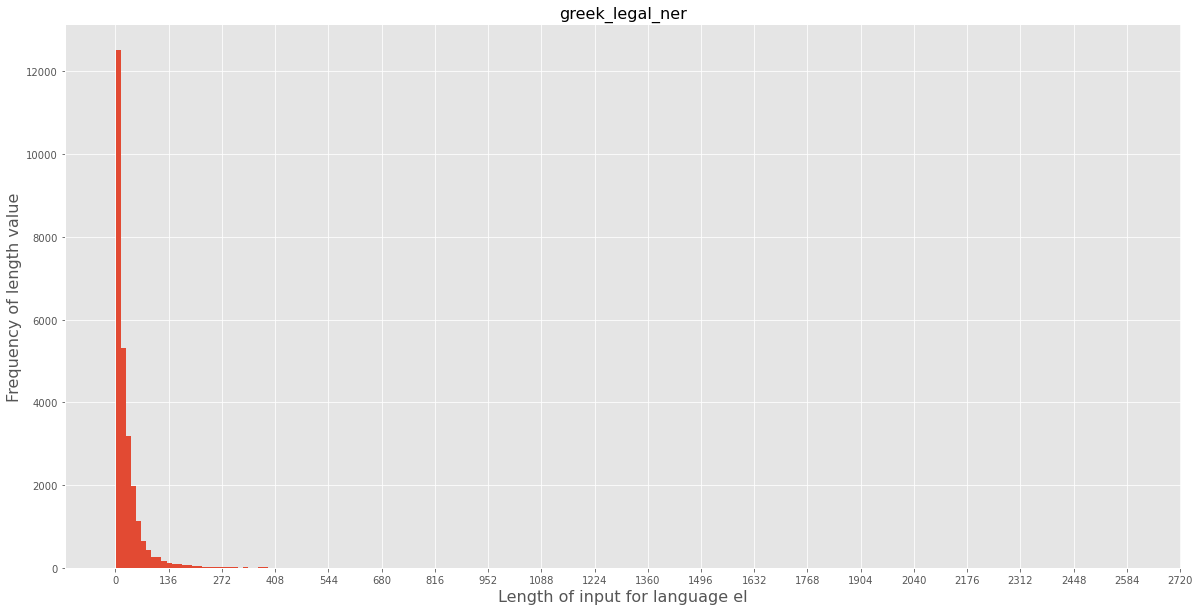

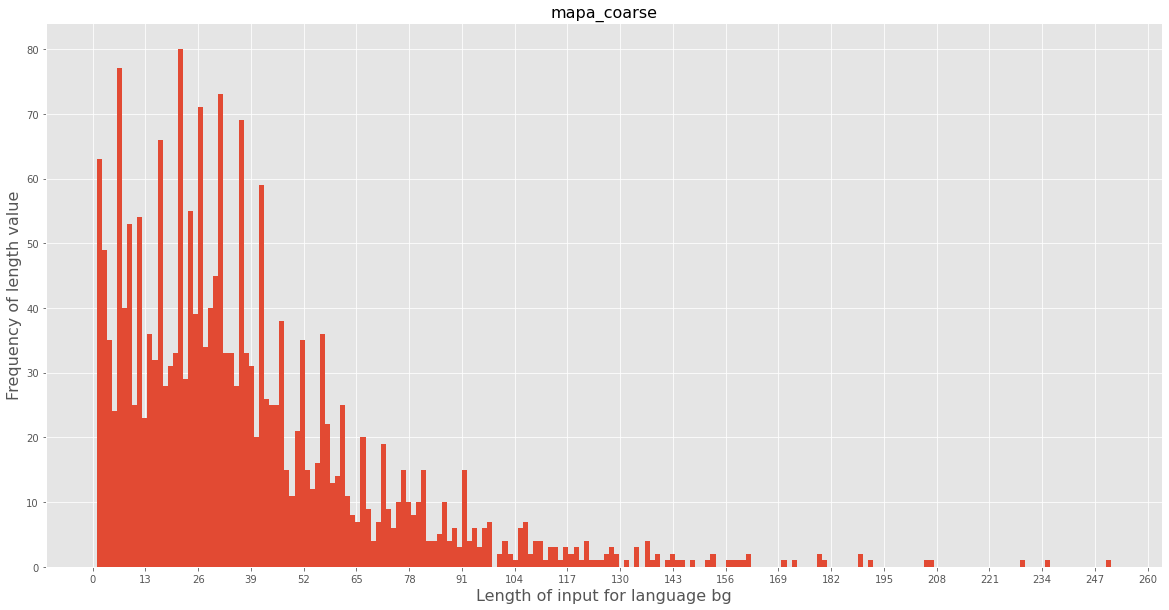

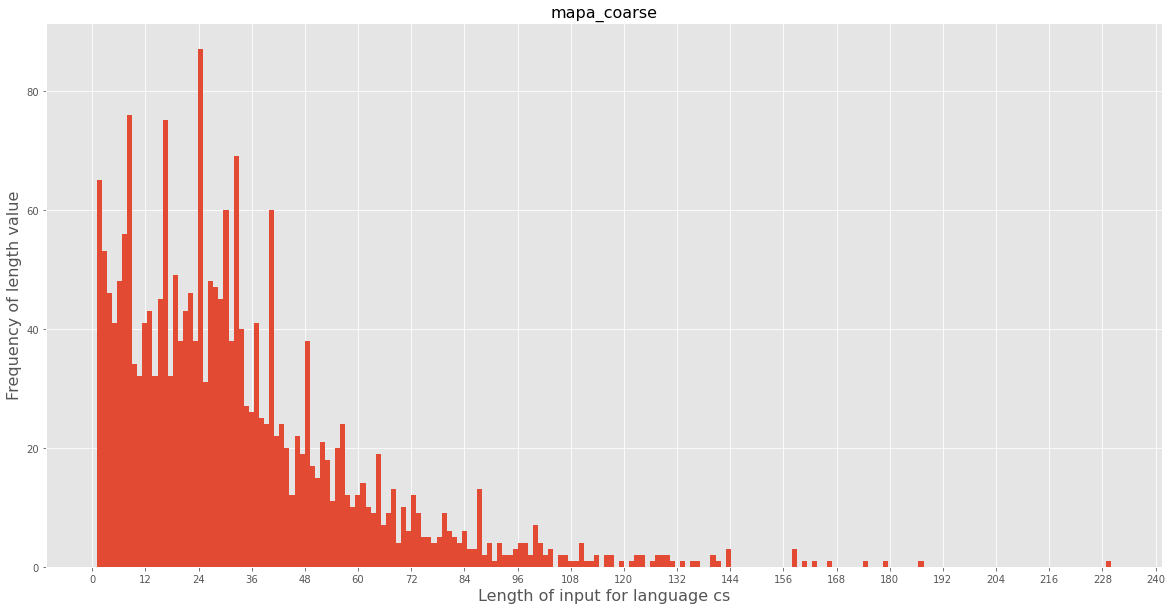

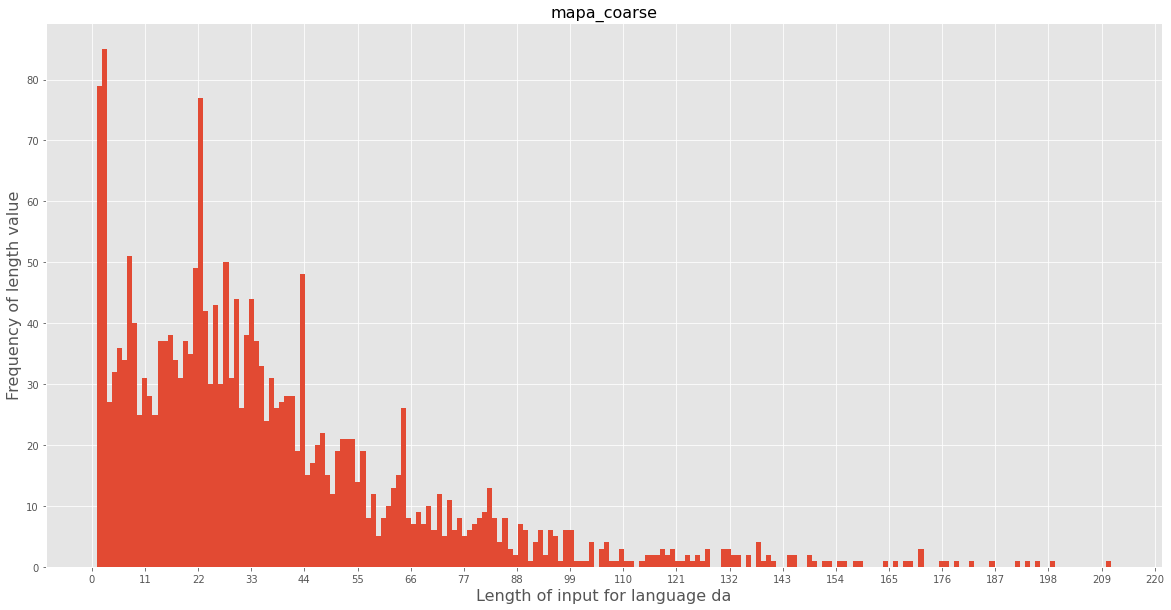

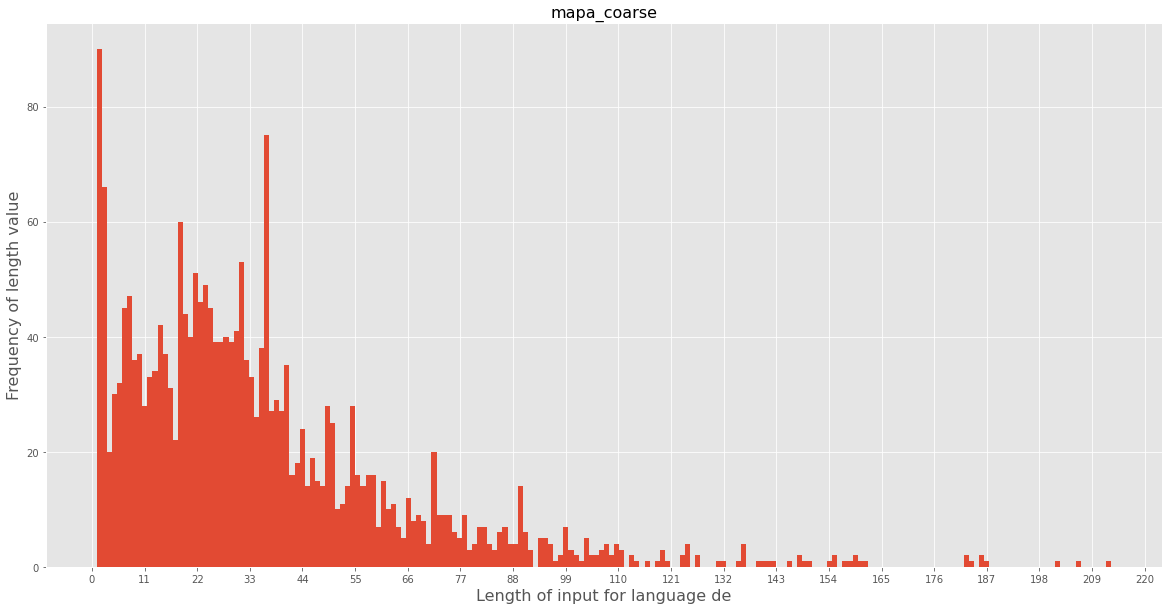

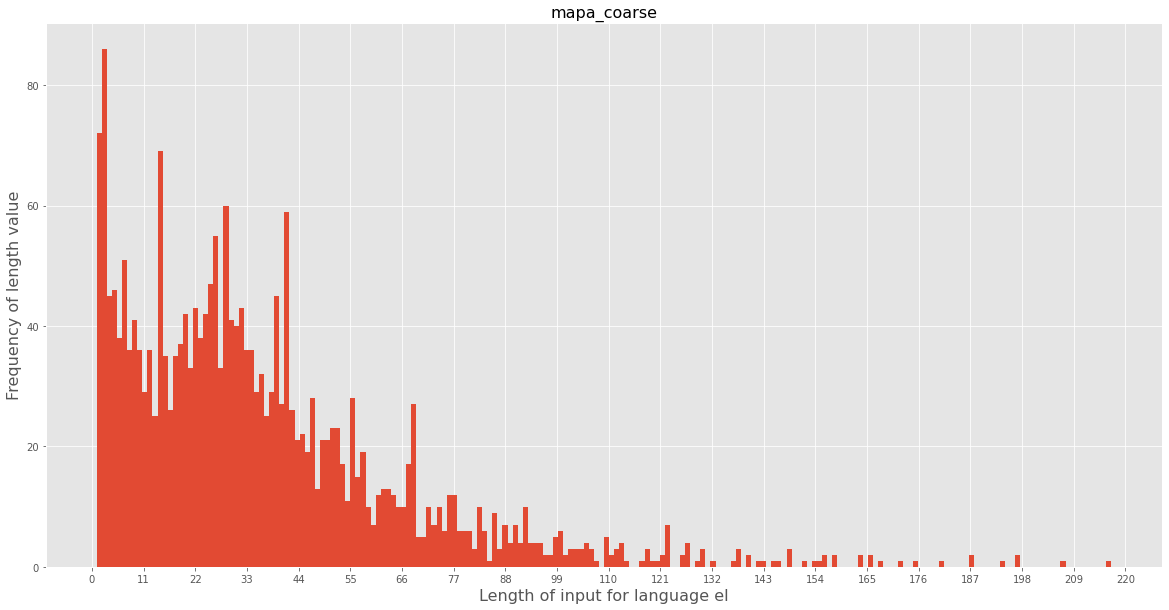

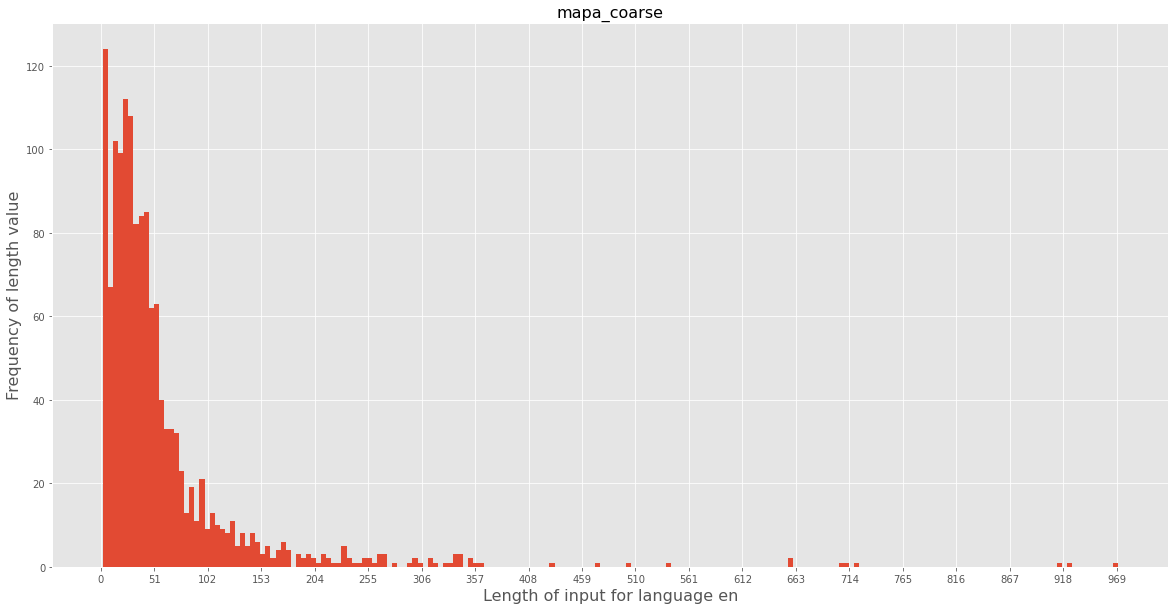

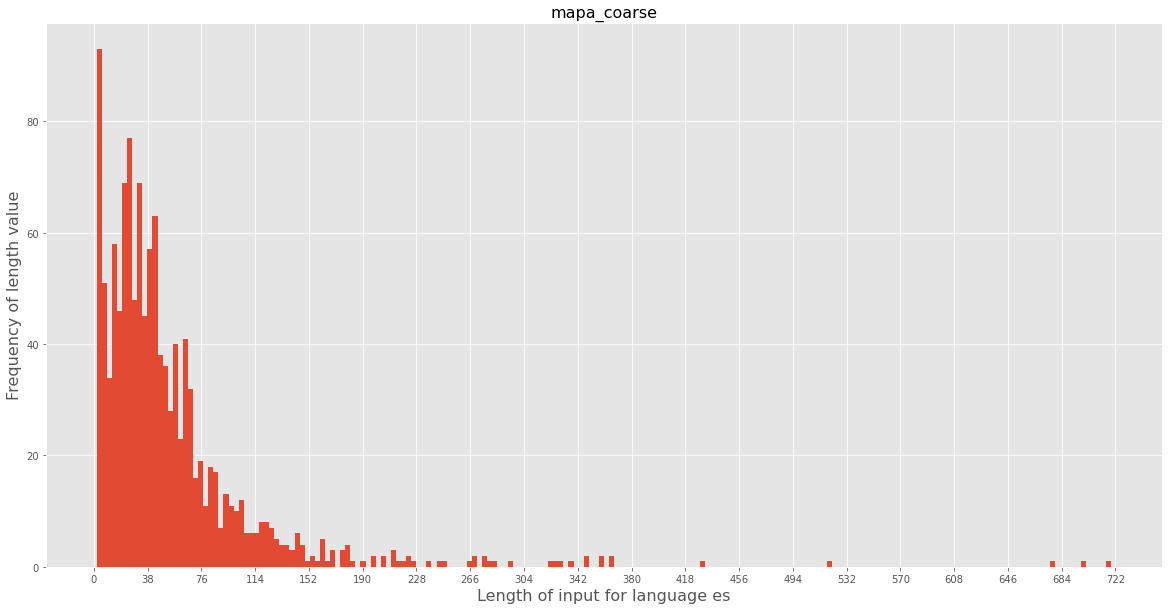

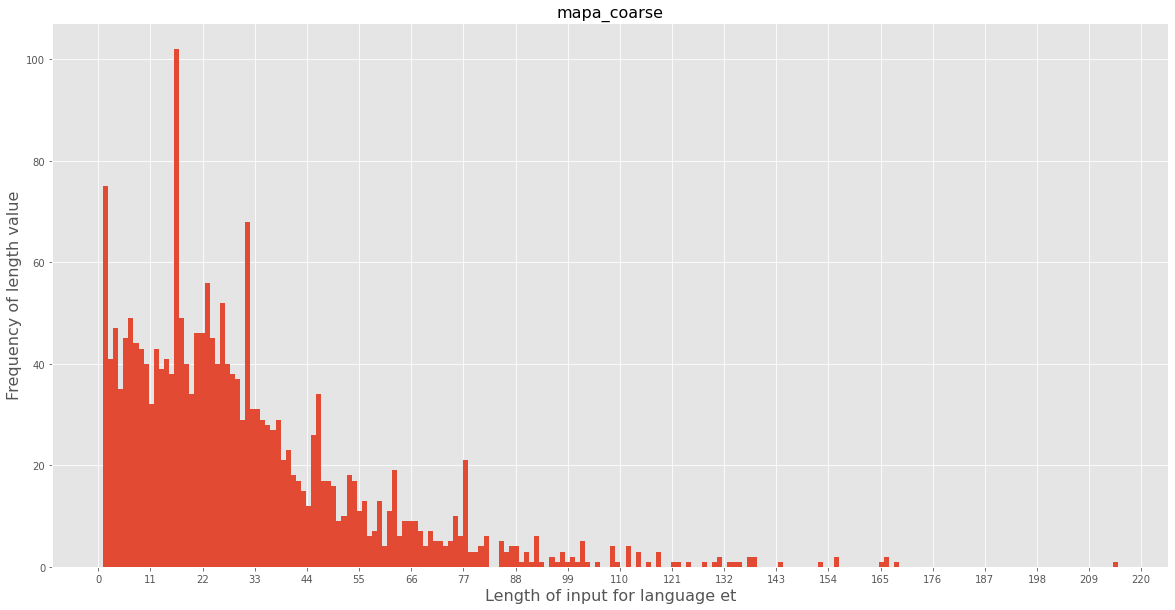

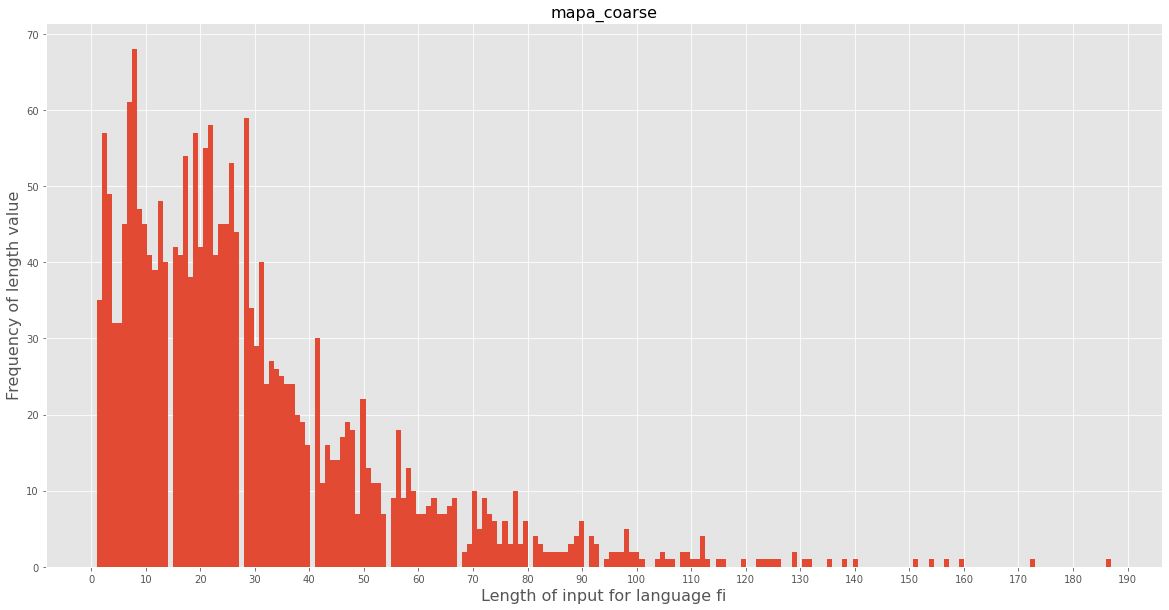

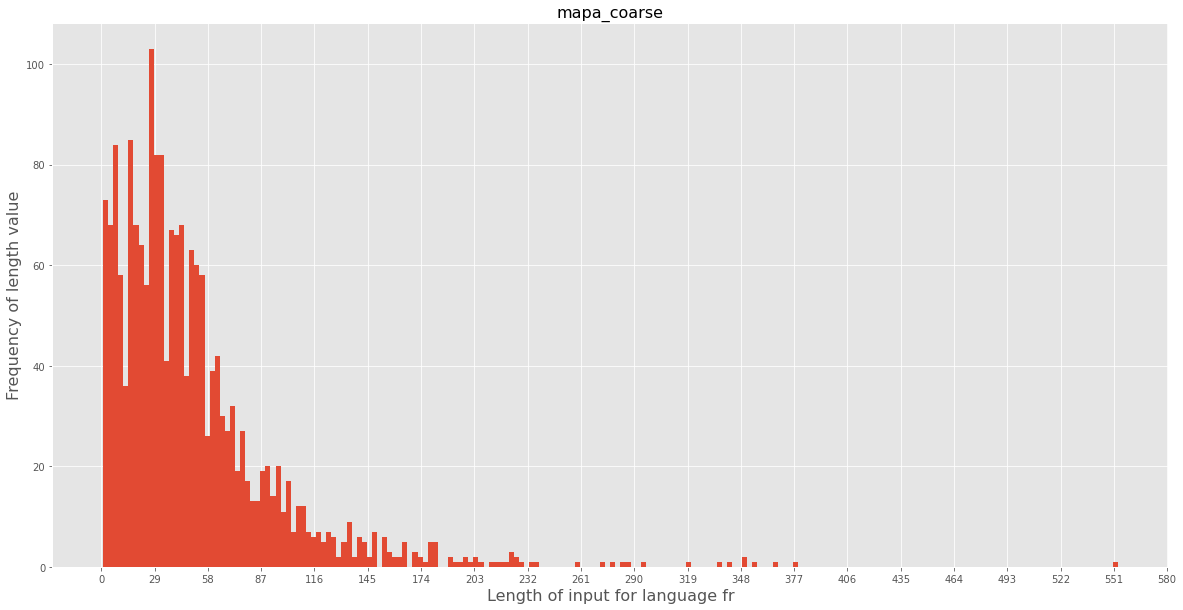

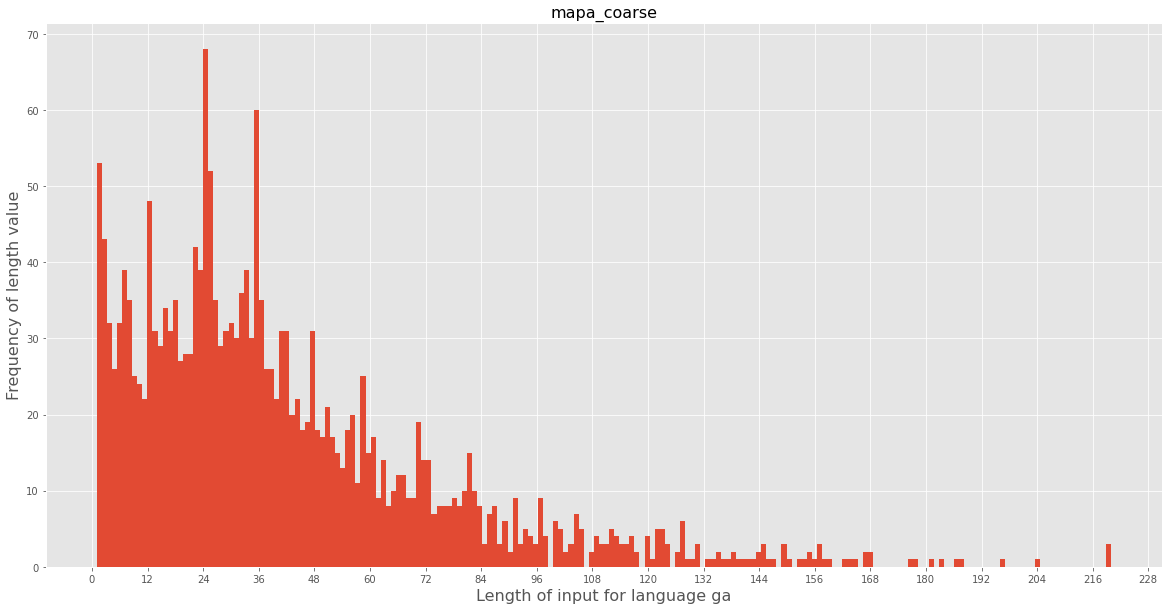

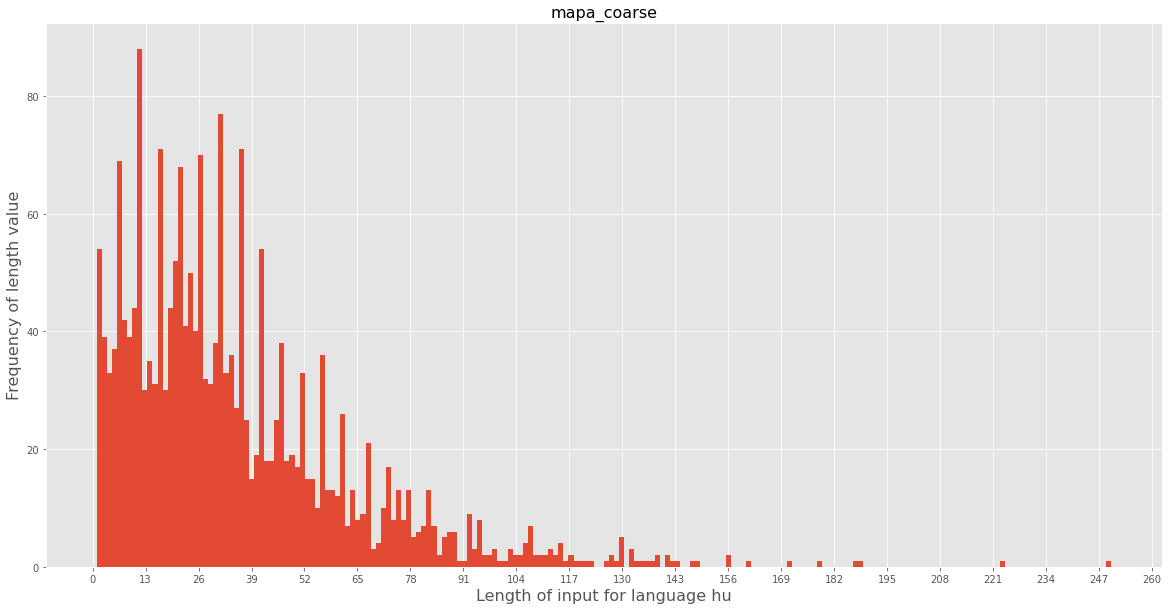

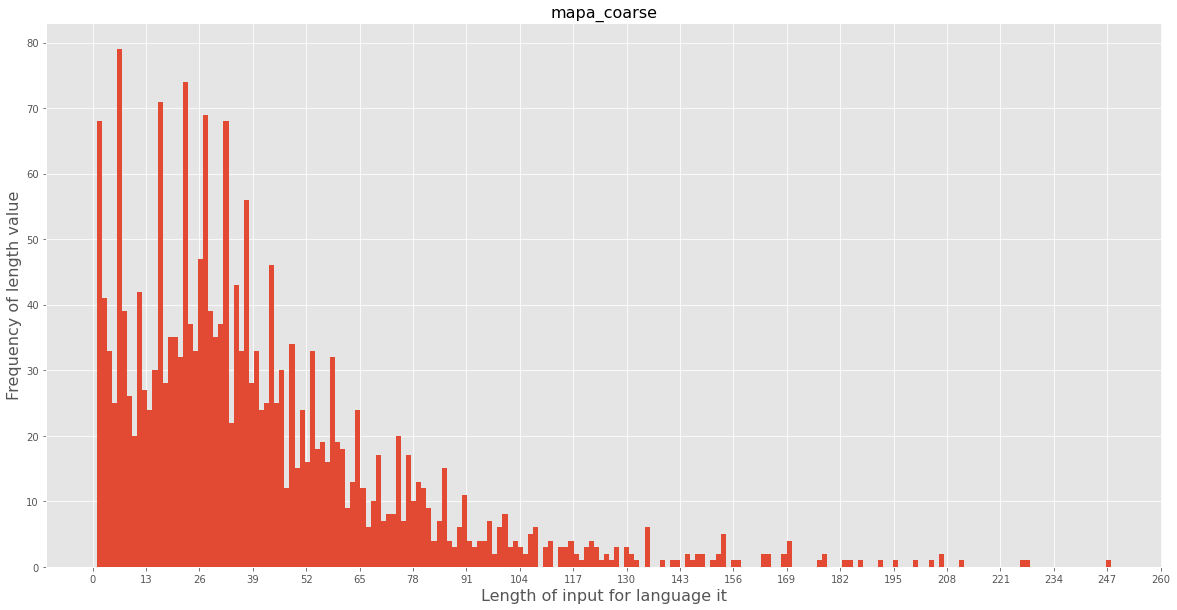

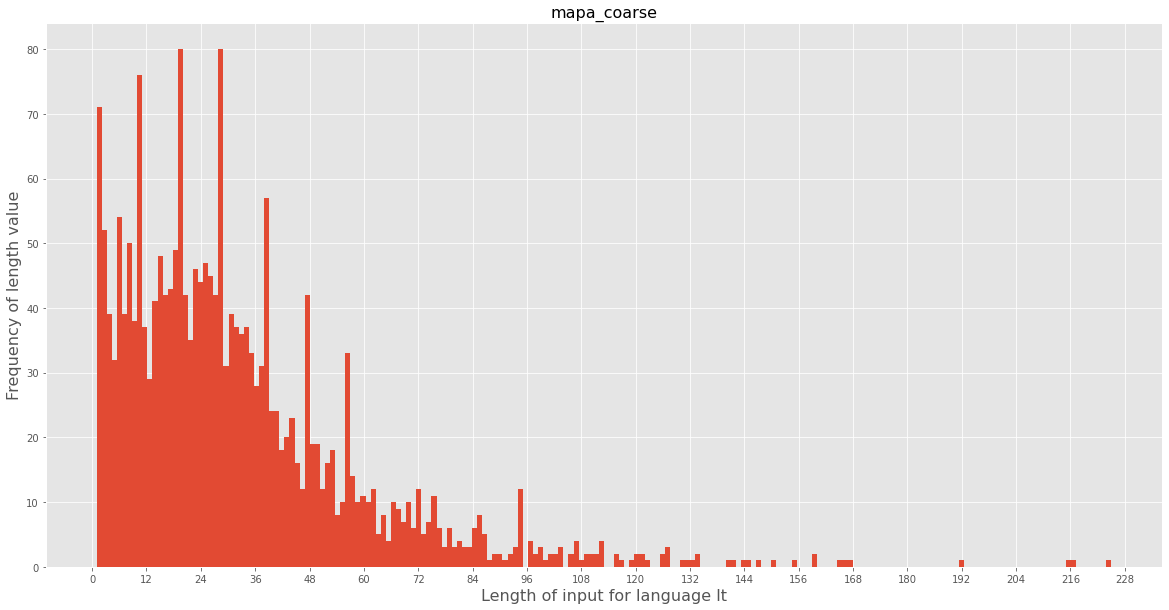

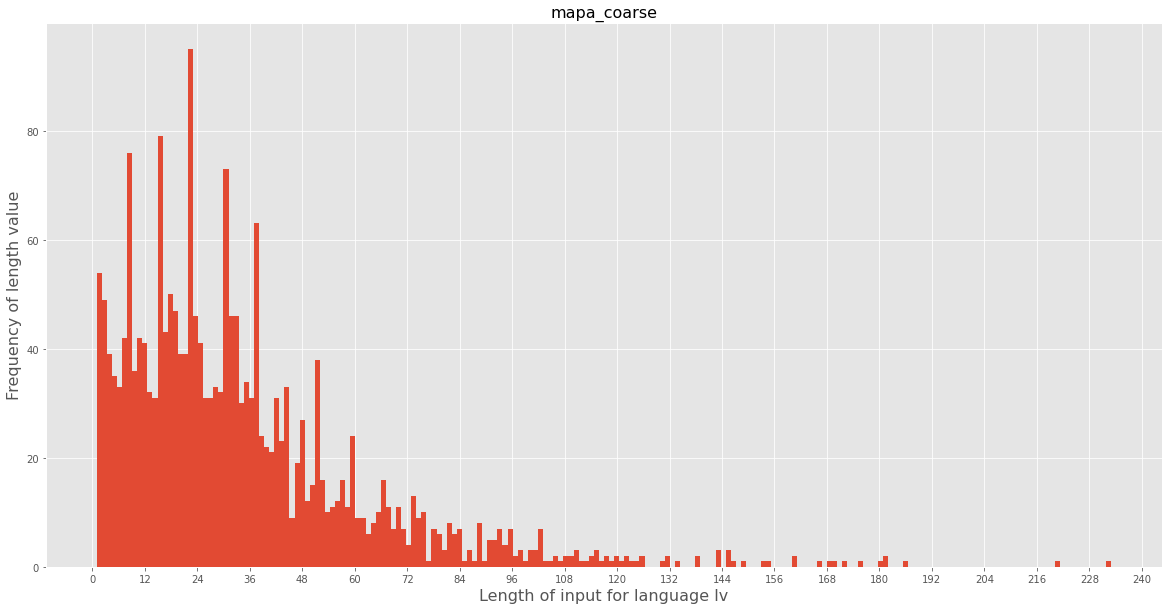

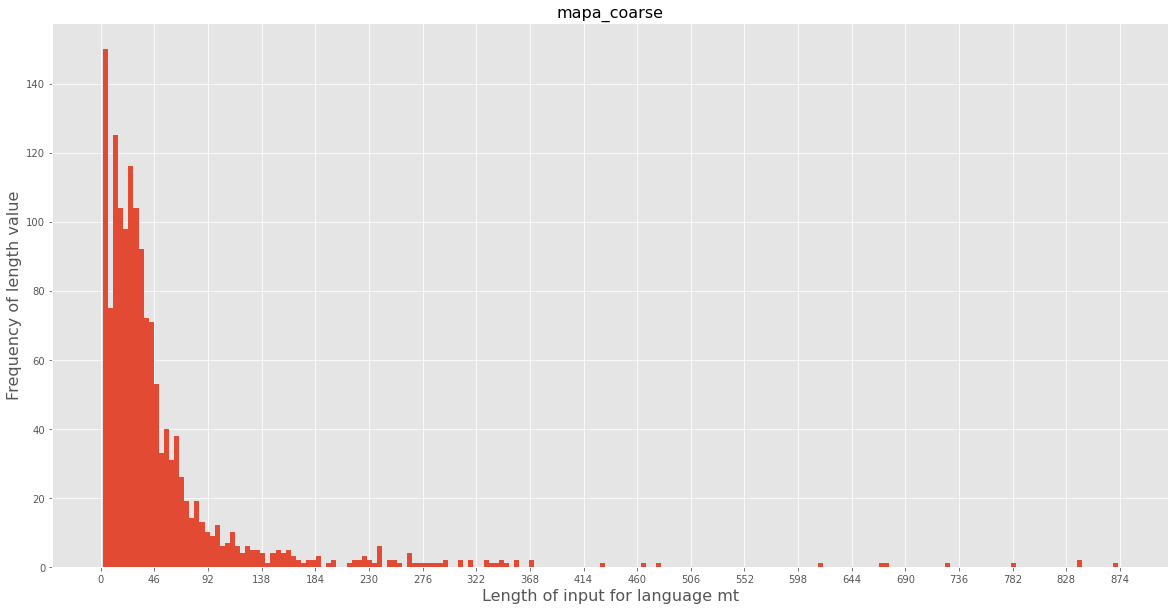

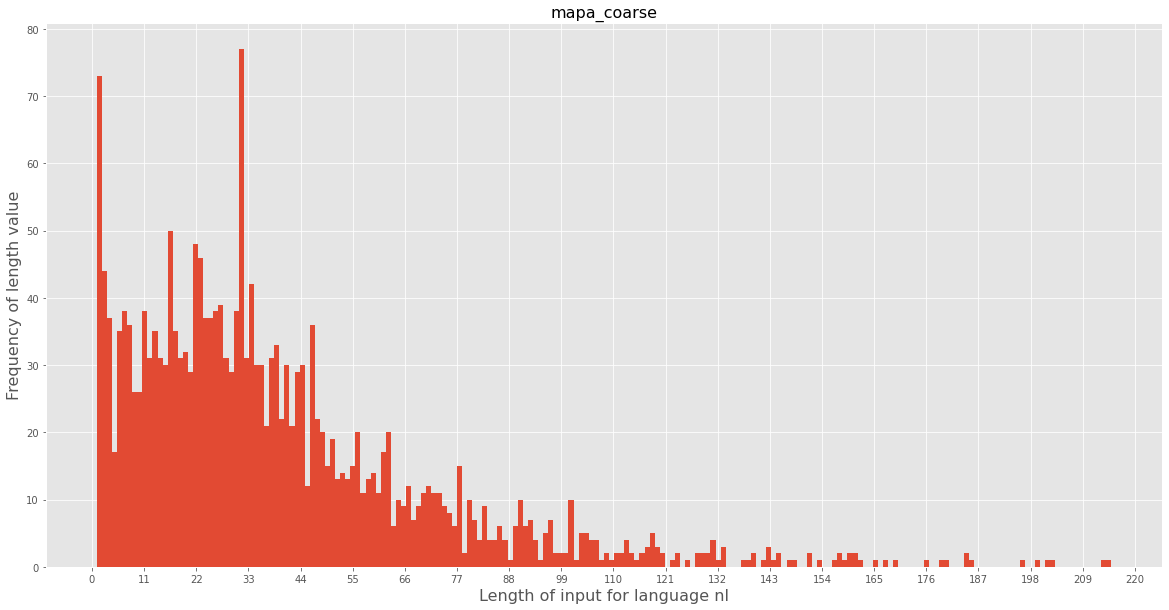

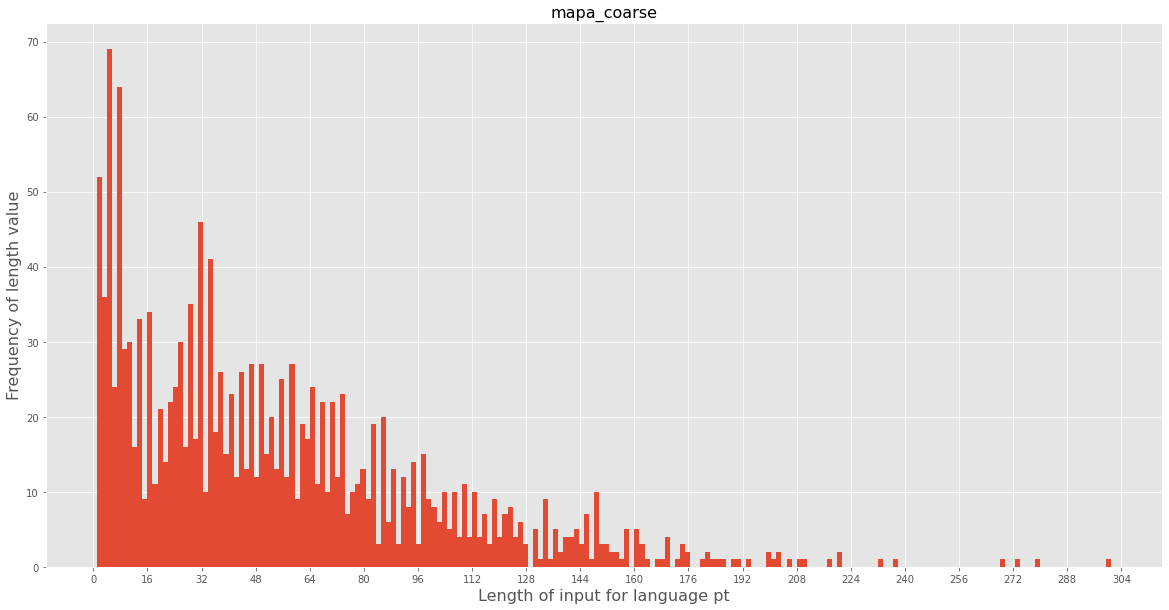

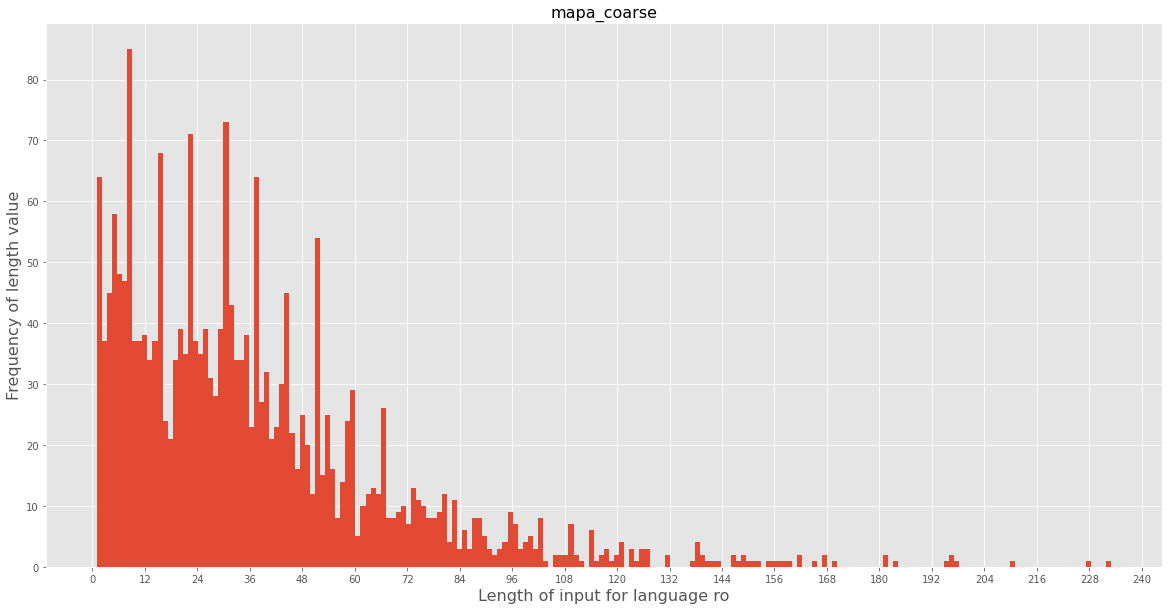

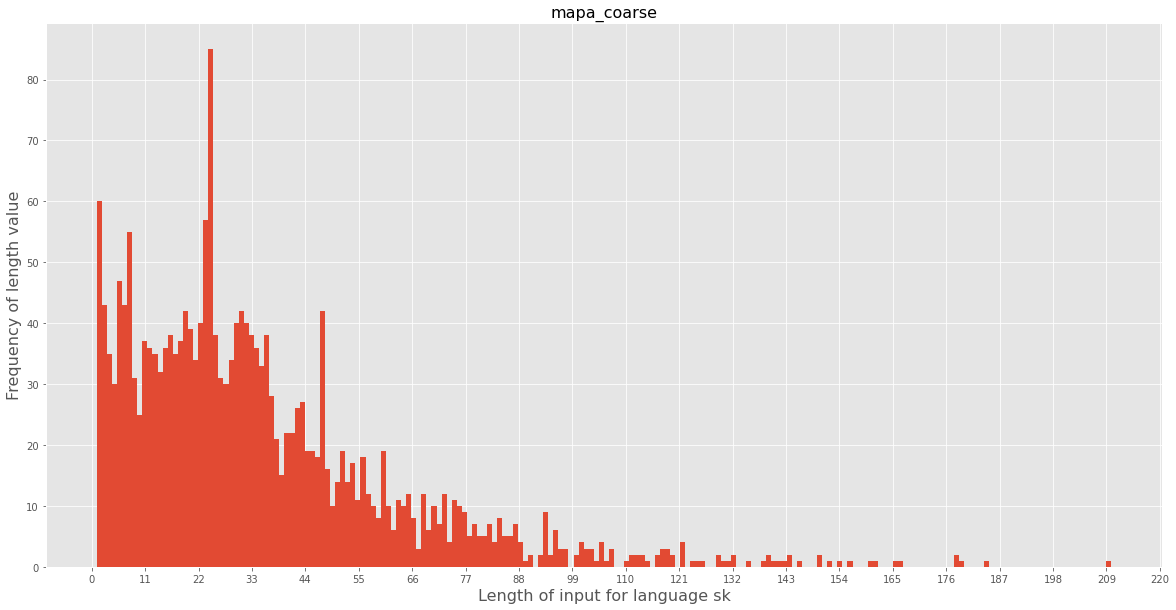

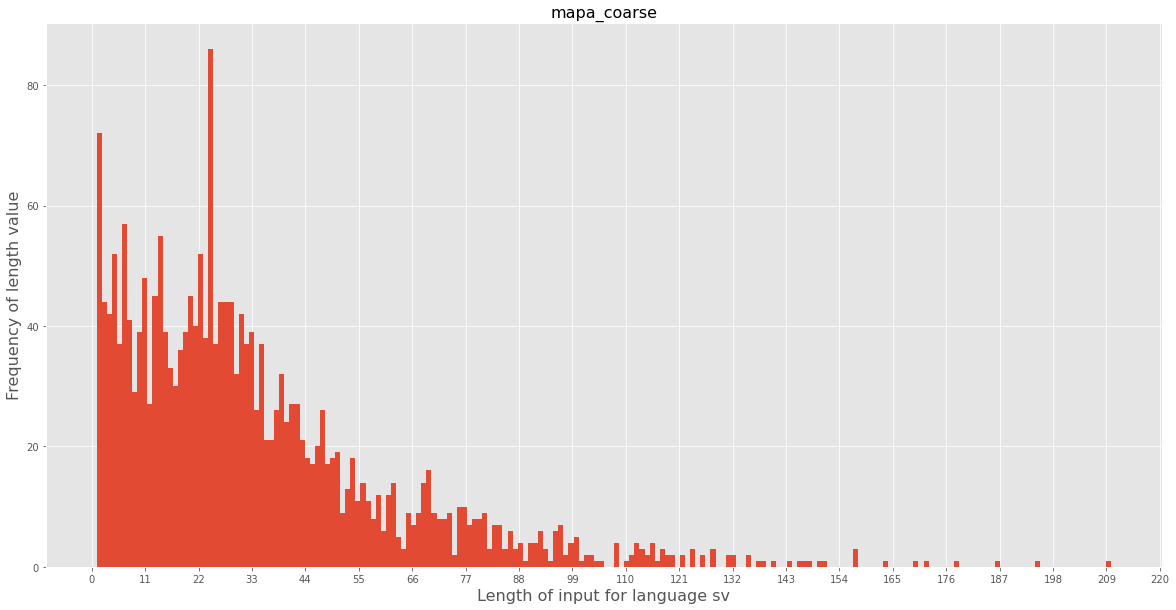

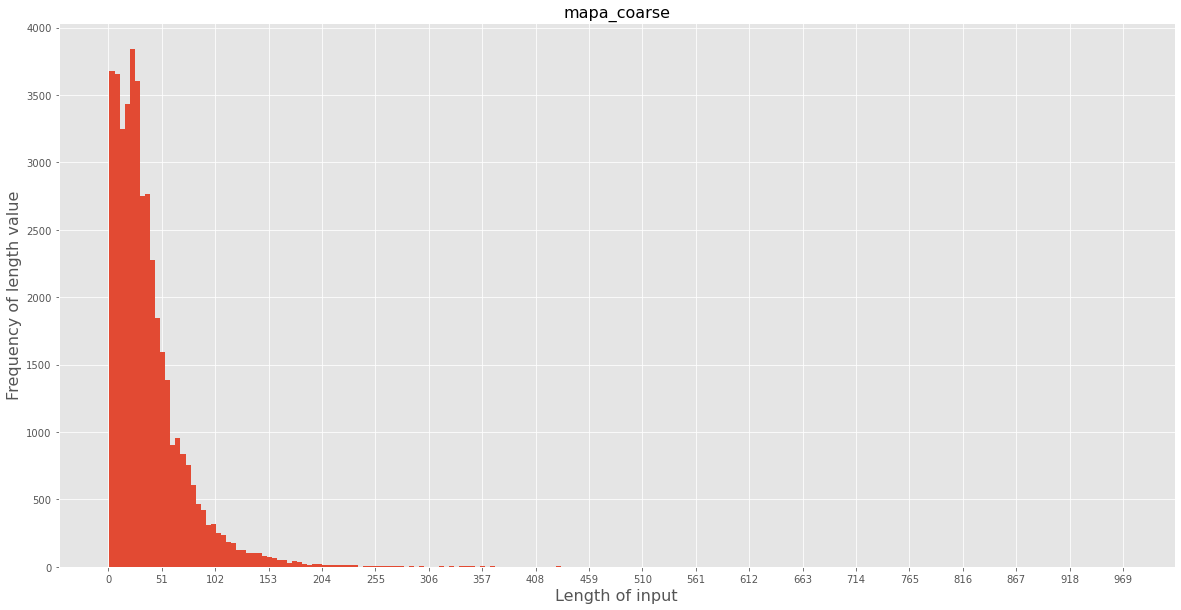

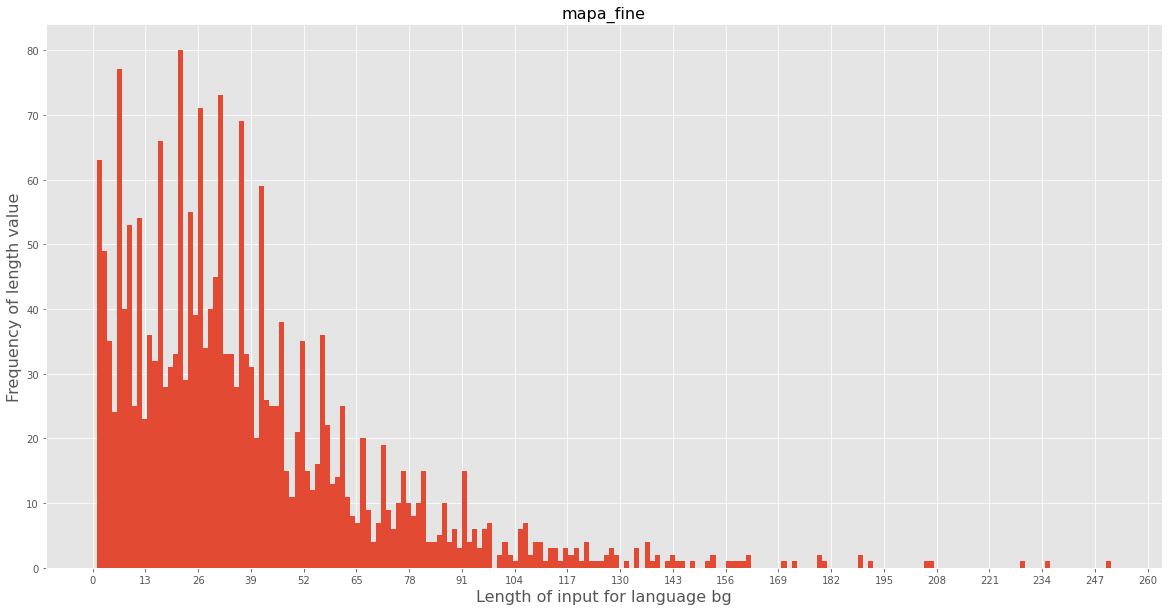

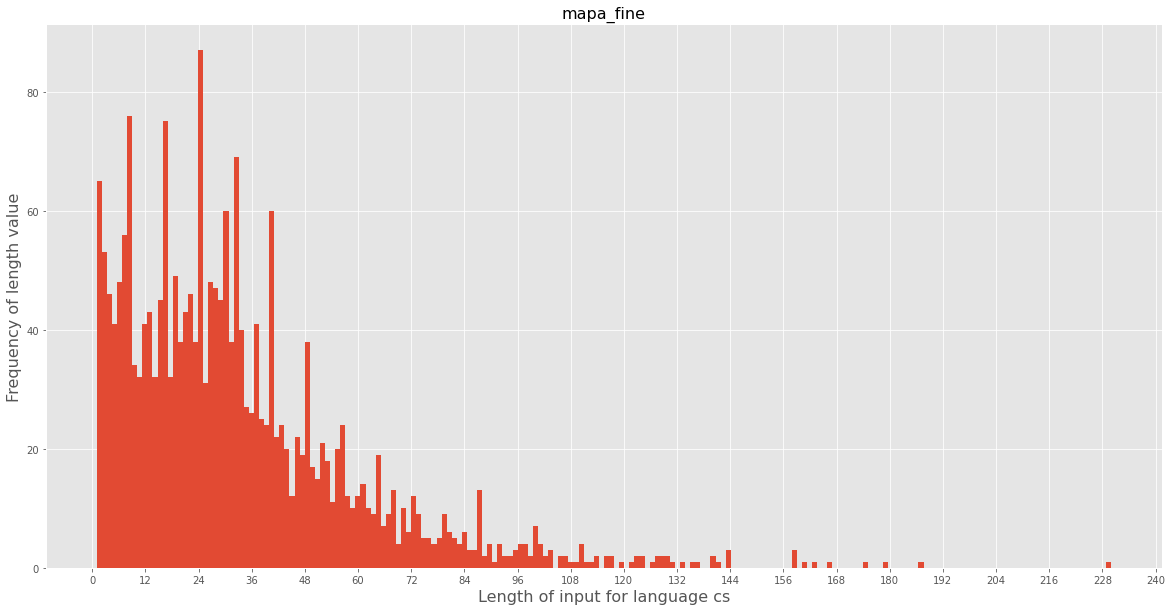

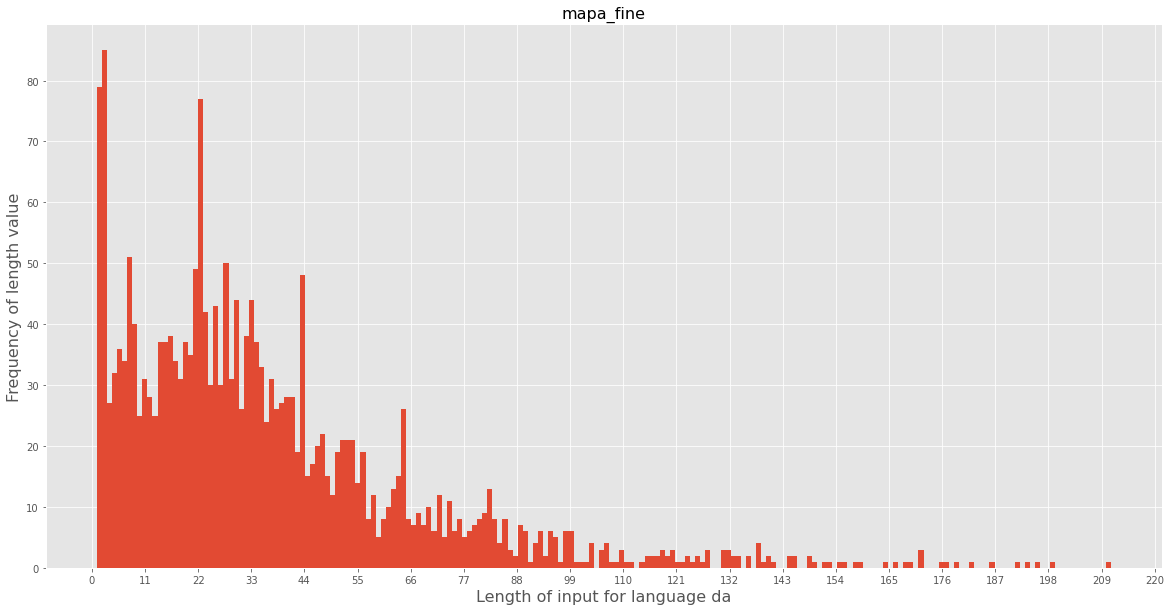

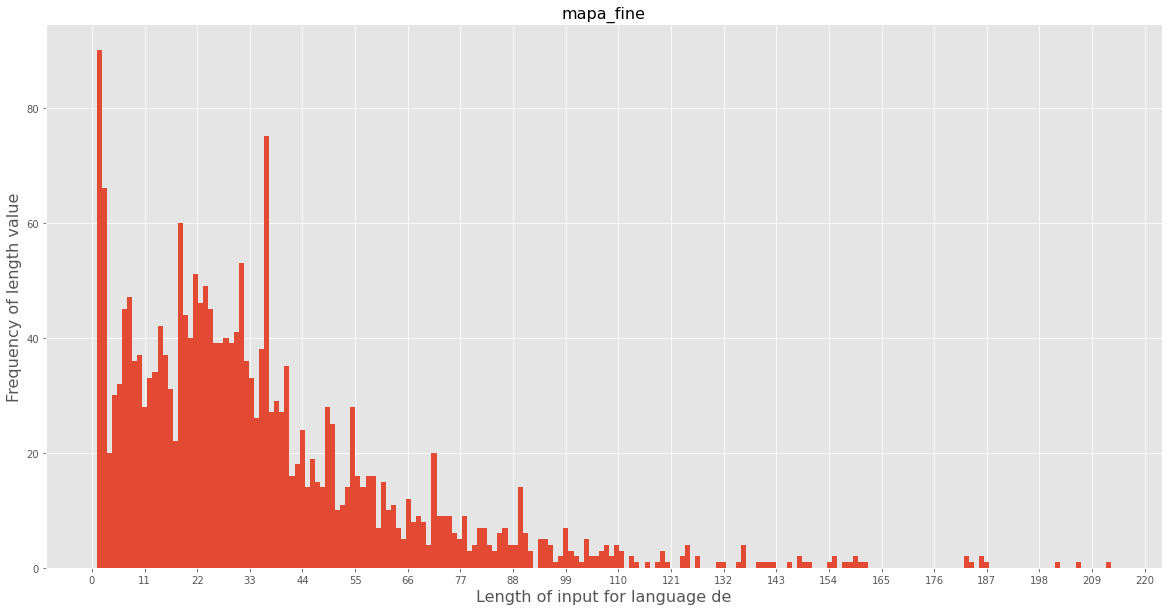

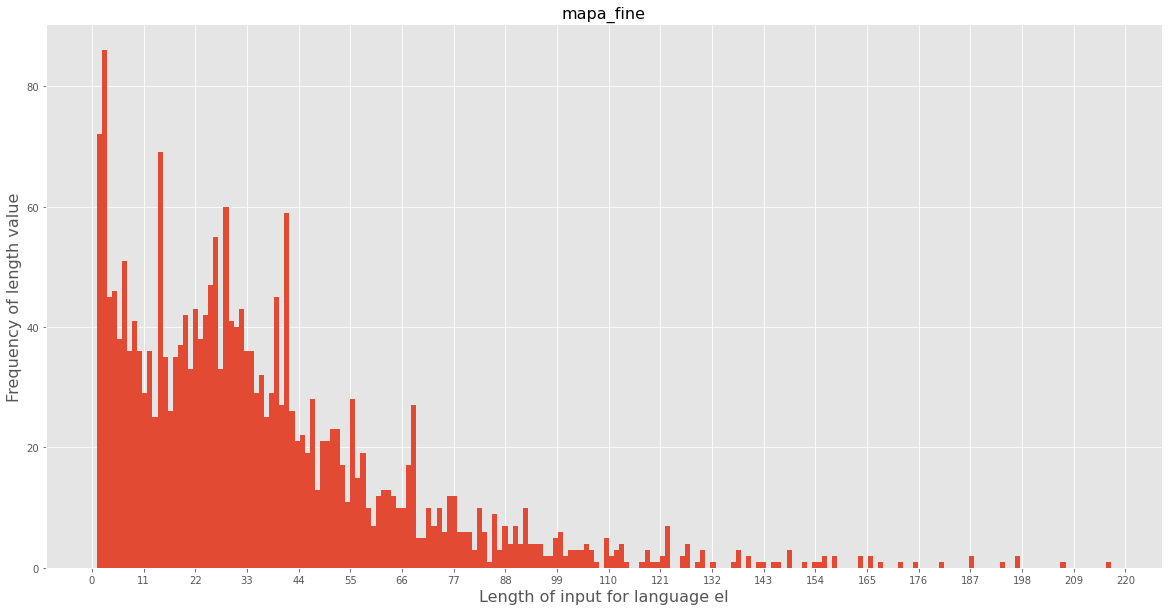

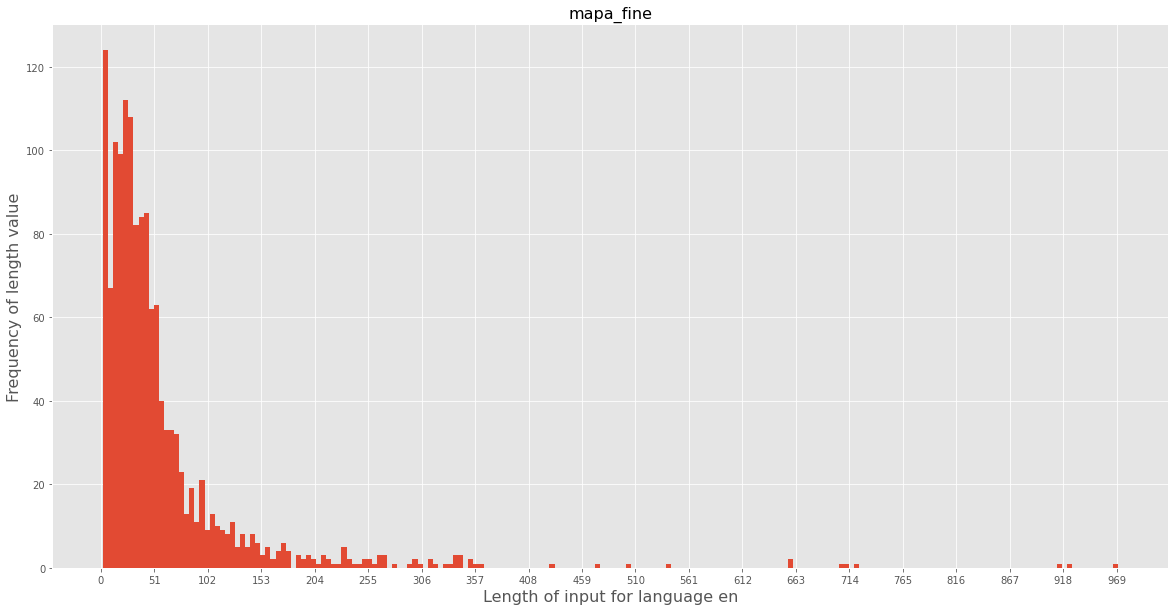

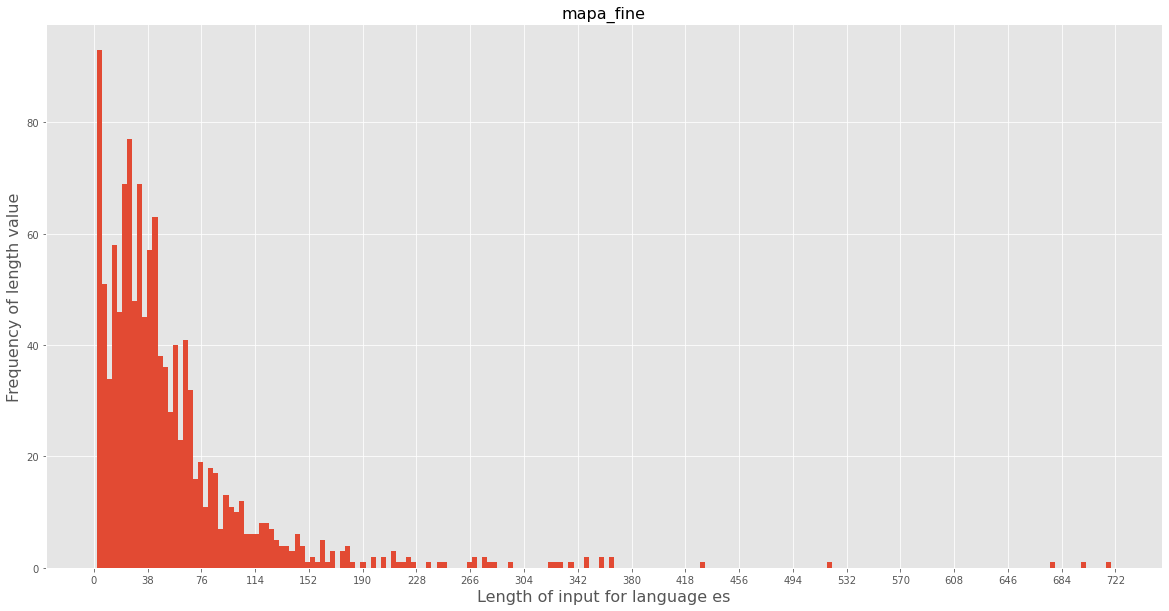

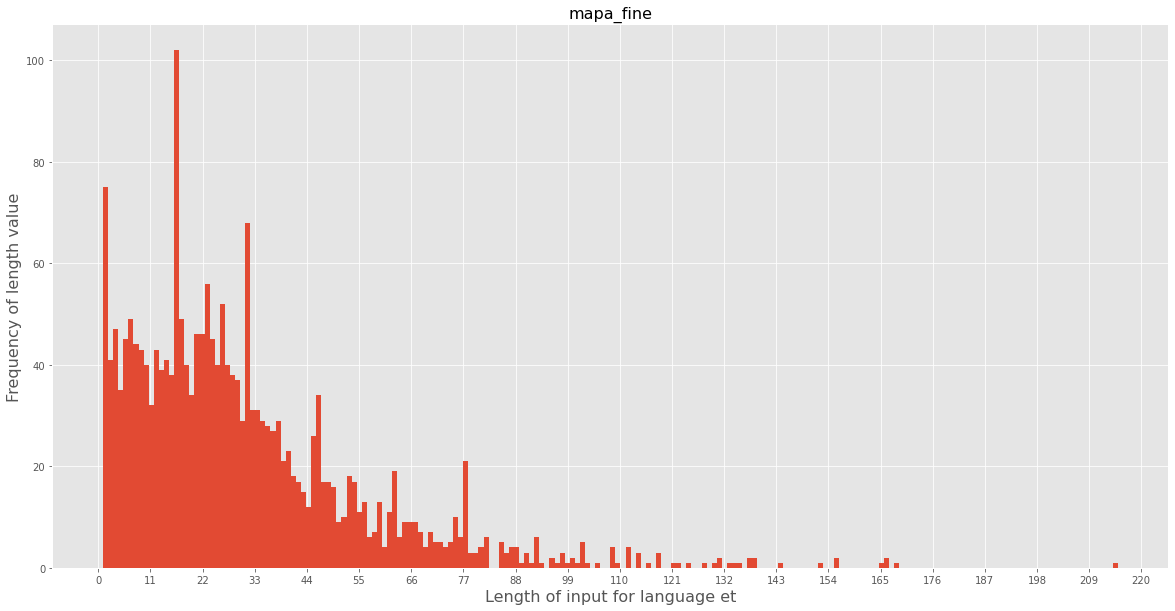

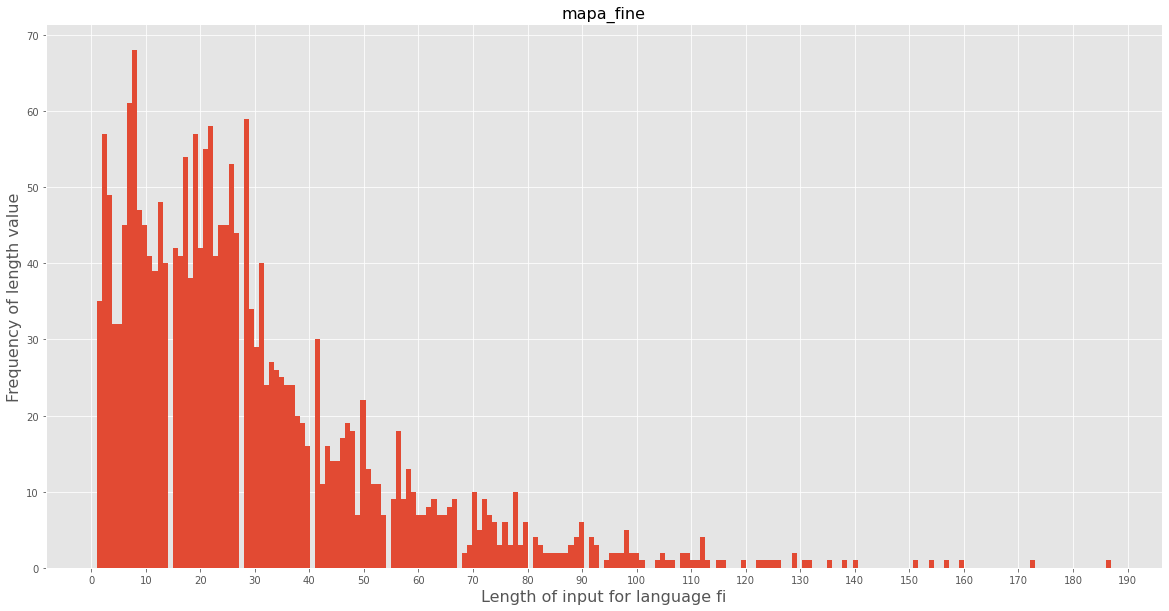

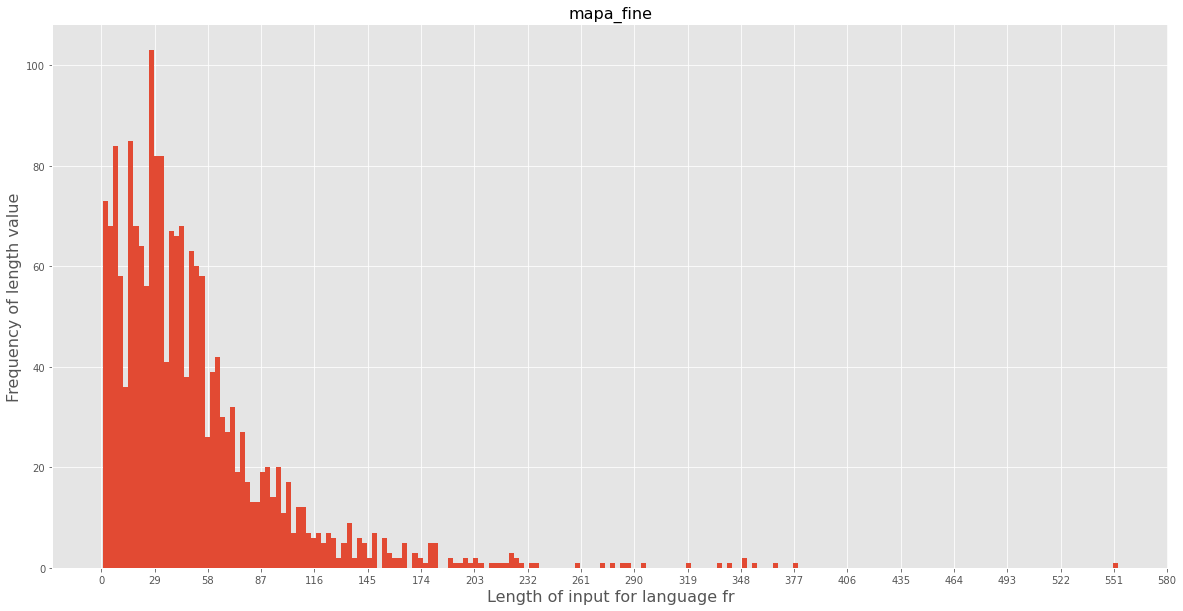

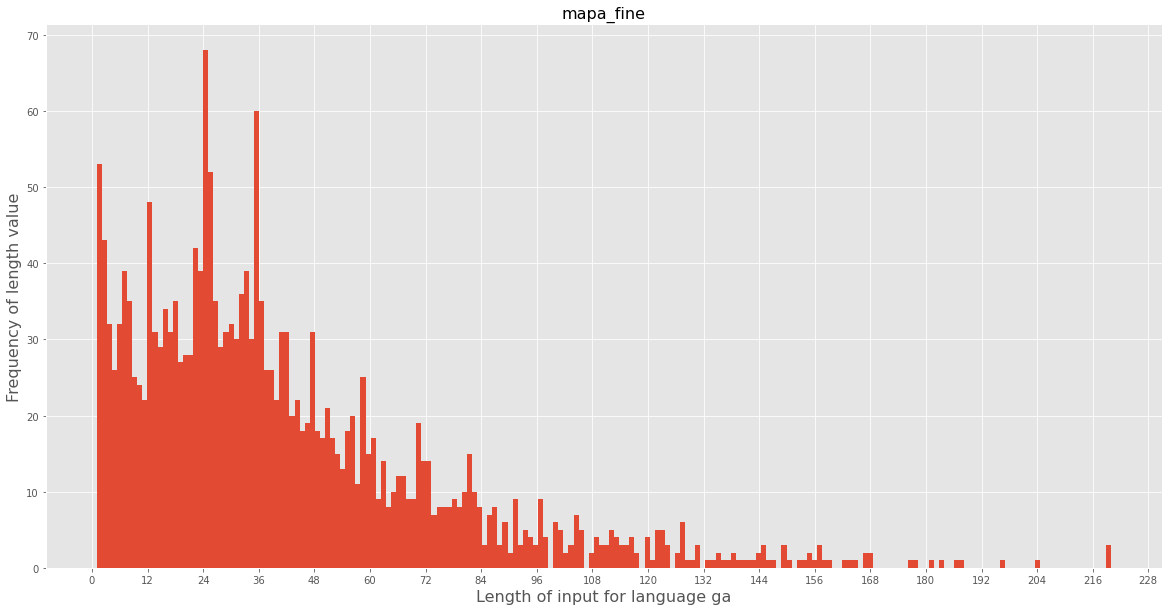

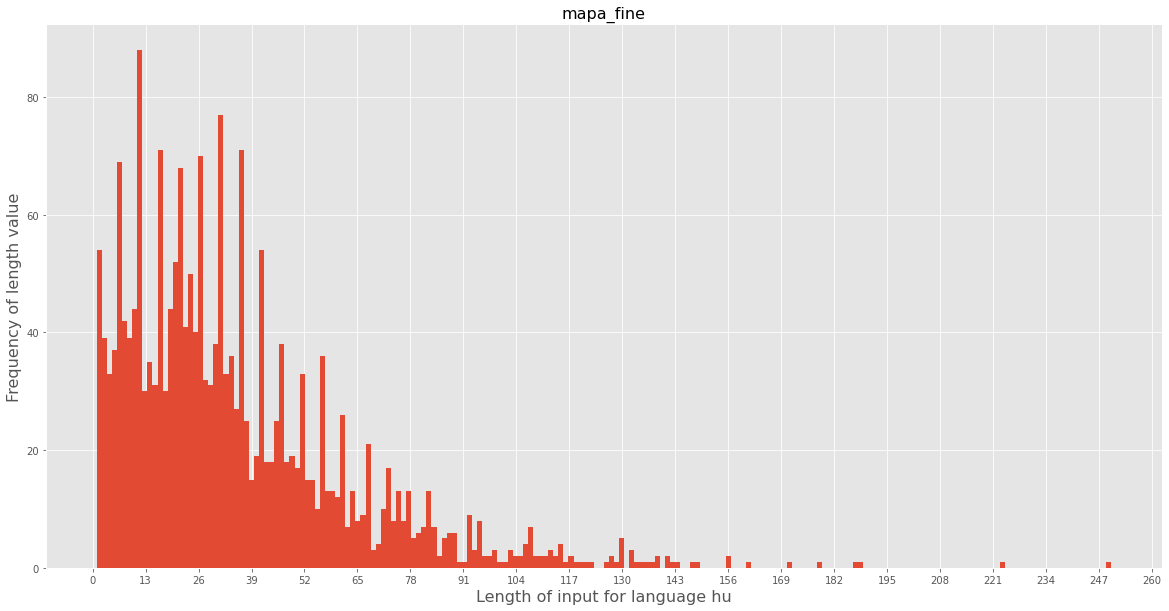

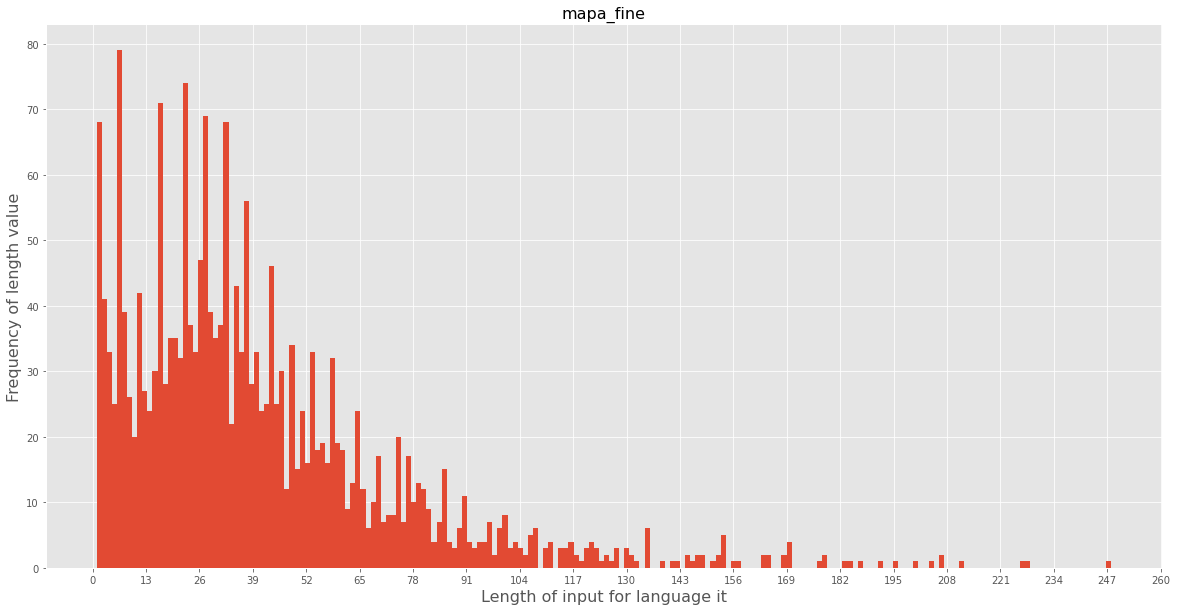

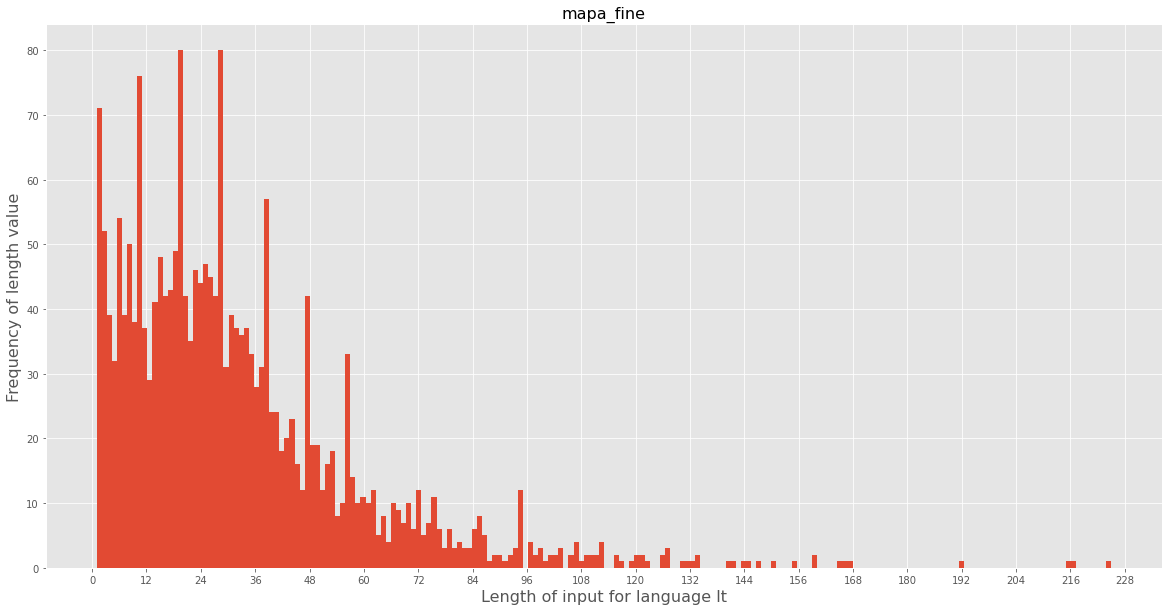

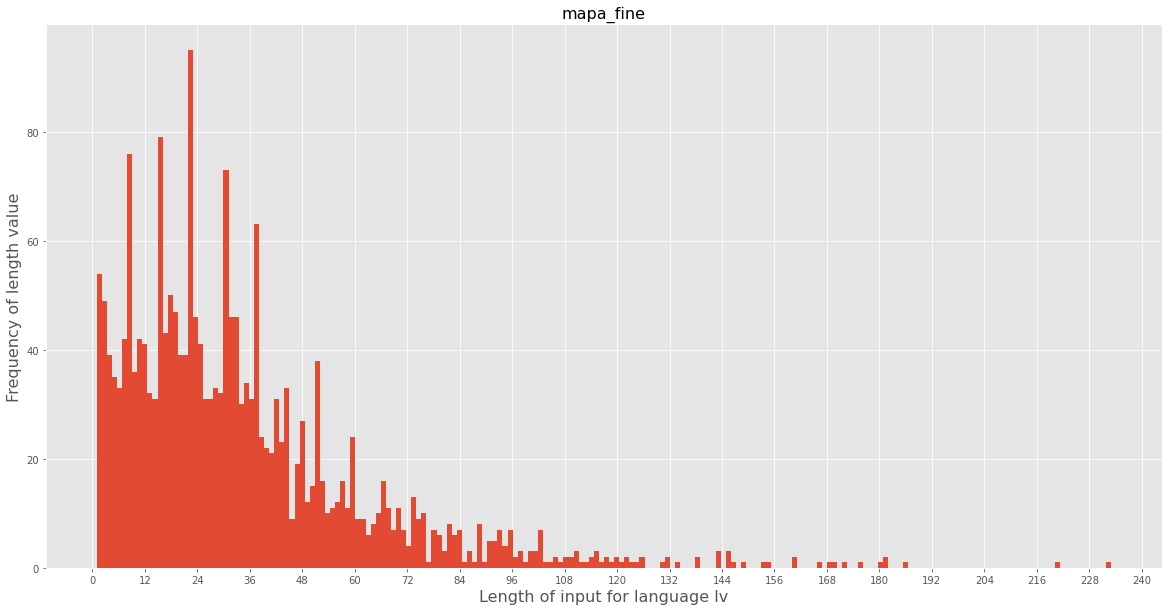

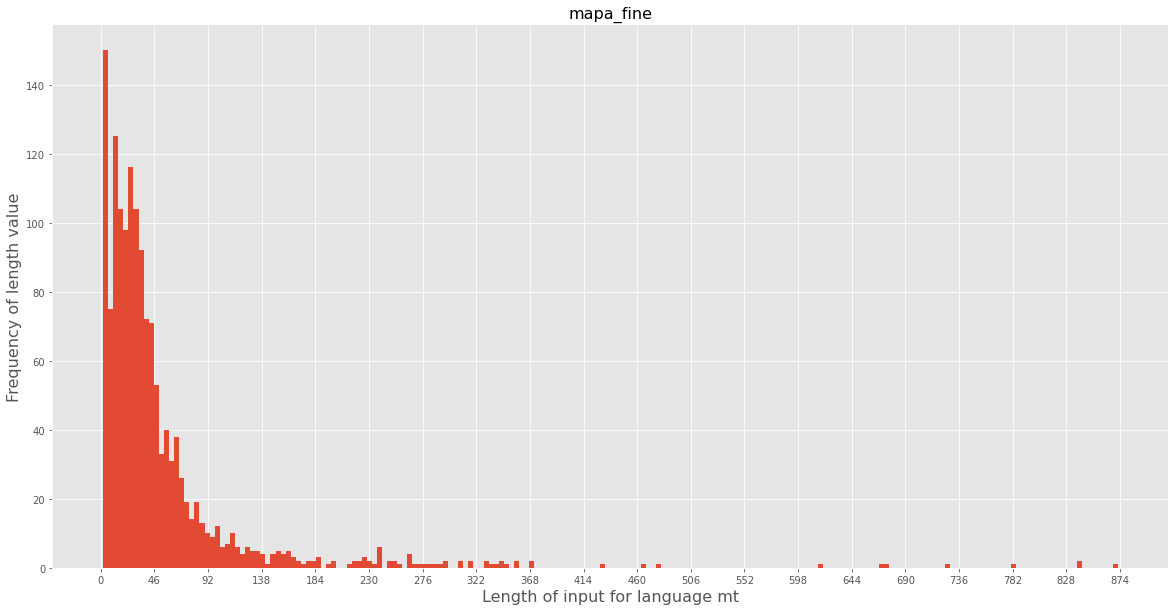

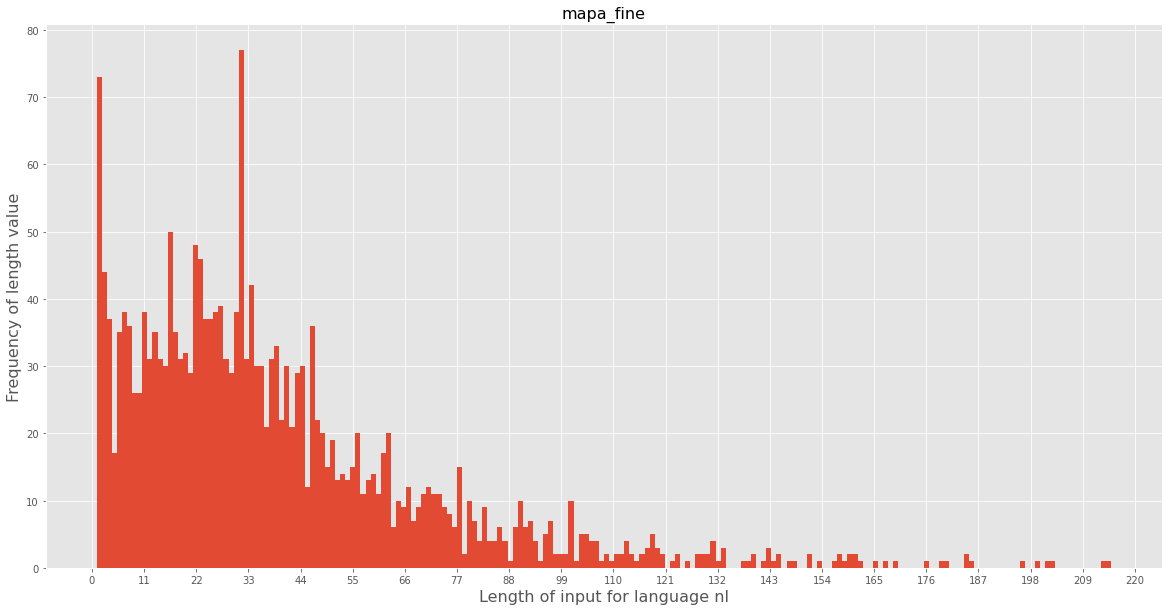

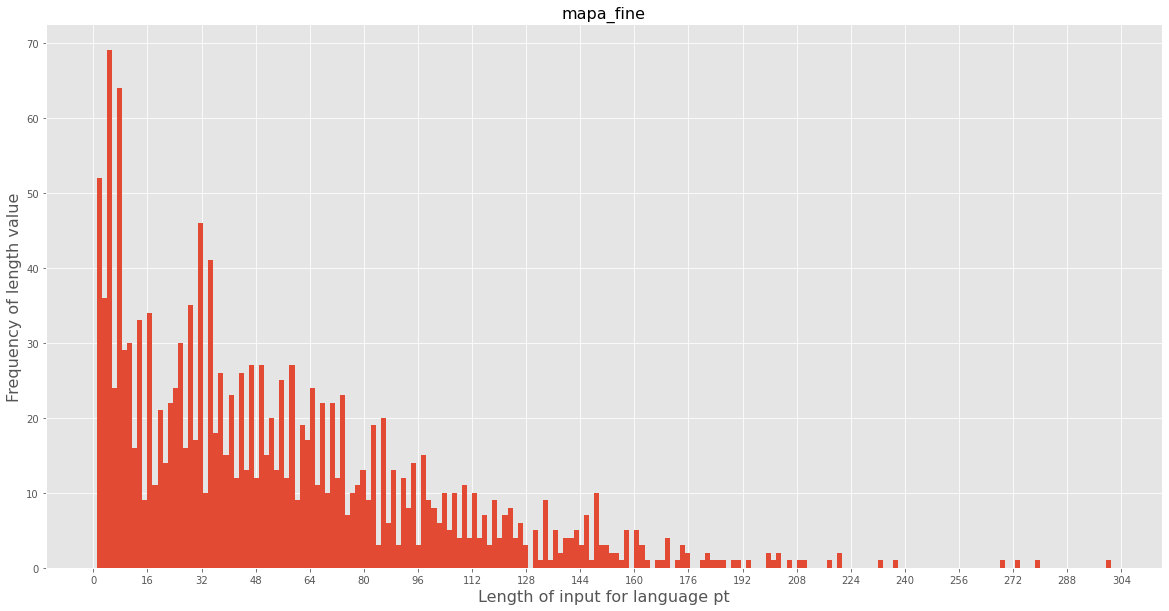

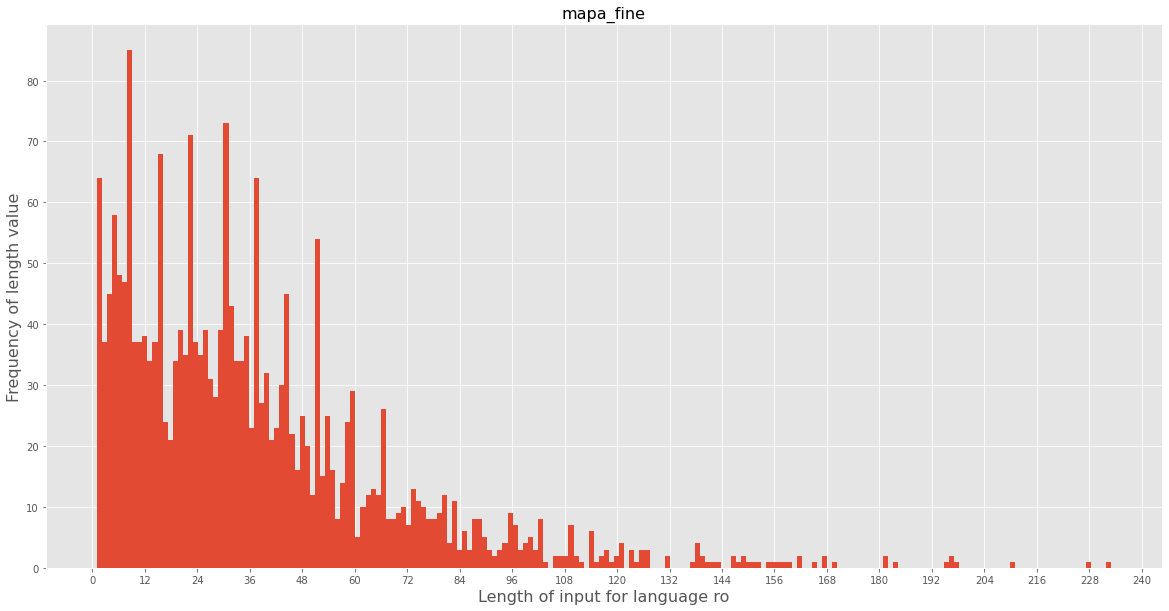

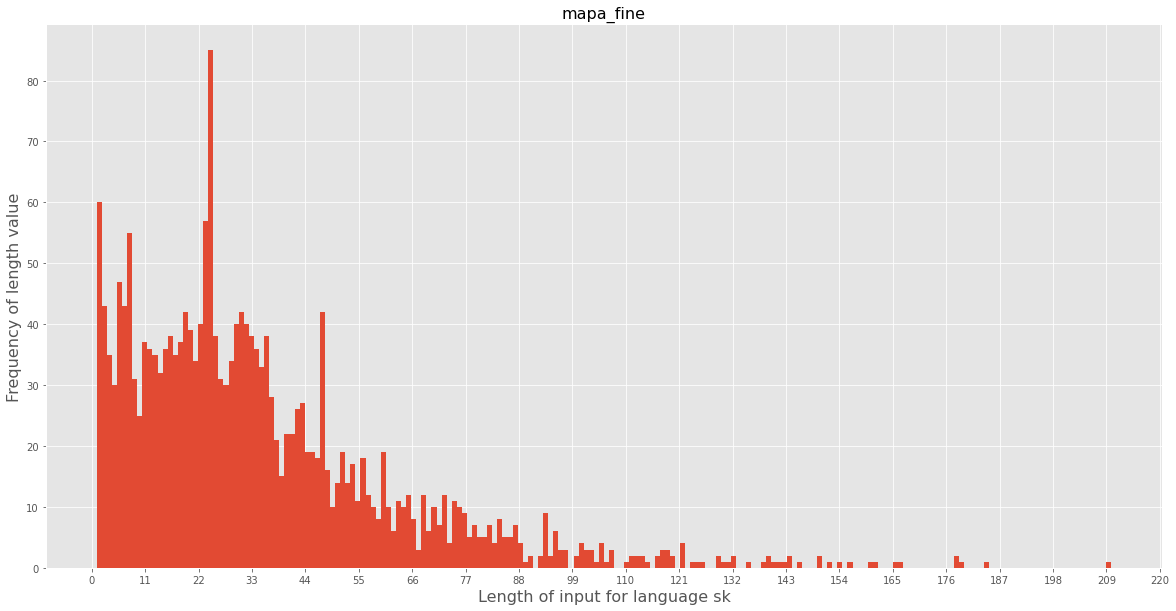

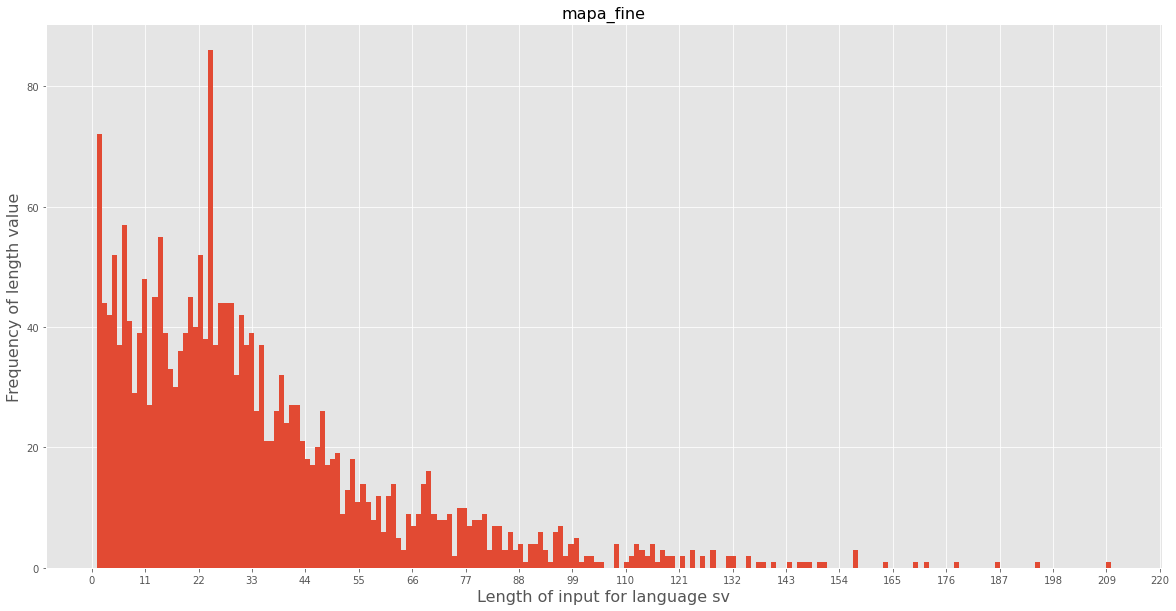

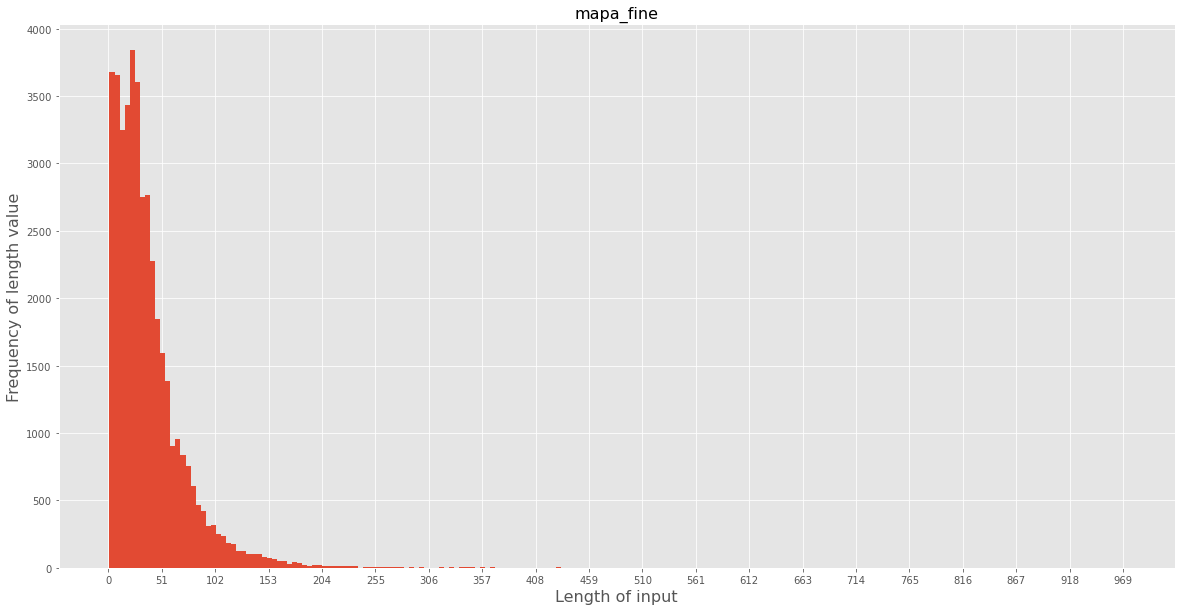

In [29]:
for ds in lextreme_datasets:
    create_histograms(ds)